## About Dataset
## Context
Ever wondered if you should carry an umbrella tomorrow? With this dataset, you can predict next-day rain by training classification models on the target variable RainTomorrow.

## Content
This dataset comprises about 10 years of daily weather observations from numerous locations across Australia.

RainTomorrow is the target variable to predict. It answers the crucial question: will it rain the next day? (Yes or No).

This column is marked 'Yes' if the rain for that day was 1mm or more.
Source & Acknowledgements
The observations were gathered from a multitude of weather stations. You can access daily observations from http://www.bom.gov.au/climate/data.
For example, you can check the latest weather observations in Canberra here: Canberra Weather.

Definitions have been adapted from the Bureau of Meteorology's Climate Data Online.
Data source: Climate Data and Climate Data Online.

Copyright Commonwealth of Australia 2010, Bureau of Meteorology.
https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package/data

## 1) Understanding Data
a) Understand Columns

b) check dtype -> df[col].astype()

c) Describe Numerical Cols

d) Describe Categorical Cols

## 2) EXTRACT FEATURES + EDA (uni - bi(heatmap) - multi) -> Insights:
Uni-variate Analysis

Histogram (values)

distplot (distrbution)

catigorical (pie / count)

Bi-Variate Analysis

Num vs Num

Scatter (relationship btn 2 variables)

line (trend with time)

Num vs Cat (distrbution)

box

violin

strip

Cat vs Cat

bar (estimate plot)

countplot (count rows)

Multi-Variate Analysis

Pairplot
## 3) Pre-Processing Mind Map:
a) Detect & Handle Duplicates

b) train_test_split

c) Detect & Handle NaNs

d) Detect & Handle Outliers

e) Encoding: (Ordinal:[OrdinalEncoder, LabelEncoder] - Nominal: [< 7 uniques(OneHotEncoding), > 7 uniques (BinaryEncoder)])

f) Imbalanced: X_train_resampled

g) Scaling: StandardScaler, MinMaxScaler, RobustScaler: X_train_resampled_scaled

In [1]:
# Manpulate
import numpy as np
import pandas as pd

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Feature Extraction
# import user_agents # get info from user_agent (browser_info)
# from ip2geotools.databases.noncommercial import DbIpCity as ip2geo # get location from ip
# from geopy.distance import great_circle # distance btn 2 (lat,long)
# from geopy.geocoders import Nominatim # geocode("place") / reverse("lat,long")
# from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer # text feature

# Pre-Processing
from sklearn.model_selection import train_test_split # train-test-split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer # detect & handle NaNs
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, OneHotEncoder # Ordinal Encoding, Nominal Encoding
from category_encoders import BinaryEncoder # Nominal Encoding
from imblearn.under_sampling import RandomUnderSampler # undersampling
from imblearn.over_sampling import RandomOverSampler, SMOTE # oversampling
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler # Scaling

# Modeling

## 1) Pipeline
from sklearn.pipeline import Pipeline, make_pipeline # to make pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector # apply pipeline to each column

## 2) Regression Models
from sklearn.linear_model import LinearRegression # if data is small and small_no_features
from sklearn.linear_model import SGDRegressor # if data is large: (can have penalty=constrains)
from sklearn.preprocessing import PolynomialFeatures # for polynomial regresion (then apply scaling after it)
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV # Regularization

## 2') Classfication Models
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB, BernoulliNB, CategoricalNB, MultinomialNB
from sklearn.svm import LinearSVC, SVC, LinearSVR, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, RandomForestClassifier, RandomForestRegressor, ExtraTreesClassifier, ExtraTreesRegressor # Bagging & Pasting
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor, GradientBoostingClassifier, GradientBoostingRegressor, HistGradientBoostingClassifier, HistGradientBoostingRegressor # Boosting
from sklearn.ensemble import VotingClassifier, VotingRegressor # Ensemble (Voting)
from sklearn.ensemble import StackingClassifier, StackingRegressor # Stacking

## 3) Model Selection (Underfitting vs Overfitting) [bias variance tradeoff => perfect model complexity]
from sklearn.model_selection import cross_val_score, cross_val_predict, StratifiedKFold, GridSearchCV, RandomizedSearchCV # (Train - Valid - Test) + hyperparameters tunning
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV, HalvingRandomSearchCV # if data / features is large
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error # Evaluate Model: r2=> accuracy, L2-norm: if no outliers, L1-norm: if outliers
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, precision_recall_curve, roc_curve, roc_auc_score
from scipy import stats # Confidence Interval of Accuracy / Loss / Utility
import joblib # save model

In [2]:
%pip install category_encoders==2.8.1 imbalanced-learn==0.13.0

Note: you may need to restart the kernel to use updated packages.


## 1) Understanding Data
a) Understand Columns

b) check dtype -> df[col].astype()

c) Describe Numerical Cols

d) Describe Categorical Cols

In [3]:
# (a) understand columns.
df = pd.read_csv("weatherAUS.csv")
df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
0            NaN           W           44.0          W  ...        71.0   
1            NaN         WNW           44.0        NNW  ...        44.0   
2            NaN         WSW           46.0          W  ...        38.0   
3            NaN          NE           24.0         SE  ...        45.0   
4            NaN           W           41.0        ENE  ...        82.0   
...          ...         ...            ...        ...  ...         ...   
145455       NaN           E           31.0         SE  ...        51.0   
145456       NaN         NNW           22.0         SE  ...        56.0   
145457       NaN           N           37.0         SE  ...        53.0   
145458       NaN          SE           28.0        SSE  ...        51.0   
145459       NaN         NaN            NaN        ESE  ...        62.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0              22.0       1007.7       1007.1       8.0       NaN     16.9   
1              25.0       1010.6       1007.8       NaN       NaN     17.2   
2              30.0       1007.6       1008.7       NaN       2.0     21.0   
3              16.0       1017.6       1012.8       NaN       NaN     18.1   
4              33.0       1010.8       1006.0       7.0       8.0     17.8   
...             ...          ...          ...       ...       ...      ...   
145455         24.0       1024.6       1020.3       NaN       NaN     10.1   
145456         21.0       1023.5       1019.1       NaN       NaN     10.9   
145457         24.0       1021.0       1016.8       NaN       NaN     12.5   
145458         24.0       1019.4       1016.5       3.0       2.0     15.1   
145459         36.0       1020.2       1017.9       8.0       8.0     15.0   

        Temp3pm  RainToday  RainTomorrow  
0          21.8         No            No  
1          24.3         No            No  
2          23.2         No            No  
3          26.5         No            No  
4          29.7         No            No  
...         ...        ...           ...  
145455     22.4         No            No  
145456     24.5         No            No  
145457     26.1         No            No  
145458     26.0         No            No  
145459     20.9         No           NaN  

[145460 rows x 23 columns]

In [3]:
df["Location"].unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [4]:
# (b) check type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [4]:
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
# (b) check type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        143975 non-null  float64       
 3   MaxTemp        144199 non-null  float64       
 4   Rainfall       142199 non-null  float64       
 5   Evaporation    82670 non-null   float64       
 6   Sunshine       75625 non-null   float64       
 7   WindGustDir    135134 non-null  object        
 8   WindGustSpeed  135197 non-null  float64       
 9   WindDir9am     134894 non-null  object        
 10  WindDir3pm     141232 non-null  object        
 11  WindSpeed9am   143693 non-null  float64       
 12  WindSpeed3pm   142398 non-null  float64       
 13  Humidity9am    142806 non-null  float64       
 14  Humidity3pm    140953 non-null  float64       
 15  

In [7]:
df['RainTomorrow'].value_counts()


RainTomorrow
No     110316
Yes     31877
Name: count, dtype: int64

In [5]:
def map_values(value):
    if value == 'Yes':
        return 1.0
    elif value == 'No':
        return 0.0
    elif pd.isna(value):  # Correct check for NaN
        return 0.0
    else:
        return value  # Keeps other values unchanged

# Apply mapping correctly
df['RainTomorrow'] = df['RainTomorrow'].apply(map_values)

In [6]:
def map_values(value):
    if value == 'Yes':
        return 1.0
    elif value == 'No':
        return 0.0
    elif pd.isna(value):  # Handles NaN values
        return 0.0
    else:
        return value  # Keeps other values unchanged

# Apply mapping to the 'RainToday' column
df['RainToday'] = df['RainToday'].apply(map_values)
df['RainToday'] = df['RainToday'].replace({'Yes': 1.0, 'No': 0.0}).fillna(0.0)


In [ ]:
#c) Describe Numerical Cols
df.describe().T

count                           mean                  min  \
Date             145460  2013-04-04 21:08:51.907053568  2007-11-01 00:00:00   
MinTemp        143975.0                      12.194034                 -8.5   
MaxTemp        144199.0                      23.221348                 -4.8   
Rainfall       142199.0                       2.360918                  0.0   
Evaporation     82670.0                       5.468232                  0.0   
Sunshine        75625.0                       7.611178                  0.0   
WindGustSpeed  135197.0                       40.03523                  6.0   
WindSpeed9am   143693.0                      14.043426                  0.0   
WindSpeed3pm   142398.0                      18.662657                  0.0   
Humidity9am    142806.0                      68.880831                  0.0   
Humidity3pm    140953.0                      51.539116                  0.0   
Pressure9am    130395.0                     1017.64994                980.5   
Pressure3pm    130432.0                    1015.255889                977.1   
Cloud9am        89572.0                       4.447461                  0.0   
Cloud3pm        86102.0                        4.50993                  0.0   
Temp9am        143693.0                      16.990631                 -7.2   
Temp3pm        141851.0                       21.68339                 -5.4   
RainToday      145460.0                       0.219167                  0.0   
RainTomorrow   145460.0                       0.219146                  0.0   

                               25%                  50%                  75%  \
Date           2011-01-11 00:00:00  2013-06-02 00:00:00  2015-06-14 00:00:00   
MinTemp                        7.6                 12.0                 16.9   
MaxTemp                       17.9                 22.6                 28.2   
Rainfall                       0.0                  0.0                  0.8   
Evaporation                    2.6                  4.8                  7.4   
Sunshine                       4.8                  8.4                 10.6   
WindGustSpeed                 31.0                 39.0                 48.0   
WindSpeed9am                   7.0                 13.0                 19.0   
WindSpeed3pm                  13.0                 19.0                 24.0   
Humidity9am                   57.0                 70.0                 83.0   
Humidity3pm                   37.0                 52.0                 66.0   
Pressure9am                 1012.9               1017.6               1022.4   
Pressure3pm                 1010.4               1015.2               1020.0   
Cloud9am                       1.0                  5.0                  7.0   
Cloud3pm                       2.0                  5.0                  7.0   
Temp9am                       12.3                 16.7                 21.6   
Temp3pm                       16.6                 21.1                 26.4   
RainToday                      0.0                  0.0                  0.0   
RainTomorrow                   0.0                  0.0                  0.0   

                               max        std  
Date           2017-06-25 00:00:00        NaN  
MinTemp                       33.9   6.398495  
MaxTemp                       48.1   7.119049  
Rainfall                     371.0    8.47806  
Evaporation                  145.0   4.193704  
Sunshine                      14.5   3.785483  
WindGustSpeed                135.0  13.607062  
WindSpeed9am                 130.0   8.915375  
WindSpeed3pm                  87.0     8.8098  
Humidity9am                  100.0  19.029164  
Humidity3pm                  100.0  20.795902  
Pressure9am                 1041.0    7.10653  
Pressure3pm                 1039.6   7.037414  
Cloud9am                       9.0   2.887159  
Cloud3pm                       9.0   2.720357  
Temp9am                       40.2   6.488753  
Temp3pm             

In [ ]:
# (d) Describe Categorical Cols

cat_cols = df.select_dtypes(include="O").columns

for col in cat_cols:
    print(f"number of uniques of \'{col}\' is: {df[col].nunique()}")
    print(f"uniques of \'{col}\' is:\n{df[col].unique()}")
    print()
    print('*' * 50)
    print()

number of uniques of 'Location' is: 49
uniques of 'Location' is:
['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']

**************************************************

number of uniques of 'WindGustDir' is: 16
uniques of 'WindGustDir' is:
['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' nan 'ENE' 'SSE' 'S' 'NW' 'SE'
 'ESE' 'E' 'SSW']

**************************************************

number of uniques of 'WindDir9am' is: 16
uniques of 'WindDir9am' is:
['W' 'NNW' 'SE' '

*************************

## 2) EXTRACT FEATURES

In [ ]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [7]:
df.columns = df.columns.str.strip()

# Convert 'Date' column to datetime format and extract Month
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Month'] = df['Date'].dt.month

# Compute new features
df['TempDiff'] = df['MaxTemp'] - df['MinTemp']
df['HumidityDiff'] = df['Humidity9am'] - df['Humidity3pm']
df['PressureDiff'] = df['Pressure9am'] - df['Pressure3pm']
df['PrevDayRainfall'] = df.groupby('Location')['Rainfall'].shift(1)

season_map = {
    6: 'Summer', 7: 'Summer', 8: 'Summer',  # June, July, August
    9: 'Autumn', 10: 'Autumn', 11: 'Autumn',  # September, October, November
    12: 'Winter', 1: 'Winter', 2: 'Winter',  # December, January, February
    3: 'Spring', 4: 'Spring', 5: 'Spring'  # March, April, May
}
# Apply mapping
df['Season'] = df['Month'].map(season_map)
# Display sample results
df[['PrevDayRainfall', 'Season']].head()


PrevDayRainfall  Season
0              NaN  Winter
1              0.6  Winter
2              0.0  Winter
3              0.0  Winter
4              0.0  Winter

In [8]:
df['PrevDayRainfall'] = df.groupby('Location')['Rainfall'].shift(1)


In [9]:
df['HeavyRainToday'] = (df['Rainfall'] > 5).astype(int)


In [10]:
df['HumidityDiff'] = df['Humidity9am'] - df['Humidity3pm']


In [11]:
df['HighHumidityMorning'] = (df['Humidity9am'] > 80).astype(int)


In [12]:
df['WindChange'] = (df['WindDir9am'] != df['WindDir3pm']).astype(int)


In [13]:
df['StrongWindGust'] = (df['WindGustSpeed'] > 40).astype(int)


In [14]:
df['CloudIncrease'] = (df['Cloud3pm'] > df['Cloud9am']).astype(int)


In [15]:
df['IsRainySeason'] = df['Season'].isin(['Winter', 'Spring']).astype(int)


****************************

## EDA (uni - bi(heatmap) - multi) -> Insights:
Uni-variate Analysis

Histogram (values)

distplot (distrbution)

catigorical (pie / count)

Bi-Variate Analysis

Num vs Num

Scatter (relationship btn 2 variables)

line (trend with time)

Num vs Cat (distrbution)

box

violin

strip

Cat vs Cat

bar (estimate plot)

countplot (count rows)

Multi-Variate Analysis

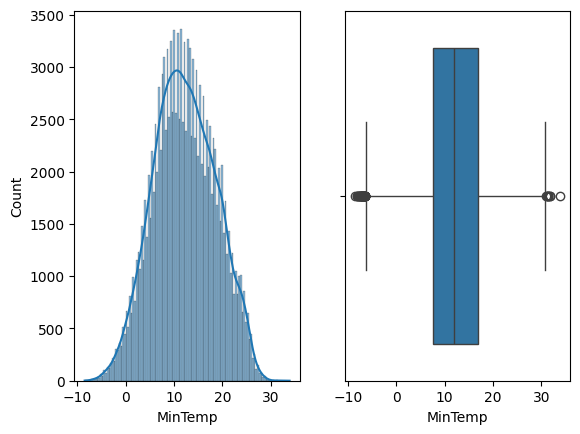

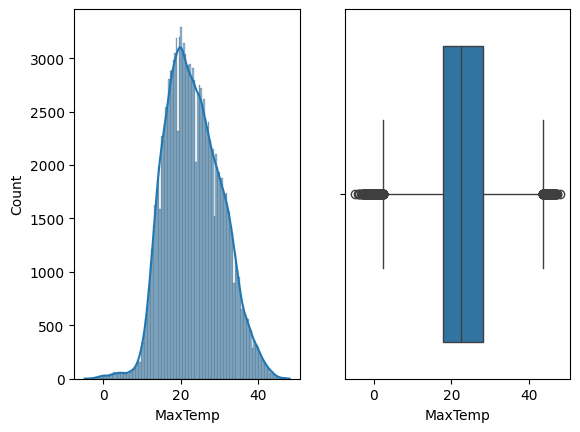

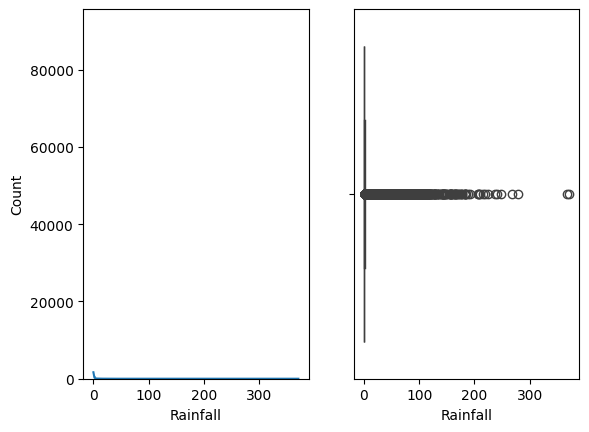

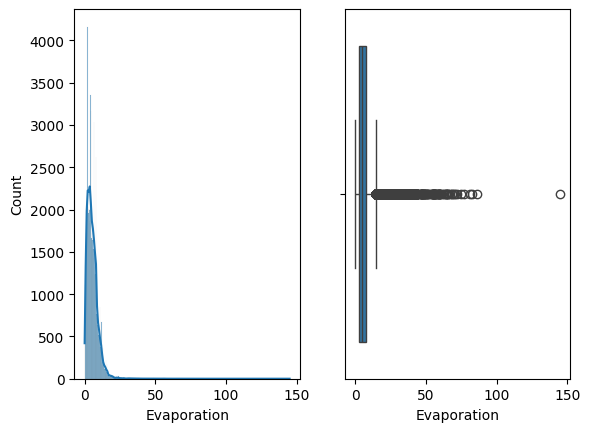

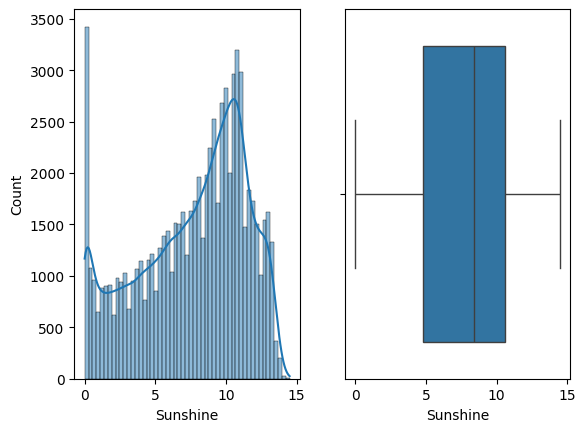

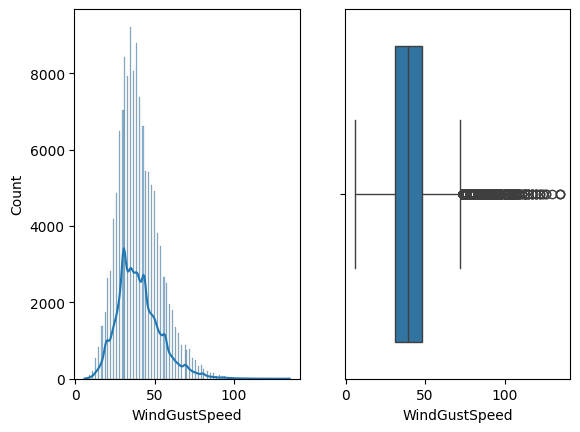

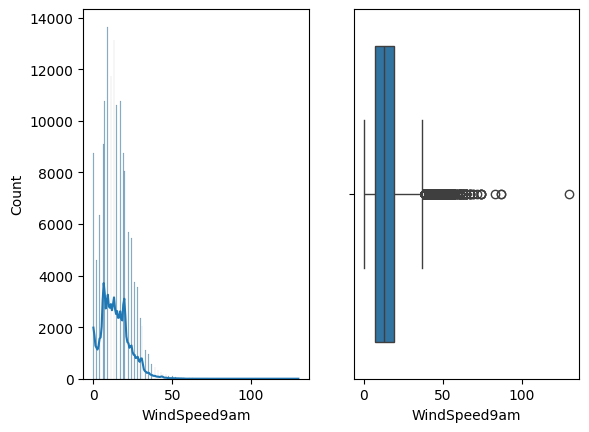

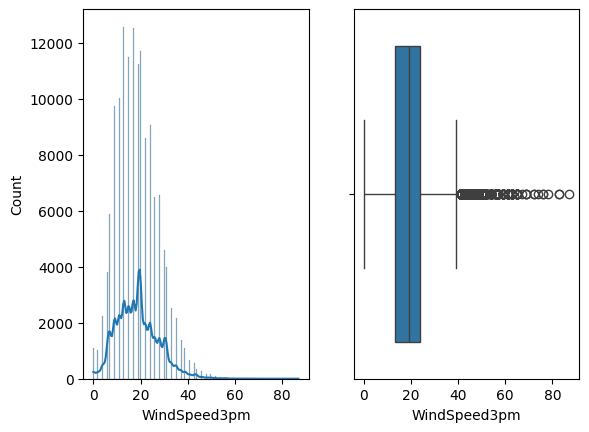

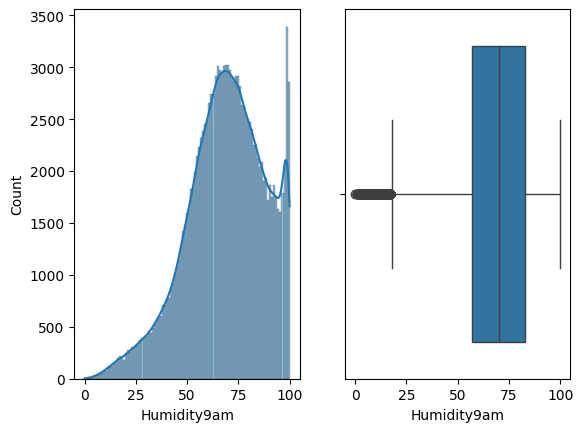

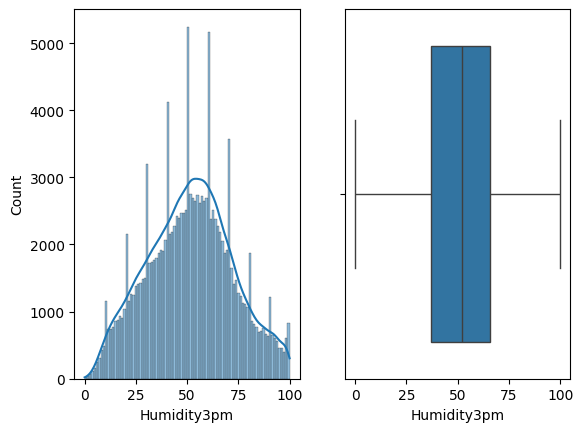

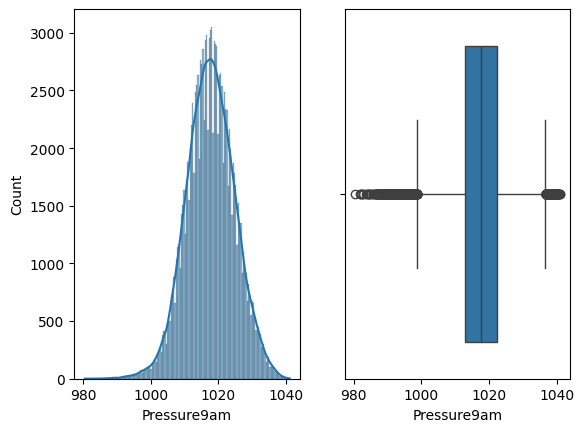

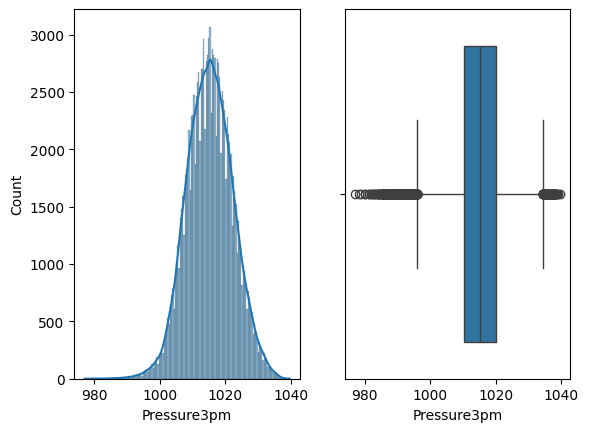

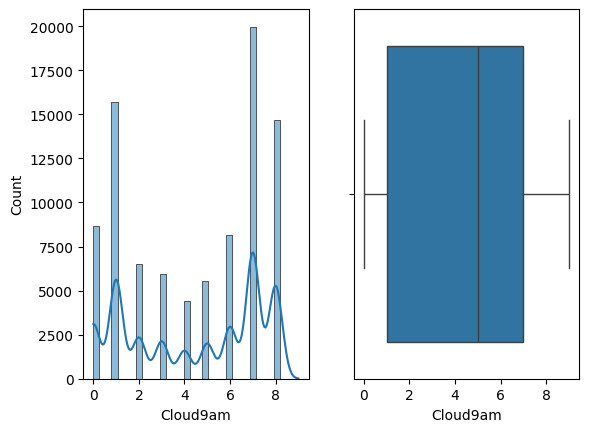

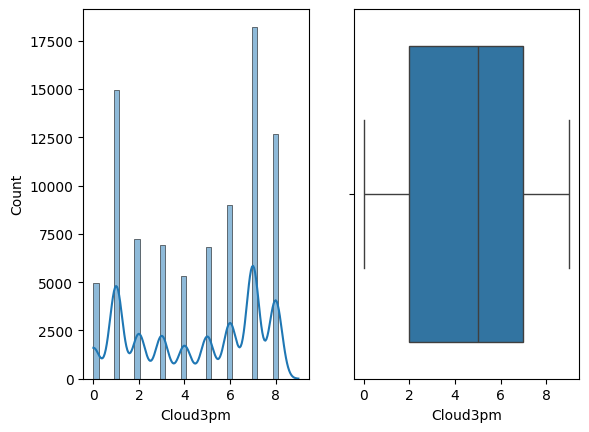

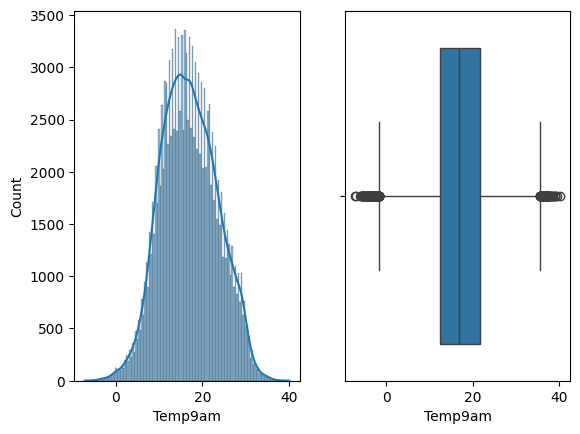

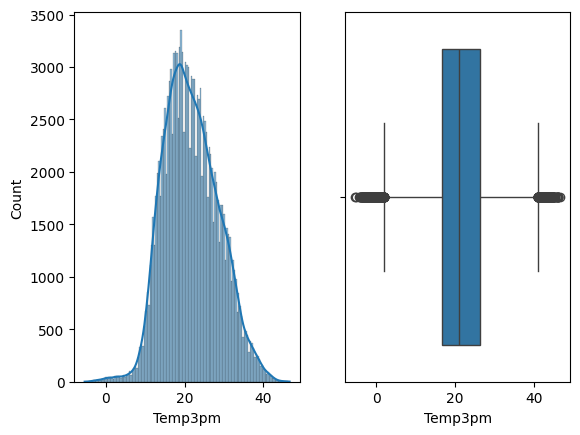

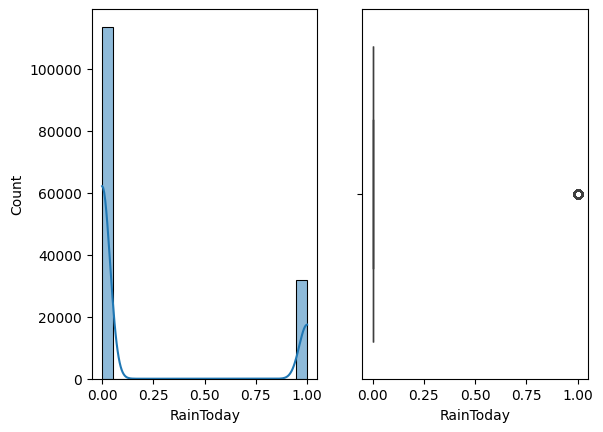

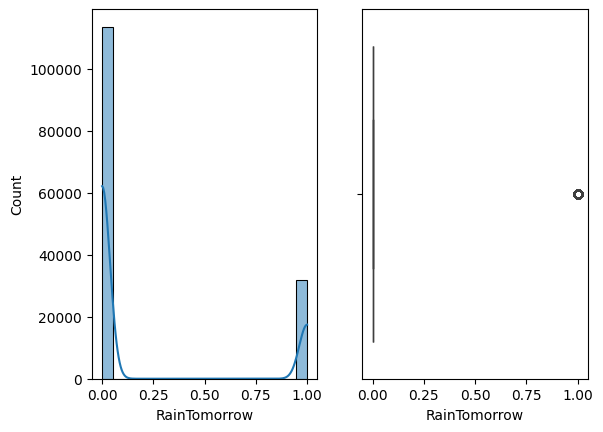

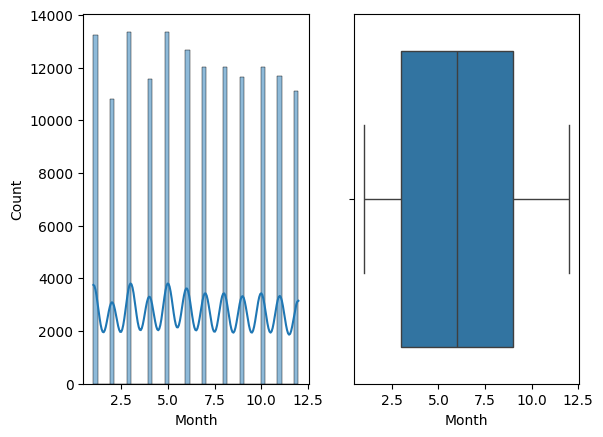

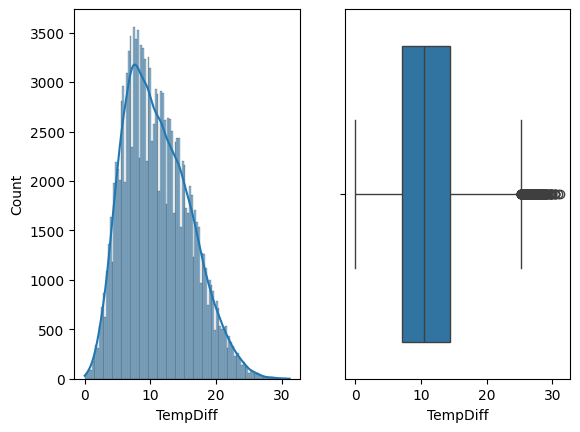

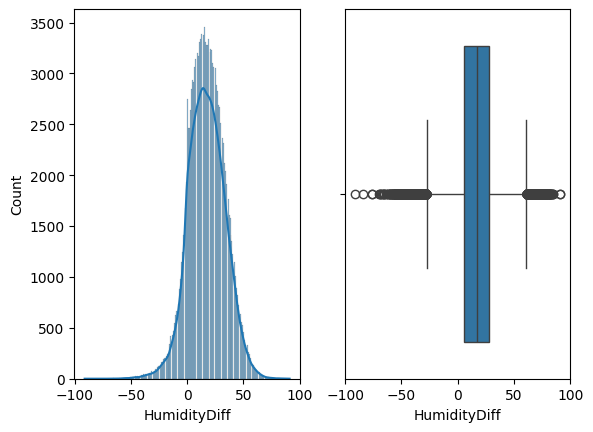

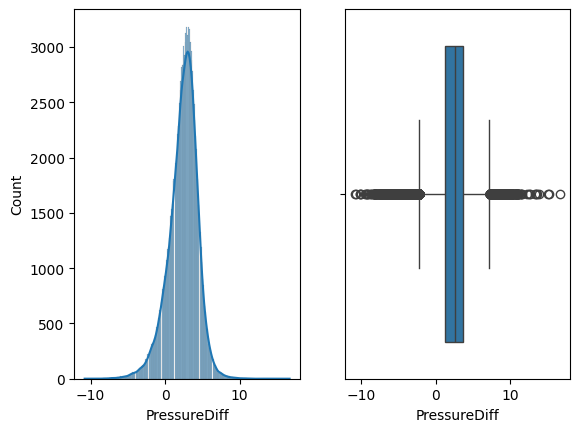

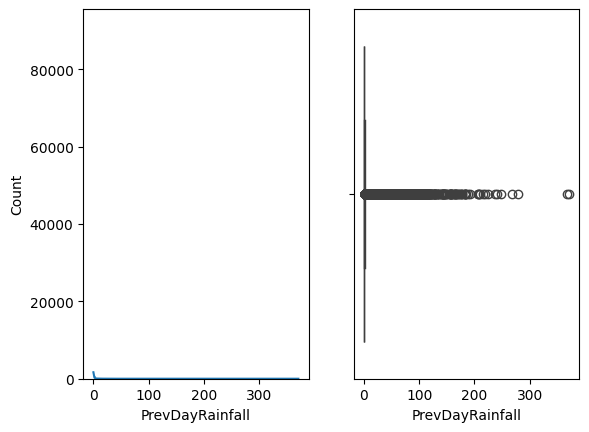

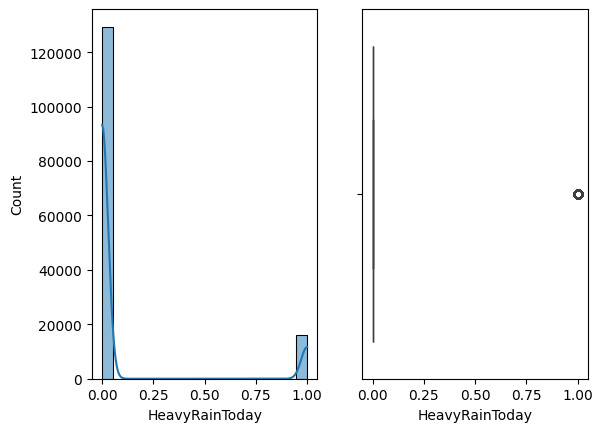

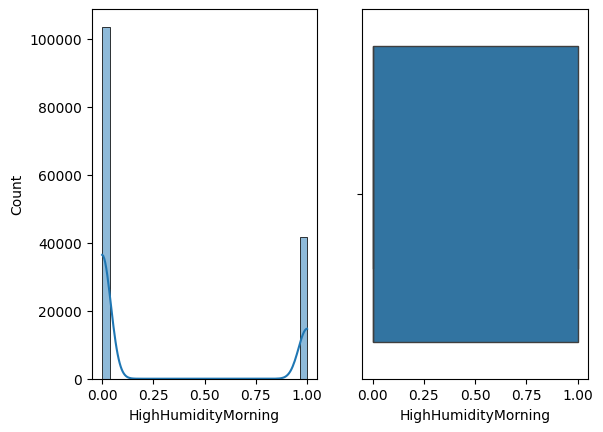

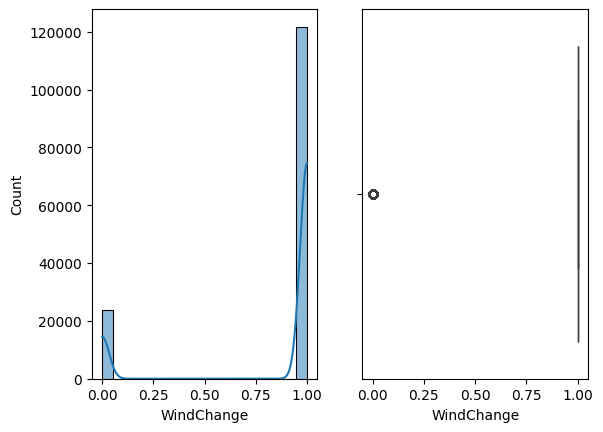

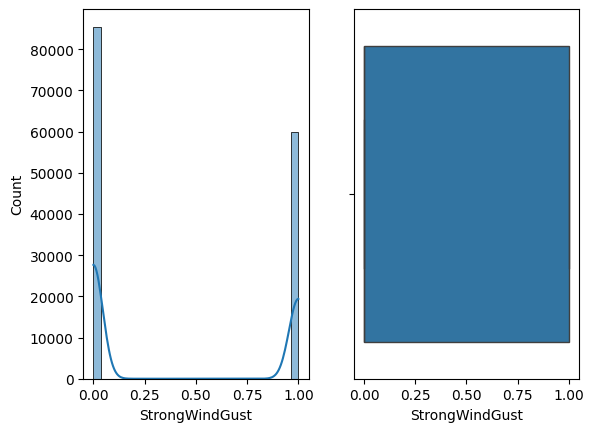

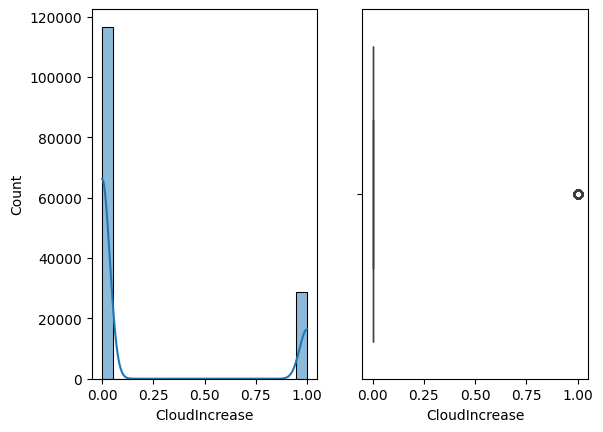

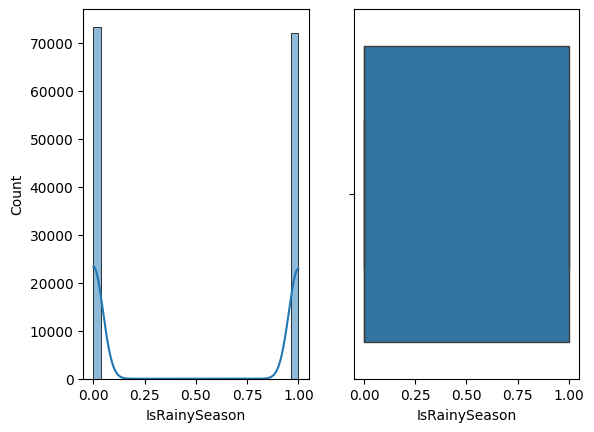

In [ ]:
# UniVariate Analysis

num_cols = df.select_dtypes(include="number").columns

for col in num_cols:
    fig, axes= plt.subplots(nrows=1, ncols=2)
    sns.histplot(df[col], kde=True, ax=axes[0])
    sns.boxplot(x=df[col], ax=axes[1])
    plt.show()

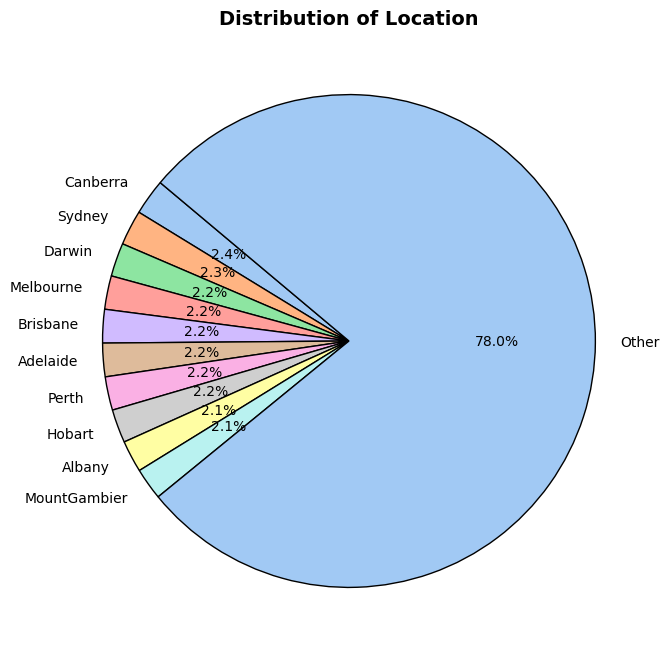

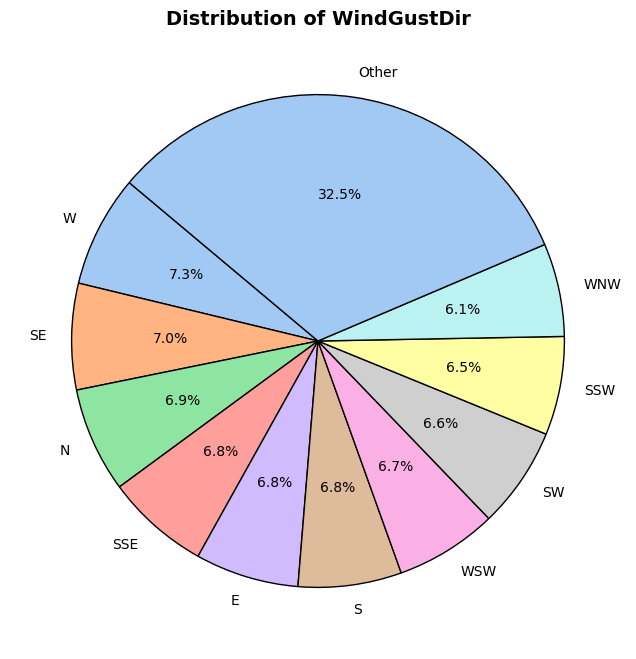

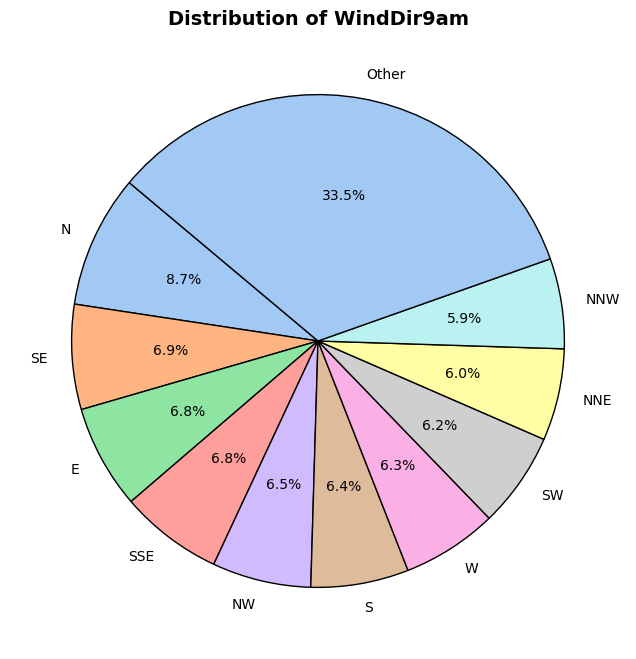

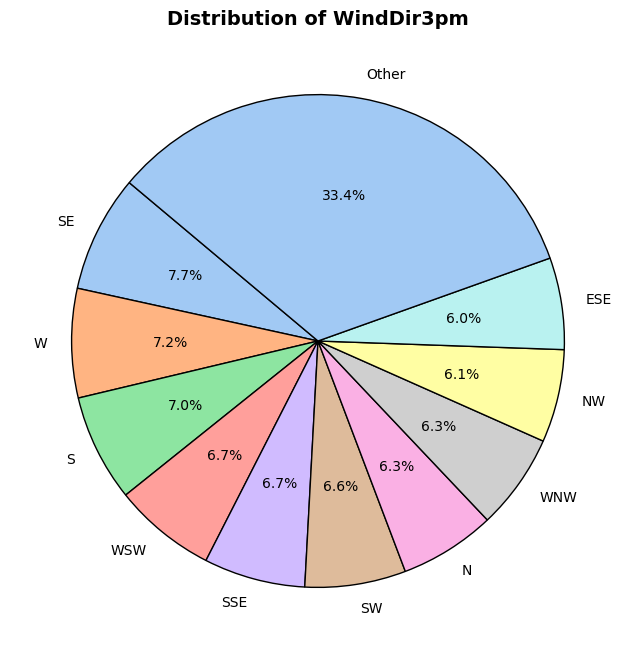

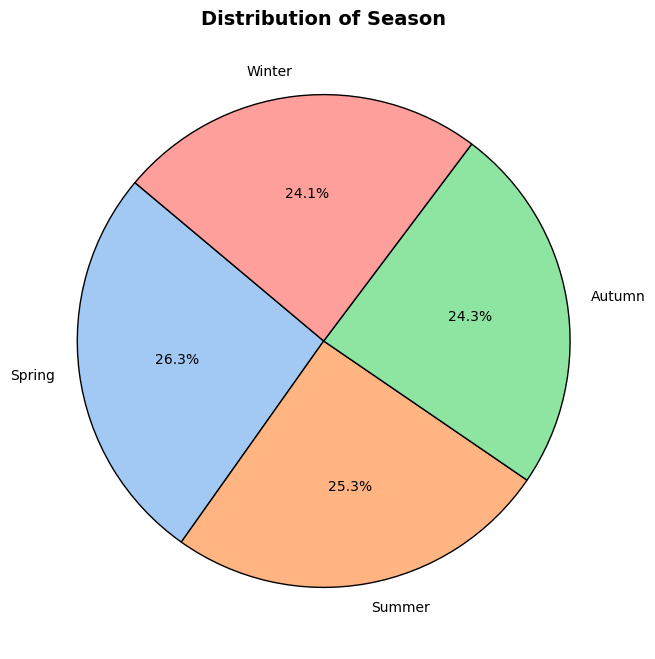

In [15]:
# Identify categorical (object) columns
categorical_columns = df.select_dtypes(include='object').columns

for col in categorical_columns:
    plt.figure(figsize=(8, 8))  # Set figure size
    value_counts = df[col].value_counts()

    # If too many categories, group smaller ones as "Other"
    if len(value_counts) > 10:
        top_10 = value_counts[:10]
        other_sum = value_counts[10:].sum()
        value_counts = pd.concat([top_10, pd.Series({'Other': other_sum})], axis=0)

    # Define colors
    colors = sns.color_palette("pastel", len(value_counts))

    # Create pie chart
    plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', colors=colors, 
            startangle=140, wedgeprops={'edgecolor': 'black'})

    # Add title
    plt.title(f"Distribution of {col}", fontsize=14, fontweight='bold')

    # Display the pie chart
    plt.show()


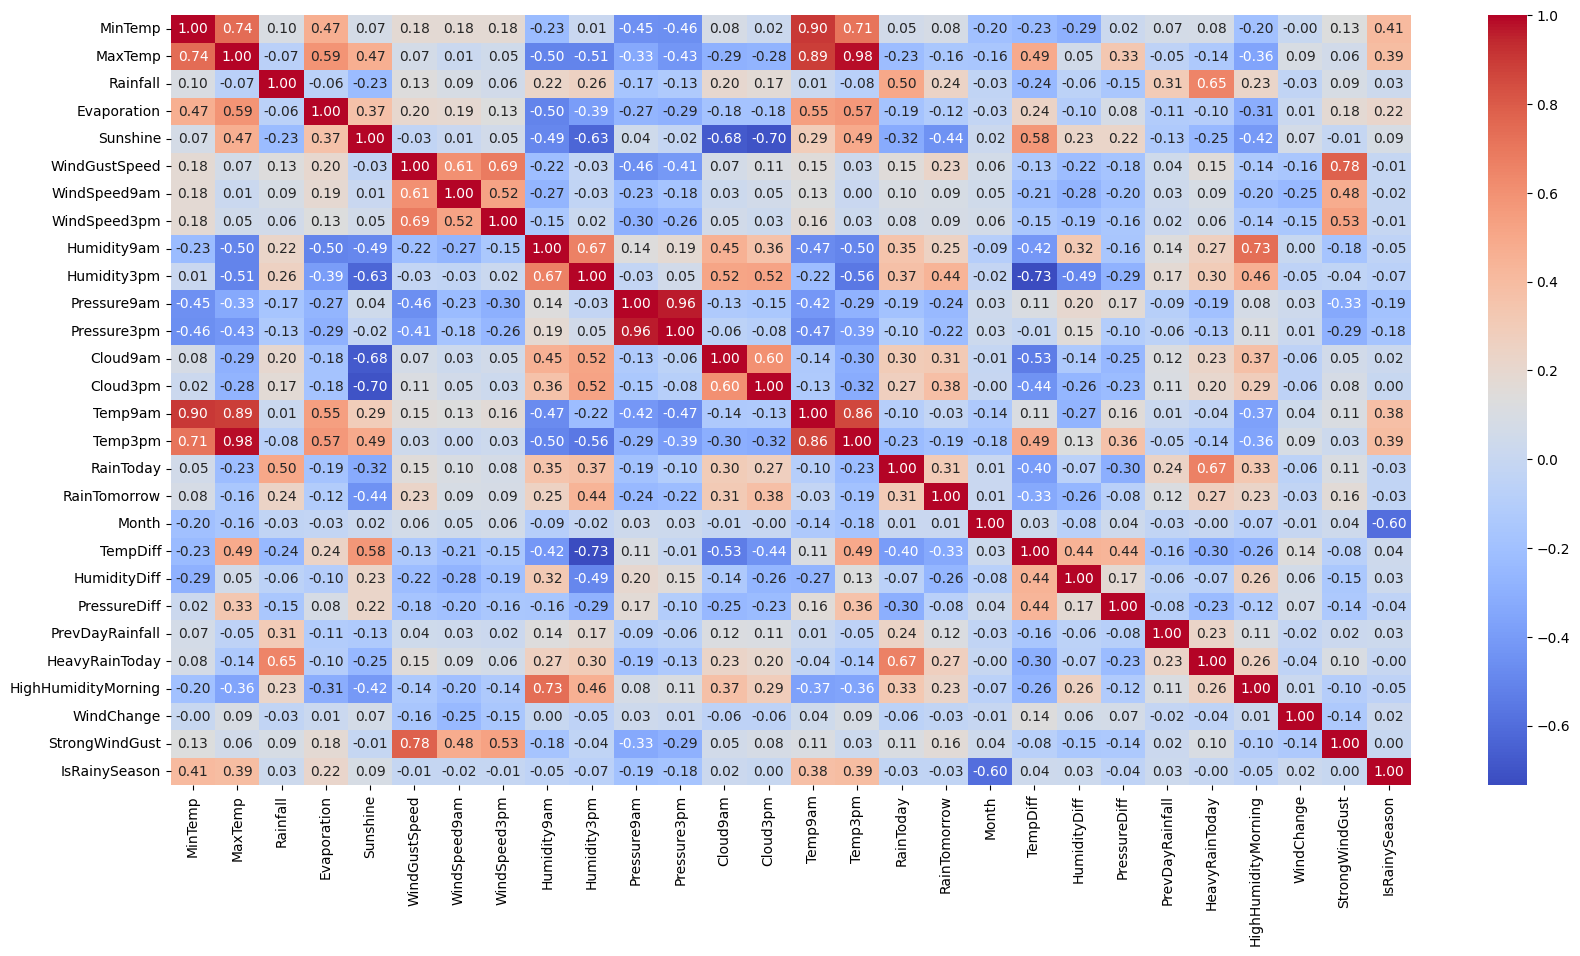

In [ ]:
# Bi-Variate
# Set larger figure size
plt.figure(figsize=(20, 10))  # Adjust width and height as needed
# Generate heatmap
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, fmt='.2f', cmap='coolwarm')
# Show plot
plt.show()

In [ ]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'Month', 'TempDiff',
       'HumidityDiff', 'PressureDiff', 'PrevDayRainfall', 'Season',
       'HeavyRainToday', 'HighHumidityMorning', 'WindChange', 'StrongWindGust',
       'CloudIncrease', 'IsRainySeason'],
      dtype='object')

In [16]:
#columns_to_drop = ['Date', 'Location', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm']

df.drop(['Date', 'PressureDiff', 'Month', 'TempDiff','HumidityDiff','Temp9am','Temp3pm','Pressure3pm','Pressure9am','WindSpeed3pm','WindSpeed9am', 'CloudIncrease', 'IsRainySeason','HighHumidityMorning'], axis=1, inplace=True)
df

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0        Albury     13.4     22.9       0.6          NaN       NaN   
1        Albury      7.4     25.1       0.0          NaN       NaN   
2        Albury     12.9     25.7       0.0          NaN       NaN   
3        Albury      9.2     28.0       0.0          NaN       NaN   
4        Albury     17.5     32.3       1.0          NaN       NaN   
...         ...      ...      ...       ...          ...       ...   
145455    Uluru      2.8     23.4       0.0          NaN       NaN   
145456    Uluru      3.6     25.3       0.0          NaN       NaN   
145457    Uluru      5.4     26.9       0.0          NaN       NaN   
145458    Uluru      7.8     27.0       0.0          NaN       NaN   
145459    Uluru     14.9      NaN       0.0          NaN       NaN   

       WindGustDir  WindGustSpeed WindDir9am WindDir3pm  ...  Humidity3pm  \
0                W           44.0          W        WNW  ...         22.0   
1              WNW           44.0        NNW        WSW  ...         25.0   
2              WSW           46.0          W        WSW  ...         30.0   
3               NE           24.0         SE          E  ...         16.0   
4                W           41.0        ENE         NW  ...         33.0   
...            ...            ...        ...        ...  ...          ...   
145455           E           31.0         SE        ENE  ...         24.0   
145456         NNW           22.0         SE          N  ...         21.0   
145457           N           37.0         SE        WNW  ...         24.0   
145458          SE           28.0        SSE          N  ...         24.0   
145459         NaN            NaN        ESE        ESE  ...         36.0   

        Cloud9am  Cloud3pm  RainToday  RainTomorrow  PrevDayRainfall  Season  \
0            8.0       NaN        0.0           0.0              NaN  Winter   
1            NaN       NaN        0.0           0.0              0.6  Winter   
2            NaN       2.0        0.0           0.0              0.0  Winter   
3            NaN       NaN        0.0           0.0              0.0  Winter   
4            7.0       8.0        0.0           0.0              0.0  Winter   
...          ...       ...        ...           ...              ...     ...   
145455       NaN       NaN        0.0           0.0              0.0  Summer   
145456       NaN       NaN        0.0           0.0              0.0  Summer   
145457       NaN       NaN        0.0           0.0              0.0  Summer   
145458       3.0       2.0        0.0           0.0              0.0  Summer   
145459       8.0       8.0        0.0           0.0              0.0  Summer   

       HeavyRainToday  WindChange  StrongWindGust  
0                   0           1               1  
1                   0           1               1  
2                   0           1               1  
3                   0           1               0  
4                   0           1               1  
...               ...         ...             ...  
145455              0           1               0  
145456              0           1               0  
145457              0           1               0  
145458              0           1               0  
145459              0           0               0  

[145460 rows x 21 columns]

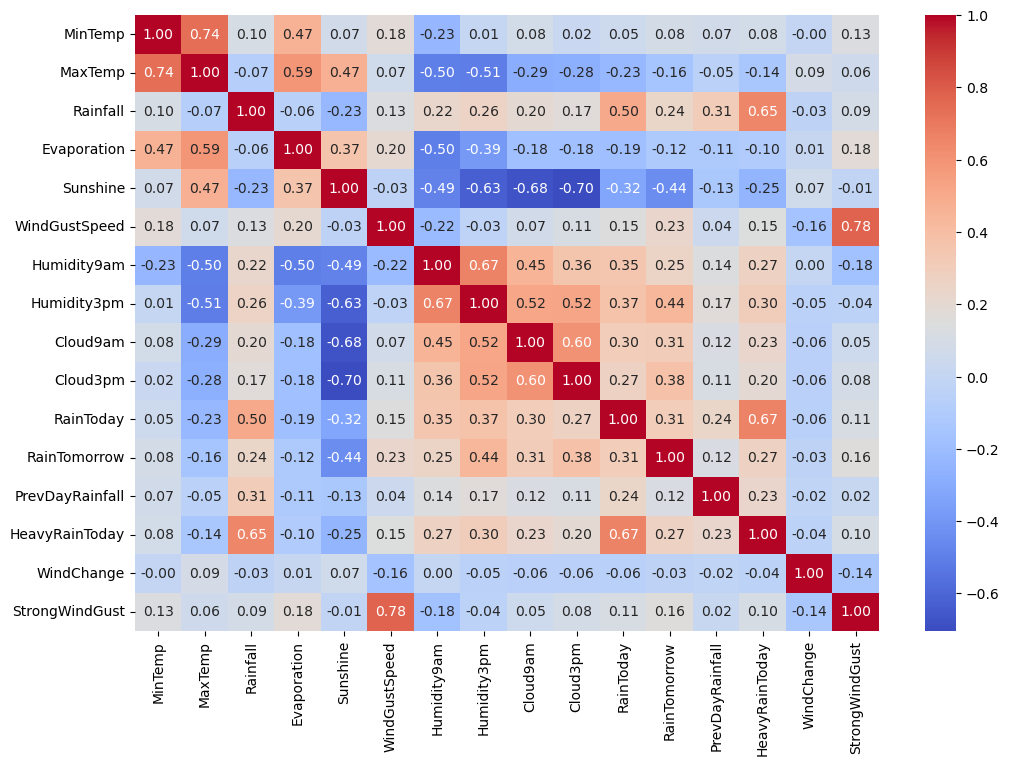

In [17]:
# Bi-Variate
# Set larger figure size
plt.figure(figsize=(12, 8))  # Adjust width and height as needed
# Generate heatmap
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, fmt='.2f', cmap='coolwarm')
# Show plot
plt.show()

In [20]:
df.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'Humidity9am', 'Humidity3pm', 'Cloud9am', 'Cloud3pm', 'RainToday',
       'RainTomorrow', 'PrevDayRainfall', 'Season', 'HeavyRainToday',
       'WindChange', 'StrongWindGust'],
      dtype='object')

In [18]:
#columns_to_drop = ['Date', 'Location', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm']

df.drop(['MinTemp', 'MaxTemp'], axis=1, inplace=True)
df

Location  Rainfall  Evaporation  Sunshine WindGustDir  WindGustSpeed  \
0        Albury       0.6          NaN       NaN           W           44.0   
1        Albury       0.0          NaN       NaN         WNW           44.0   
2        Albury       0.0          NaN       NaN         WSW           46.0   
3        Albury       0.0          NaN       NaN          NE           24.0   
4        Albury       1.0          NaN       NaN           W           41.0   
...         ...       ...          ...       ...         ...            ...   
145455    Uluru       0.0          NaN       NaN           E           31.0   
145456    Uluru       0.0          NaN       NaN         NNW           22.0   
145457    Uluru       0.0          NaN       NaN           N           37.0   
145458    Uluru       0.0          NaN       NaN          SE           28.0   
145459    Uluru       0.0          NaN       NaN         NaN            NaN   

       WindDir9am WindDir3pm  Humidity9am  Humidity3pm  Cloud9am  Cloud3pm  \
0               W        WNW         71.0         22.0       8.0       NaN   
1             NNW        WSW         44.0         25.0       NaN       NaN   
2               W        WSW         38.0         30.0       NaN       2.0   
3              SE          E         45.0         16.0       NaN       NaN   
4             ENE         NW         82.0         33.0       7.0       8.0   
...           ...        ...          ...          ...       ...       ...   
145455         SE        ENE         51.0         24.0       NaN       NaN   
145456         SE          N         56.0         21.0       NaN       NaN   
145457         SE        WNW         53.0         24.0       NaN       NaN   
145458        SSE          N         51.0         24.0       3.0       2.0   
145459        ESE        ESE         62.0         36.0       8.0       8.0   

        RainToday  RainTomorrow  PrevDayRainfall  Season  HeavyRainToday  \
0             0.0           0.0              NaN  Winter               0   
1             0.0           0.0              0.6  Winter               0   
2             0.0           0.0              0.0  Winter               0   
3             0.0           0.0              0.0  Winter               0   
4             0.0           0.0              0.0  Winter               0   
...           ...           ...              ...     ...             ...   
145455        0.0           0.0              0.0  Summer               0   
145456        0.0           0.0              0.0  Summer               0   
145457        0.0           0.0              0.0  Summer               0   
145458        0.0           0.0              0.0  Summer               0   
145459        0.0           0.0              0.0  Summer               0   

        WindChange  StrongWindGust  
0                1               1  
1                1               1  
2                1               1  
3                1               0  
4                1               1  
...            ...             ...  
145455           1               0  
145456           1               0  
145457           1               0  
145458           1               0  
145459           0               0  

[145460 rows x 19 columns]

In [19]:
#Evaporation
df.drop(['Evaporation'], axis=1, inplace=True)
df

Location  Rainfall  Sunshine WindGustDir  WindGustSpeed WindDir9am  \
0        Albury       0.6       NaN           W           44.0          W   
1        Albury       0.0       NaN         WNW           44.0        NNW   
2        Albury       0.0       NaN         WSW           46.0          W   
3        Albury       0.0       NaN          NE           24.0         SE   
4        Albury       1.0       NaN           W           41.0        ENE   
...         ...       ...       ...         ...            ...        ...   
145455    Uluru       0.0       NaN           E           31.0         SE   
145456    Uluru       0.0       NaN         NNW           22.0         SE   
145457    Uluru       0.0       NaN           N           37.0         SE   
145458    Uluru       0.0       NaN          SE           28.0        SSE   
145459    Uluru       0.0       NaN         NaN            NaN        ESE   

       WindDir3pm  Humidity9am  Humidity3pm  Cloud9am  Cloud3pm  RainToday  \
0             WNW         71.0         22.0       8.0       NaN        0.0   
1             WSW         44.0         25.0       NaN       NaN        0.0   
2             WSW         38.0         30.0       NaN       2.0        0.0   
3               E         45.0         16.0       NaN       NaN        0.0   
4              NW         82.0         33.0       7.0       8.0        0.0   
...           ...          ...          ...       ...       ...        ...   
145455        ENE         51.0         24.0       NaN       NaN        0.0   
145456          N         56.0         21.0       NaN       NaN        0.0   
145457        WNW         53.0         24.0       NaN       NaN        0.0   
145458          N         51.0         24.0       3.0       2.0        0.0   
145459        ESE         62.0         36.0       8.0       8.0        0.0   

        RainTomorrow  PrevDayRainfall  Season  HeavyRainToday  WindChange  \
0                0.0              NaN  Winter               0           1   
1                0.0              0.6  Winter               0           1   
2                0.0              0.0  Winter               0           1   
3                0.0              0.0  Winter               0           1   
4                0.0              0.0  Winter               0           1   
...              ...              ...     ...             ...         ...   
145455           0.0              0.0  Summer               0           1   
145456           0.0              0.0  Summer               0           1   
145457           0.0              0.0  Summer               0           1   
145458           0.0              0.0  Summer               0           1   
145459           0.0              0.0  Summer               0           0   

        StrongWindGust  
0                    1  
1                    1  
2                    1  
3                    0  
4                    1  
...                ...  
145455               0  
145456               0  
145457               0  
145458               0  
145459               0  

[145460 rows x 18 columns]

In [23]:
df.columns

Index(['Location', 'Rainfall', 'Sunshine', 'WindGustDir', 'WindGustSpeed',
       'WindDir9am', 'WindDir3pm', 'Humidity9am', 'Humidity3pm', 'Cloud9am',
       'Cloud3pm', 'RainToday', 'RainTomorrow', 'PrevDayRainfall', 'Season',
       'HeavyRainToday', 'WindChange', 'StrongWindGust'],
      dtype='object')

******************************

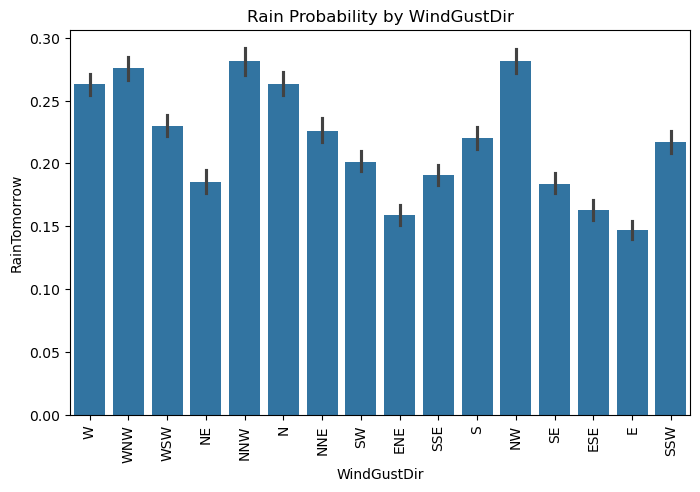

In [19]:
## QU: "How does wind gust direction impact the likelihood of rain tomorrow?"
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.barplot(x=df["WindGustDir"], y=df["RainTomorrow"])
plt.xticks(rotation=90)
plt.title("Rain Probability by WindGustDir")
plt.show()


C:\Users\NohaA\AppData\Local\Temp\ipykernel_25268\1656737511.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["RainTomorrow"], y=df["Cloud9am"], palette=["lightblue", "orange"])


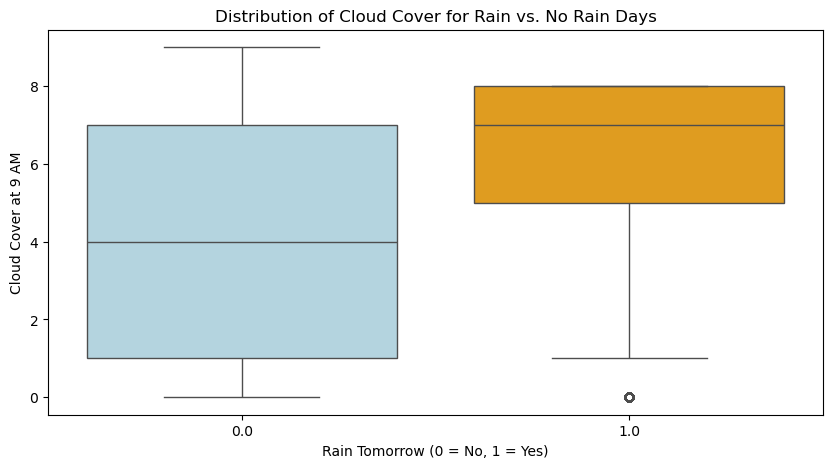

In [20]:
## QU: "How does morning cloud cover impact the likelihood of rain tomorrow?"
plt.figure(figsize=(10,5))
sns.boxplot(x=df["RainTomorrow"], y=df["Cloud9am"], palette=["lightblue", "orange"])
plt.xlabel("Rain Tomorrow (0 = No, 1 = Yes)")
plt.ylabel("Cloud Cover at 9 AM")
plt.title("Distribution of Cloud Cover for Rain vs. No Rain Days")
plt.show()

C:\Users\NohaA\AppData\Local\Temp\ipykernel_25268\18680493.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="RainTomorrow", y="PrevDayRainfall", palette=["blue", "red"])


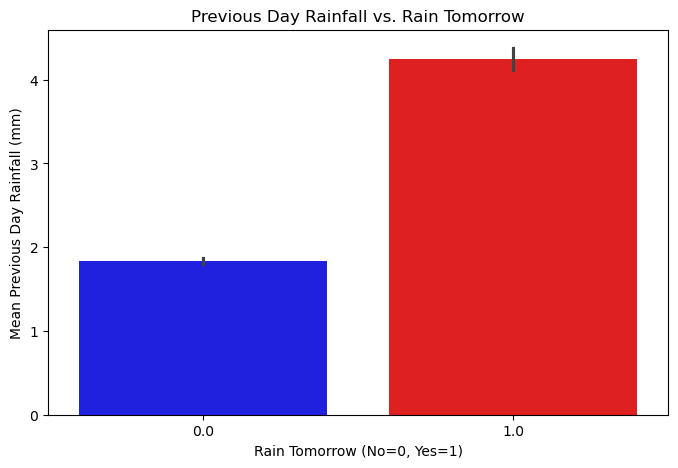

In [ ]:
## "How does rainfall on the previous day influence the likelihood of rain tomorrow?"
plt.figure(figsize=(8,5))
sns.barplot(data=df, x="RainTomorrow", y="PrevDayRainfall", palette=["blue", "red"])
plt.title("Previous Day Rainfall vs. Rain Tomorrow")
plt.xlabel("Rain Tomorrow (No=0, Yes=1)")
plt.ylabel("Mean Previous Day Rainfall (mm)")
plt.show()

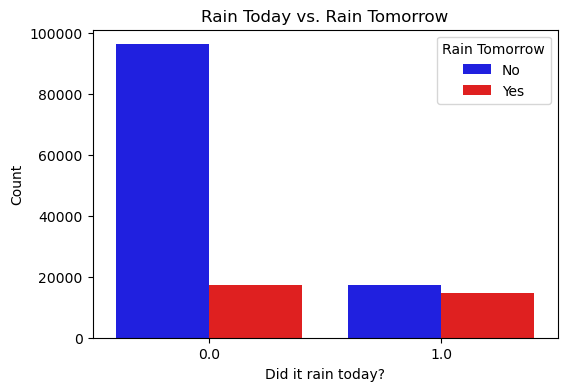

In [22]:
## QU "Does rain today increase the likelihood of rain tomorrow?"
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="RainToday", hue="RainTomorrow", palette=["blue", "red"])
plt.title("Rain Today vs. Rain Tomorrow")
plt.xlabel("Did it rain today?")
plt.ylabel("Count")
plt.legend(title="Rain Tomorrow", labels=["No", "Yes"])
plt.show()

<Figure size 800x500 with 0 Axes>

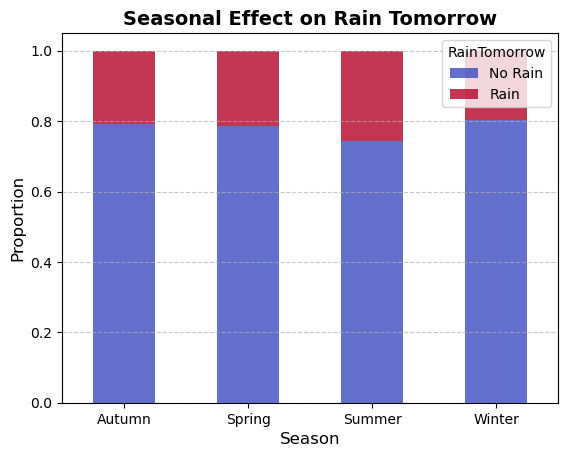

In [ ]:
## QU "How do seasonal patterns impact the likelihood of rain tomorrow?"
# Count occurrences of RainTomorrow per season
season_counts = df.groupby("Season")["RainTomorrow"].value_counts(normalize=True).unstack()

# Visualization
plt.figure(figsize=(8, 5))
season_counts.plot(kind="bar", stacked=True, colormap="coolwarm", alpha=0.8)

plt.title("Seasonal Effect on Rain Tomorrow", fontsize=14, fontweight="bold")
plt.xlabel("Season", fontsize=12)
plt.ylabel("Proportion", fontsize=12)
plt.legend(["No Rain", "Rain"], title="RainTomorrow")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


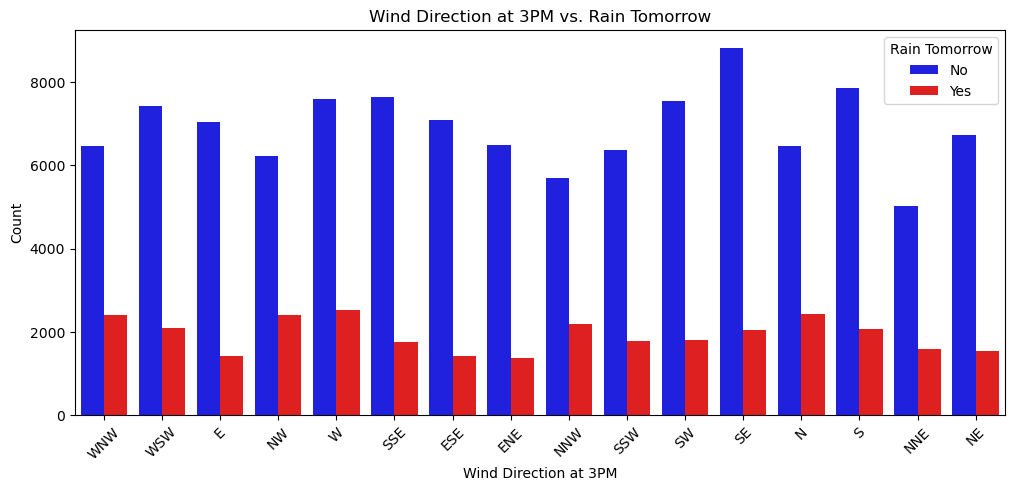

In [25]:
## QU "How does wind direction at 3 PM influence the likelihood of rain tomorrow?"
plt.figure(figsize=(12,5))
sns.countplot(data=df, x="WindDir3pm", hue="RainTomorrow", palette=["blue", "red"])
plt.xticks(rotation=45)
plt.title("Wind Direction at 3PM vs. Rain Tomorrow")
plt.xlabel("Wind Direction at 3PM")
plt.ylabel("Count")
plt.legend(title="Rain Tomorrow", labels=["No", "Yes"])
plt.show()

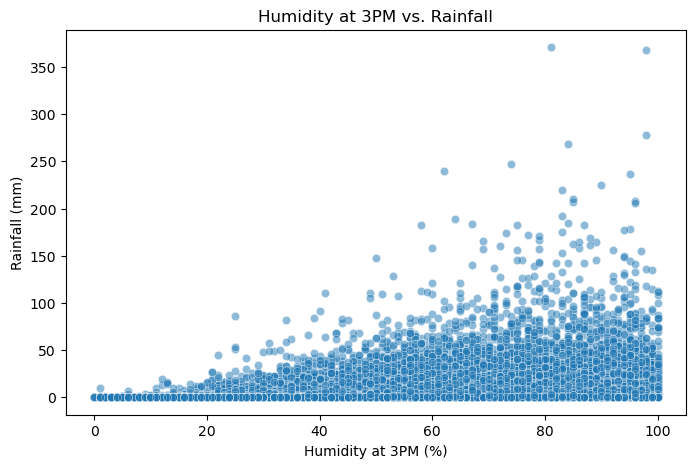

In [26]:
## QU "How does humidity at 3 PM affect the amount of rainfall?"

plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="Humidity3pm", y="Rainfall", alpha=0.5)
plt.title("Humidity at 3PM vs. Rainfall")
plt.xlabel("Humidity at 3PM (%)")
plt.ylabel("Rainfall (mm)")
plt.show()


C:\Users\NohaA\AppData\Local\Temp\ipykernel_25268\1044889641.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=df, x="RainTomorrow", y="WindGustSpeed", alpha=0.5, jitter=True, palette=["blue", "red"])


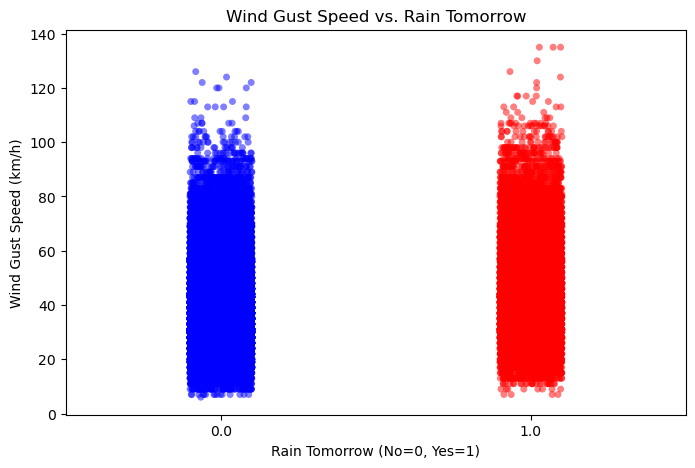

In [27]:
## QU: "How does wind gust speed impact the likelihood of rain tomorrow?"
plt.figure(figsize=(8,5))
sns.stripplot(data=df, x="RainTomorrow", y="WindGustSpeed", alpha=0.5, jitter=True, palette=["blue", "red"])
plt.title("Wind Gust Speed vs. Rain Tomorrow")
plt.xlabel("Rain Tomorrow (No=0, Yes=1)")
plt.ylabel("Wind Gust Speed (km/h)")
plt.show()


******************

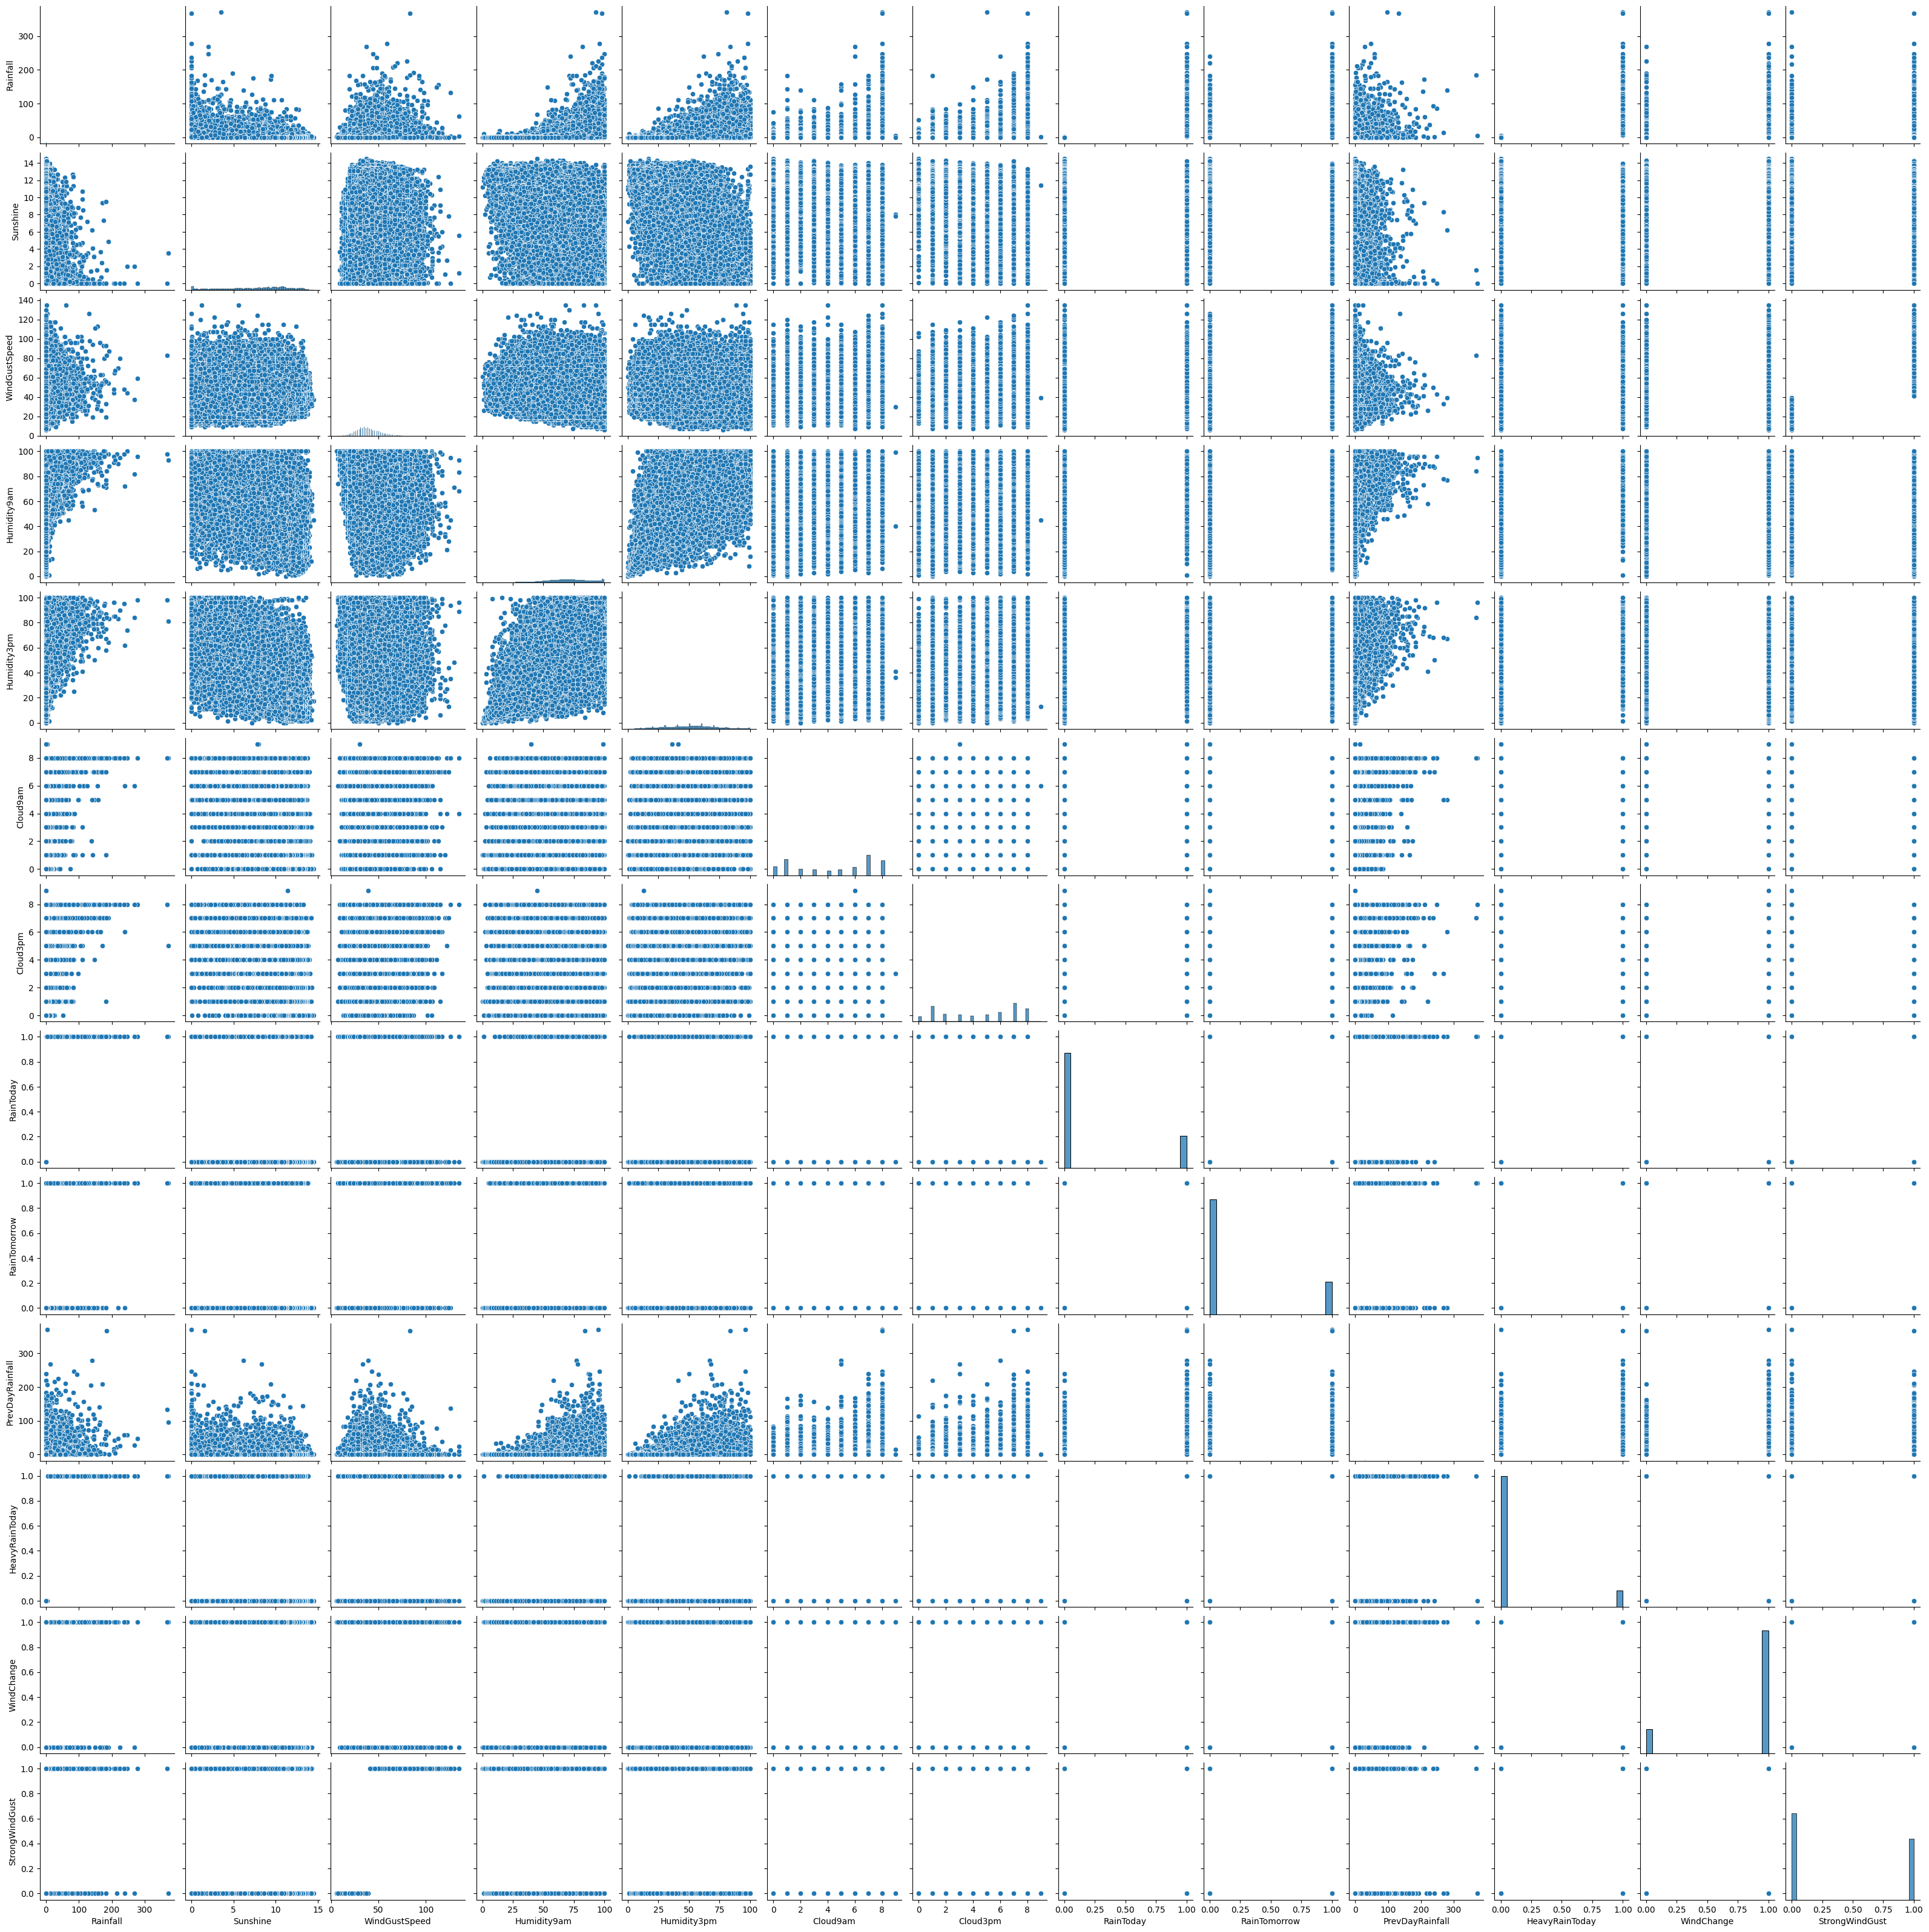

In [ ]:
# MultiVariate

sns.pairplot(df.select_dtypes(include='number'))

*********************************************

## 3) Pre-Processing Mind Map:¶
a) Detect & Handle Duplicates

b) train_test_split

c) Detect & Handle NaNs

d) Detect & Handle Outliers

e) Encoding: (Ordinal:[OrdinalEncoder, LabelEncoder] - Nominal: [< 7 uniques(OneHotEncoding), > 7 uniques (BinaryEncoder)])

f) Imbalanced: X_train_resampled

g) Scaling: StandardScaler, MinMaxScaler, RobustScaler: X_train_resampled_scaled

In [ ]:
df.columns

Index(['Location', 'Rainfall', 'Sunshine', 'WindGustDir', 'WindGustSpeed',
       'WindDir9am', 'WindDir3pm', 'Humidity9am', 'Humidity3pm', 'Cloud9am',
       'Cloud3pm', 'RainToday', 'RainTomorrow', 'PrevDayRainfall', 'Season',
       'HeavyRainToday', 'WindChange', 'StrongWindGust'],
      dtype='object')

In [ ]:
df

Location  Rainfall  Sunshine WindGustDir  WindGustSpeed WindDir9am  \
0        Albury       0.6       NaN           W           44.0          W   
1        Albury       0.0       NaN         WNW           44.0        NNW   
2        Albury       0.0       NaN         WSW           46.0          W   
3        Albury       0.0       NaN          NE           24.0         SE   
4        Albury       1.0       NaN           W           41.0        ENE   
...         ...       ...       ...         ...            ...        ...   
145455    Uluru       0.0       NaN           E           31.0         SE   
145456    Uluru       0.0       NaN         NNW           22.0         SE   
145457    Uluru       0.0       NaN           N           37.0         SE   
145458    Uluru       0.0       NaN          SE           28.0        SSE   
145459    Uluru       0.0       NaN         NaN            NaN        ESE   

       WindDir3pm  Humidity9am  Humidity3pm  Cloud9am  Cloud3pm RainToday  \
0             WNW         71.0         22.0       8.0       NaN        No   
1             WSW         44.0         25.0       NaN       NaN        No   
2             WSW         38.0         30.0       NaN       2.0        No   
3               E         45.0         16.0       NaN       NaN        No   
4              NW         82.0         33.0       7.0       8.0        No   
...           ...          ...          ...       ...       ...       ...   
145455        ENE         51.0         24.0       NaN       NaN        No   
145456          N         56.0         21.0       NaN       NaN        No   
145457        WNW         53.0         24.0       NaN       NaN        No   
145458          N         51.0         24.0       3.0       2.0        No   
145459        ESE         62.0         36.0       8.0       8.0        No   

       RainTomorrow  PrevDayRainfall  Season  HeavyRainToday  WindChange  \
0                No              NaN  Winter               0           1   
1                No              0.6  Winter               0           1   
2                No              0.0  Winter               0           1   
3                No              0.0  Winter               0           1   
4                No              0.0  Winter               0           1   
...             ...              ...     ...             ...         ...   
145455           No              0.0  Summer               0           1   
145456           No              0.0  Summer               0           1   
145457           No              0.0  Summer               0           1   
145458           No              0.0  Summer               0           1   
145459          NaN              0.0  Summer               0           0   

        StrongWindGust  
0                    1  
1                    1  
2                    1  
3                    0  
4                    1  
...                ...  
145455               0  
145456               0  
145457               0  
145458               0  
145459               0  

[145217 rows x 18 columns]

In [20]:
# a) Detect & Handle Duplicates

df.duplicated().sum()

np.int64(250)

In [21]:
df.drop_duplicates(inplace=True)
df

Location  Rainfall  Sunshine WindGustDir  WindGustSpeed WindDir9am  \
0        Albury       0.6       NaN           W           44.0          W   
1        Albury       0.0       NaN         WNW           44.0        NNW   
2        Albury       0.0       NaN         WSW           46.0          W   
3        Albury       0.0       NaN          NE           24.0         SE   
4        Albury       1.0       NaN           W           41.0        ENE   
...         ...       ...       ...         ...            ...        ...   
145455    Uluru       0.0       NaN           E           31.0         SE   
145456    Uluru       0.0       NaN         NNW           22.0         SE   
145457    Uluru       0.0       NaN           N           37.0         SE   
145458    Uluru       0.0       NaN          SE           28.0        SSE   
145459    Uluru       0.0       NaN         NaN            NaN        ESE   

       WindDir3pm  Humidity9am  Humidity3pm  Cloud9am  Cloud3pm  RainToday  \
0             WNW         71.0         22.0       8.0       NaN        0.0   
1             WSW         44.0         25.0       NaN       NaN        0.0   
2             WSW         38.0         30.0       NaN       2.0        0.0   
3               E         45.0         16.0       NaN       NaN        0.0   
4              NW         82.0         33.0       7.0       8.0        0.0   
...           ...          ...          ...       ...       ...        ...   
145455        ENE         51.0         24.0       NaN       NaN        0.0   
145456          N         56.0         21.0       NaN       NaN        0.0   
145457        WNW         53.0         24.0       NaN       NaN        0.0   
145458          N         51.0         24.0       3.0       2.0        0.0   
145459        ESE         62.0         36.0       8.0       8.0        0.0   

        RainTomorrow  PrevDayRainfall  Season  HeavyRainToday  WindChange  \
0                0.0              NaN  Winter               0           1   
1                0.0              0.6  Winter               0           1   
2                0.0              0.0  Winter               0           1   
3                0.0              0.0  Winter               0           1   
4                0.0              0.0  Winter               0           1   
...              ...              ...     ...             ...         ...   
145455           0.0              0.0  Summer               0           1   
145456           0.0              0.0  Summer               0           1   
145457           0.0              0.0  Summer               0           1   
145458           0.0              0.0  Summer               0           1   
145459           0.0              0.0  Summer               0           0   

        StrongWindGust  
0                    1  
1                    1  
2                    1  
3                    0  
4                    1  
...                ...  
145455               0  
145456               0  
145457               0  
145458               0  
145459               0  

[145210 rows x 18 columns]

In [22]:
df.duplicated().sum()

np.int64(0)

In [23]:
# b) train_test_split

X = df.drop(["RainTomorrow"], axis=1)
y = df['RainTomorrow']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y, random_state=42)
X_train

Location  Rainfall  Sunshine WindGustDir  WindGustSpeed  \
77786          Portland       0.6       NaN           W           50.0   
93677        Townsville      15.0       2.9          NE           35.0   
28132          Richmond       0.0       NaN          SE           56.0   
67076  MelbourneAirport       0.0      12.3         NNE           69.0   
92523         GoldCoast       0.0       NaN          NW           44.0   
...                 ...       ...       ...         ...            ...   
99664      MountGambier       3.2       4.6           N           28.0   
82895          Dartmoor       0.2       2.8           N           30.0   
14825             Moree       3.8       NaN          NW           33.0   
22915     NorfolkIsland       0.6      11.4          SE           43.0   
25392           Penrith       0.2       NaN         WNW           19.0   

      WindDir9am WindDir3pm  Humidity9am  Humidity3pm  Cloud9am  Cloud3pm  \
77786        WSW          S         70.0         60.0       7.0       8.0   
93677         NE         NE         96.0         75.0       8.0       6.0   
28132        NaN          W         64.0         15.0       NaN       NaN   
67076          N          N         31.0         24.0       5.0       6.0   
92523         NW         NW         89.0         92.0       NaN       NaN   
...          ...        ...          ...          ...       ...       ...   
99664        NNW         SW         96.0         64.0       7.0       3.0   
82895         NE          N        100.0         80.0       NaN       NaN   
14825        NNE          W         95.0         35.0       6.0       NaN   
22915         SE         SE         64.0         59.0       2.0       2.0   
25392        NaN        NNW         98.0         46.0       NaN       NaN   

       RainToday  PrevDayRainfall  Season  HeavyRainToday  WindChange  \
77786        0.0              0.0  Winter               0           1   
93677        1.0              3.6  Winter               1           0   
28132        0.0              0.0  Autumn               0           1   
67076        0.0              0.0  Winter               0           0   
92523        0.0              0.0  Spring               0           0   
...          ...              ...     ...             ...         ...   
99664        1.0              0.0  Spring               0           1   
82895        0.0              0.0  Summer               0           1   
14825        1.0              0.0  Autumn               0           1   
22915        0.0              0.8  Spring               0           0   
25392        0.0              3.8  Summer               0           1   

       StrongWindGust  
77786               1  
93677               0  
28132               1  
67076               1  
92523               1  
...               ...  
99664               0  
82895               0  
14825               0  
22915               1  
25392               0  

[116168 rows x 17 columns]

In [24]:
X_train.shape

(116168, 17)

In [25]:

X_test.shape # good enough


(29042, 17)

In [26]:
y_train.shape

(116168,)

In [27]:


X_train.isna().sum()

Location               0
Rainfall            2499
Sunshine           55644
WindGustDir         8086
WindGustSpeed       8033
WindDir9am          8322
WindDir3pm          3235
Humidity9am         1929
Humidity3pm         3403
Cloud9am           44607
Cloud3pm           47356
RainToday              0
PrevDayRainfall     2537
Season                 0
HeavyRainToday         0
WindChange             0
StrongWindGust         0
dtype: int64

In [28]:
#X_train.dropna(inplace=True)

In [29]:

from sklearn.base import TransformerMixin, BaseEstimator


class LogTransformer(BaseEstimator, TransformerMixin):

    # fit
    def fit(self, X, y=None):
        # self.feature_names = list(X.columns)
        self.n_features_in = X.shape[1]
        return self

    # transformer
    def transform(self, X, y=None):
        assert self.n_features_in == X.shape[1]
        return np.log(X)

    # def get_feature_names_out(self, X, y=None):
    #     return self.feature_names



log_transformer = LogTransformer()
log_transformer

LogTransformer()

In [30]:

# Check if any of the selected columns have 0 or negative values
cols_to_check = ["Humidity9am","Rainfall", 'WindGustSpeed','PrevDayRainfall']
zero_or_negative_counts = (X_train[cols_to_check] <= 0).sum()

print("Count of zero or negative values per column:")
print(zero_or_negative_counts)


Count of zero or negative values per column:
Humidity9am            0
Rainfall           72885
WindGustSpeed          0
PrevDayRainfall    72696
dtype: int64


In [31]:
X_train.columns

Index(['Location', 'Rainfall', 'Sunshine', 'WindGustDir', 'WindGustSpeed',
       'WindDir9am', 'WindDir3pm', 'Humidity9am', 'Humidity3pm', 'Cloud9am',
       'Cloud3pm', 'RainToday', 'PrevDayRainfall', 'Season', 'HeavyRainToday',
       'WindChange', 'StrongWindGust'],
      dtype='object')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 145210 entries, 0 to 145459
Data columns (total 18 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Location         145210 non-null  object 
 1   Rainfall         142108 non-null  float64
 2   Sunshine         75607 non-null   float64
 3   WindGustDir      135131 non-null  object 
 4   WindGustSpeed    135194 non-null  float64
 5   WindDir9am       134880 non-null  object 
 6   WindDir3pm       141229 non-null  object 
 7   Humidity9am      142779 non-null  float64
 8   Humidity3pm      140947 non-null  float64
 9   Cloud9am         89549 non-null   float64
 10  Cloud3pm         86100 non-null   float64
 11  RainToday        145210 non-null  float64
 12  RainTomorrow     145210 non-null  float64
 13  PrevDayRainfall  142045 non-null  float64
 14  Season           145210 non-null  object 
 15  HeavyRainToday   145210 non-null  int64  
 16  WindChange       145210 non-null  int64  
 

In [33]:
X_train['Season']

77786    Winter
93677    Winter
28132    Autumn
67076    Winter
92523    Spring
          ...  
99664    Spring
82895    Summer
14825    Autumn
22915    Spring
25392    Summer
Name: Season, Length: 116168, dtype: object

In [34]:
# The issue is that log transformation could result in inf values if input values are below 1.
# To fix this, I will ensure all values used in log_transform_pipe are capped to a minimum positive threshold before applying logarithm.

# Additional Safeguard to remove infinity values prior to processing
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, RobustScaler, FunctionTransformer, OneHotEncoder
from sklearn.impute import SimpleImputer
from category_encoders.binary import BinaryEncoder

# Safe log transformation function
log_transformer = FunctionTransformer(
    lambda x: np.log1p(np.clip(np.nan_to_num(x, nan=0), a_min=1e-6, a_max=None)),
    validate=False  # Ensures it works with DataFrames too
)
# **Pipeline for Binary Encoding**
cat_binary_pipe = Pipeline(steps=[
    ('handle_nans', SimpleImputer(strategy='most_frequent')),
    ('encode', BinaryEncoder(drop_invariant=False)),

])

# **Pipeline for One-Hot Encoding of Boolean Features**
boolean_categorical_pipe = Pipeline(steps=[
    ('handle_nans', SimpleImputer(strategy='most_frequent')),
    ('encode', OneHotEncoder(sparse_output=False, handle_unknown='ignore')),

])

# **Pipeline for Log Transformation**
rightskew_pipe = Pipeline(steps=[
    ('handle_nans', SimpleImputer(strategy='median')),
    ('handle_outliers', log_transformer),
    ('scale', RobustScaler())
])

# **Pipeline for Humidity-related Features**
humidity_pipe = Pipeline(steps=[
    ('handle_nans', SimpleImputer(strategy='median')),
    ('handle_outliers', log_transformer),
    ('scale', RobustScaler(with_centering=False))
])

# **Numerical Imputation and Scaling**
normal_pipe = Pipeline(steps=[
    ('handle_nans', SimpleImputer(strategy='median')),
    ('scale', RobustScaler())
])

season_ordinal_pipe = Pipeline(steps=[
    ('handle_nans', SimpleImputer(strategy='most_frequent')),  # Fill missing values with most frequent
    ('ordinal_encode', OrdinalEncoder(categories=[['Summer', 'Autumn', 'Winter', 'Spring']]))  # Apply ordinal encoding
])

# ColumnTransformer combining all pipelines
preprocessor = ColumnTransformer(transformers=[
    ('cat_binary_pipe', cat_binary_pipe, ['Location', 'WindGustDir','WindDir9am', 'WindDir3pm']),
    ('boolean_categorical_pipe', boolean_categorical_pipe, ['RainToday', 'HeavyRainToday','StrongWindGust']),
    ('rightskew_pipe', rightskew_pipe, ["Rainfall", 'WindGustSpeed','PrevDayRainfall']),
    ('humidity_pipe', humidity_pipe, ["Humidity9am"]),
    ('normal_pipe', normal_pipe, ['Sunshine','Humidity3pm','Cloud9am', 'Cloud3pm']),
    ("season_ordinal_pipe", season_ordinal_pipe, ['Season']) # Correct column name to 'Season'
], remainder='passthrough') # Passthrough any remaining columns
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('cat_binary_pipe',
                                 Pipeline(steps=[('handle_nans',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encode', BinaryEncoder())]),
                                 ['Location', 'WindGustDir', 'WindDir9am',
                                  'WindDir3pm']),
                                ('boolean_categorical_pipe',
                                 Pipeline(steps=[('handle_nans',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encode',
                                                  OneHotEnco...
                                ('normal_pipe',
                                 Pipeline(steps=[('handle_nans',
                                                  SimpleImputer(strategy='median')),
                                                 ('scale', RobustScaler())]),
                                 ['Sunshine', 'Humidity3pm', 'Cloud9am',
                                  'Cloud3pm']),
                                ('season_ordinal_pipe',
                                 Pipeline(steps=[('handle_nans',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinal_encode',
                                                  OrdinalEncoder(categories=[['Summer',
                                                                              'Autumn',
                                                                              'Winter',
                                                                              'Spring']]))]),
                                 ['Season'])])

In [35]:
X_trian_scaled = preprocessor.fit_transform(X_train)
X_trian_scaled

array([[ 0. ,  0. ,  0. , ...,  1.5,  2. ,  1. ],
       [ 0. ,  0. ,  0. , ...,  0.5,  2. ,  0. ],
       [ 0. ,  0. ,  0. , ...,  0. ,  1. ,  1. ],
       ...,
       [ 0. ,  0. ,  1. , ...,  0. ,  1. ,  1. ],
       [ 0. ,  1. ,  1. , ..., -1.5,  3. ,  0. ],
       [ 0. ,  0. ,  1. , ...,  0. ,  0. ,  1. ]], shape=(116168, 37))

In [36]:
X_trian_scaled.shape


(116168, 37)

In [37]:
X_test_scaled = preprocessor.transform(X_test)
X_test_scaled

array([[ 1. ,  0. ,  0. , ...,  0. ,  2. ,  0. ],
       [ 0. ,  0. ,  1. , ...,  0. ,  2. ,  1. ],
       [ 0. ,  0. ,  1. , ...,  1.5,  3. ,  1. ],
       ...,
       [ 1. ,  0. ,  1. , ...,  1. ,  0. ,  1. ],
       [ 0. ,  0. ,  1. , ...,  0. ,  3. ,  1. ],
       [ 0. ,  0. ,  0. , ..., -1. ,  0. ,  1. ]], shape=(29042, 37))

In [85]:
X_test_scaled.shape

(29042, 37)

# Model


* 1) Simple Model & Validate it's perfromance



* 2) Underfitting vs Overfitting



* 3) Hyperparameters Tunning (best 5 Promissing models)



* 4) Ensemble (if needed)



* 5) Test Performance and it's CI



* 6) Save Model and load in streamlit application or flask application

In [38]:
# Modeling

## 1) Pipeline
from sklearn.pipeline import Pipeline, make_pipeline # to make pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector # apply pipeline to each column

## 2) Regression Models
from sklearn.linear_model import LinearRegression # if data is small and small_no_features
from sklearn.linear_model import SGDRegressor # if data is large: (can have penalty=constrains)
from sklearn.preprocessing import PolynomialFeatures # for polynomial regresion (then apply scaling after it)
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV # Regularization

## 2') Classfication Models
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB, BernoulliNB, CategoricalNB, MultinomialNB
from sklearn.svm import LinearSVC, SVC, LinearSVR, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, RandomForestClassifier, RandomForestRegressor, ExtraTreesClassifier, ExtraTreesRegressor # Bagging & Pasting
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor, GradientBoostingClassifier, GradientBoostingRegressor, HistGradientBoostingClassifier, HistGradientBoostingRegressor # Boosting
from sklearn.ensemble import VotingClassifier, VotingRegressor # Ensemble (Voting)
from sklearn.ensemble import StackingClassifier, StackingRegressor # Stacking

## 3) Model Selection (Underfitting vs Overfitting) [bias variance tradeoff => perfect model complexity]
from sklearn.model_selection import cross_val_score, cross_val_predict, StratifiedKFold, GridSearchCV, RandomizedSearchCV # (Train - Valid - Test) + hyperparameters tunning
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV, HalvingRandomSearchCV # if data / features is large
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error # Evaluate Model: r2=> accuracy, L2-norm: if no outliers, L1-norm: if outliers
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, precision_recall_curve, roc_curve, roc_auc_score
from scipy import stats # Confidence Interval of Accuracy / Loss / Utility
import joblib # save model


In [ ]:
log_reg = LogisticRegression(random_state=42, C=1.0, max_iter=100, warm_start=True, class_weight='balanced')
log_reg.fit(X_trian_scaled, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', random_state=42, warm_start=True)

In [ ]:
log_reg.score(X_trian_scaled, y_train)

0.7724330280283727

In [ ]:
y_valid_pred = cross_val_predict(log_reg, X_trian_scaled, y_train, cv=3)
confusion_matrix(y_true=y_train, y_pred=y_valid_pred)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

array([[70515, 20162],
       [ 6257, 19234]])

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

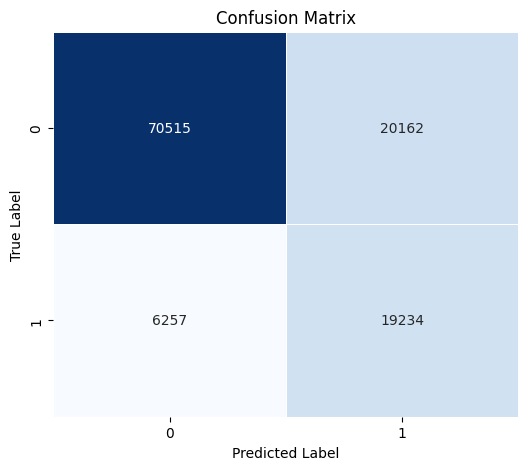

In [ ]:
# Perform cross-validation predictions
y_valid_pred = cross_val_predict(log_reg, X_trian_scaled, y_train, cv=3)

# Compute confusion matrix
cm = confusion_matrix(y_true=y_train, y_pred=y_valid_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", linewidths=0.5, cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
y_train_pred = log_reg.predict(X_trian_scaled)
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")
print(f"Validation Accuracy: {accuracy_score(y_train, y_valid_pred)}")
print(f"Validation Precision Score: {precision_score(y_train, y_valid_pred)}")
print(f"Validation Recall Score: {recall_score(y_train, y_valid_pred)}")
print(f"Validation f1 Score: {f1_score(y_train, y_valid_pred)}")


Train Accuracy: 0.7725621513669857
Validation Accuracy: 0.7724760691412437
Validation Precision Score: 0.4880716714887569
Validation Recall Score: 0.7544231297320623
Validation f1 Score: 0.5926987502504122


# ## Underfitting Solutions:

1) More Complex Model

2) Extract More Features (PolynomialFeatures)

3) descrease constrains

In [44]:
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, RobustScaler, FunctionTransformer, OneHotEncoder, PolynomialFeatures, StandardScaler
from sklearn.impute import SimpleImputer
from category_encoders.binary import BinaryEncoder

# Safe log transformation function
log_transformer = FunctionTransformer(
    lambda x: np.log1p(np.clip(np.nan_to_num(x, nan=0), a_min=1e-6, a_max=None)),
    validate=False
)



# **Pipeline for Binary Encoding**
cat_binary_pipe = Pipeline(steps=[
    ('handle_nans', SimpleImputer(strategy='most_frequent')),
    ('encode', BinaryEncoder(drop_invariant=False)),
])

# **Pipeline for One-Hot Encoding**
boolean_categorical_pipe = Pipeline(steps=[
    ('handle_nans', SimpleImputer(strategy='most_frequent')),
    ('encode', OneHotEncoder(sparse_output=False, handle_unknown='ignore')),
])

# **Pipeline for Log Transformation**
rightskew_pipe = Pipeline(steps=[
    ('handle_nans', SimpleImputer(strategy='median')),
    ('handle_outliers', log_transformer),
    ('poly', PolynomialFeatures(degree=5, include_bias=False)),
    ('scale', RobustScaler())
])

# **Pipeline for Humidity Features**
humidity_pipe = Pipeline(steps=[
    ('handle_nans', SimpleImputer(strategy='median')),
    ('handle_outliers', log_transformer),
    ('poly', PolynomialFeatures(degree=5, include_bias=False)),
    ('scale', RobustScaler(with_centering=False))
])

# **Pipeline for Numerical Imputation & Scaling**
normal_pipe = Pipeline(steps=[
    ('handle_nans', SimpleImputer(strategy='median')),
    ('poly', PolynomialFeatures(degree=5, include_bias=False)),
    ('scale', RobustScaler())
])

# **Ordinal Encoding for Seasons**
season_ordinal_pipe = Pipeline(steps=[
    ('handle_nans', SimpleImputer(strategy='most_frequent')),
    ('ordinal_encode', OrdinalEncoder(categories=[['Summer', 'Autumn', 'Winter', 'Spring']])),
])

# **Pipeline for Polynomial Features (Degree 2)**
poly_pipe = Pipeline(steps=[
    ('handle_nans', SimpleImputer(strategy='mean')),
    ('poly', PolynomialFeatures(degree=5, include_bias=False)),  # Keeping degree moderate to prevent high dimensionality
    ('scale', StandardScaler()),
])

# **Final Column Transformer**
preprocessor = ColumnTransformer(transformers=[
    #('date_features', date_feature_pipe, ['Date']),
    ('cat_binary_pipe', cat_binary_pipe, ['Location', 'WindGustDir','WindDir9am', 'WindDir3pm']),
    ('boolean_categorical_pipe', boolean_categorical_pipe, ['RainToday', 'HeavyRainToday', 'StrongWindGust']),
    ('rightskew_pipe', rightskew_pipe, ["Rainfall", 'WindGustSpeed', 'PrevDayRainfall']),
    ('humidity_pipe', humidity_pipe, ["Humidity9am"]),
    ('normal_pipe', normal_pipe, ['Sunshine', 'Humidity3pm', 'Cloud9am', 'Cloud3pm']),
    ('season_ordinal_pipe', season_ordinal_pipe, ['Season']),
    ('poly_pipe', poly_pipe, ["Rainfall", "WindGustSpeed", "Humidity9am", "Humidity3pm"]),  # Added polynomial features
], remainder='passthrough')
preprocessor
# Transform data



ColumnTransformer(remainder='passthrough',
                  transformers=[('cat_binary_pipe',
                                 Pipeline(steps=[('handle_nans',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encode', BinaryEncoder())]),
                                 ['Location', 'WindGustDir', 'WindDir9am',
                                  'WindDir3pm']),
                                ('boolean_categorical_pipe',
                                 Pipeline(steps=[('handle_nans',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encode',
                                                  OneHotEnco...
                                 Pipeline(steps=[('handle_nans',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinal_encode',
                                                  OrdinalEncoder(categories=[['Summer',
                                                                              'Autumn',
                                                                              'Winter',
                                                                              'Spring']]))]),
                                 ['Season']),
                                ('poly_pipe',
                                 Pipeline(steps=[('handle_nans',
                                                  SimpleImputer()),
                                                 ('poly',
                                                  PolynomialFeatures(degree=5,
                                                                     include_bias=False)),
                                                 ('scale', StandardScaler())]),
                                 ['Rainfall', 'WindGustSpeed', 'Humidity9am',
                                  'Humidity3pm'])])

In [45]:
X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

In [88]:
from sklearn.linear_model import LogisticRegression

# Optimized Logistic Regression Model
log_reg = LogisticRegression(C=0.1,  penalty='l2',  solver='liblinear', random_state=42,  max_iter=500,  tol=1e-7
)
log_reg

LogisticRegression(C=0.1, max_iter=500, random_state=42, solver='liblinear',
                   tol=1e-07)

In [ ]:
log_reg = LogisticRegression(random_state=42, C=1.0, max_iter=2000, warm_start=False, class_weight='balanced')
log_reg.fit(X_train_scaled, y_train)
y_train_pred = log_reg.predict(X_train_scaled) # train
y_valid_pred = cross_val_predict(log_reg, X_train_scaled, y_train, cv=3) # valid
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")
print(f"Validation Accuracy: {accuracy_score(y_train, y_valid_pred)}")

Train Accuracy: 0.5361889677019489
Validation Accuracy: 0.5361889677019489


In [ ]:
## More Complex Model

In [89]:
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, RobustScaler, FunctionTransformer, OneHotEncoder, PolynomialFeatures, StandardScaler
from sklearn.impute import SimpleImputer
from category_encoders.binary import BinaryEncoder

# Safe log transformation function
log_transformer = FunctionTransformer(
    lambda x: np.log1p(np.clip(np.nan_to_num(x, nan=0), a_min=1e-6, a_max=None)),
    validate=False
)



# **Pipeline for Binary Encoding**
cat_binary_pipe = Pipeline(steps=[
    ('handle_nans', SimpleImputer(strategy='most_frequent')),
    ('encode', BinaryEncoder(drop_invariant=False)),
])

# **Pipeline for One-Hot Encoding**
boolean_categorical_pipe = Pipeline(steps=[
    ('handle_nans', SimpleImputer(strategy='most_frequent')),
    ('encode', OneHotEncoder(sparse_output=False, handle_unknown='ignore')),
])

# **Pipeline for Log Transformation**
rightskew_pipe = Pipeline(steps=[
    ('handle_nans', SimpleImputer(strategy='median')),
    ('handle_outliers', log_transformer),
    #('poly', PolynomialFeatures(degree=5, include_bias=False)),
    ('scale', RobustScaler())
])

# **Pipeline for Humidity Features**
humidity_pipe = Pipeline(steps=[
    ('handle_nans', SimpleImputer(strategy='median')),
    ('handle_outliers', log_transformer),
    #('poly', PolynomialFeatures(degree=5, include_bias=False)),
    ('scale', RobustScaler(with_centering=False))
])

# **Pipeline for Numerical Imputation & Scaling**
normal_pipe = Pipeline(steps=[
    ('handle_nans', SimpleImputer(strategy='median')),
    #('poly', PolynomialFeatures(degree=5, include_bias=False)),
    ('scale', RobustScaler())
])

# **Ordinal Encoding for Seasons**
season_ordinal_pipe = Pipeline(steps=[
    ('handle_nans', SimpleImputer(strategy='most_frequent')),
    ('ordinal_encode', OrdinalEncoder(categories=[['Summer', 'Autumn', 'Winter', 'Spring']])),
])

# **Pipeline for Polynomial Features (Degree 2)**
poly_pipe = Pipeline(steps=[
    ('handle_nans', SimpleImputer(strategy='mean')),
    #('poly', PolynomialFeatures(degree=5, include_bias=False)),  # Keeping degree moderate to prevent high dimensionality
    ('scale', StandardScaler()),
])

# **Final Column Transformer**
preprocessor = ColumnTransformer(transformers=[
    #('date_features', date_feature_pipe, ['Date']),
    ('cat_binary_pipe', cat_binary_pipe, ['Location', 'WindGustDir','WindDir9am', 'WindDir3pm']),
    ('boolean_categorical_pipe', boolean_categorical_pipe, ['RainToday', 'HeavyRainToday', 'StrongWindGust']),
    ('rightskew_pipe', rightskew_pipe, ["Rainfall", 'WindGustSpeed', 'PrevDayRainfall']),
    ('humidity_pipe', humidity_pipe, ["Humidity9am"]),
    ('normal_pipe', normal_pipe, ['Sunshine', 'Humidity3pm', 'Cloud9am', 'Cloud3pm']),
    ('season_ordinal_pipe', season_ordinal_pipe, ['Season']),
    #('poly_pipe', poly_pipe, ["Rainfall", "WindGustSpeed", "Humidity9am", "Humidity3pm"]),  # Added polynomial features
], remainder='passthrough')

# Transform data
X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)


In [ ]:
# Initialize the LinearSVC model
linear_svc_clf = LinearSVC(C=1, random_state=42, max_iter=10000, class_weight='balanced', loss='hinge')

linear_svc_clf.fit(X_train_scaled, y_train)

y_train_pred = linear_svc_clf.predict(X_train_scaled)  # train# Predict on training data

y_valid_pred = cross_val_predict(linear_svc_clf, X_train_scaled, y_train, cv=3)  # valid

# Print accuracy scores
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")
print(f"Validation Accuracy: {accuracy_score(y_train, y_valid_pred)}")

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Train Accuracy: 0.7753770401487501
Validation Accuracy: 0.7757385854968666


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
svc_clf = SVC(C=1, kernel='poly', degree=3, coef0=10, random_state=42, class_weight='balanced')
svc_clf.fit(X_train_scaled, y_train)
y_train_pred = svc_clf.predict(X_train_scaled) # train
y_valid_pred = cross_val_predict(svc_clf, X_train_scaled, y_train, cv=3) # valid
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")
print(f"Validation Accuracy: {accuracy_score(y_train, y_valid_pred)}")

## Let’s solve imbalanced[(1) undersampling & (2) oversampling]

# (a) Undersampling

In [90]:
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, RobustScaler, FunctionTransformer, OneHotEncoder, PolynomialFeatures, StandardScaler
from sklearn.impute import SimpleImputer
from category_encoders.binary import BinaryEncoder

# Safe log transformation function
log_transformer = FunctionTransformer(
    lambda x: np.log1p(np.clip(np.nan_to_num(x, nan=0), a_min=1e-6, a_max=None)),
    validate=False
)



# **Pipeline for Binary Encoding**
cat_binary_pipe = Pipeline(steps=[
    ('handle_nans', SimpleImputer(strategy='most_frequent')),
    ('encode', BinaryEncoder(drop_invariant=False)),
])

# **Pipeline for One-Hot Encoding**
boolean_categorical_pipe = Pipeline(steps=[
    ('handle_nans', SimpleImputer(strategy='most_frequent')),
    ('encode', OneHotEncoder(sparse_output=False, handle_unknown='ignore')),
])

# **Pipeline for Log Transformation**
rightskew_pipe = Pipeline(steps=[
    ('handle_nans', SimpleImputer(strategy='median')),
    ('handle_outliers', log_transformer),
    ('poly', PolynomialFeatures(degree=5, include_bias=False)),
    ('scale', RobustScaler())
])

# **Pipeline for Humidity Features**
humidity_pipe = Pipeline(steps=[
    ('handle_nans', SimpleImputer(strategy='median')),
    ('handle_outliers', log_transformer),
    ('poly', PolynomialFeatures(degree=5, include_bias=False)),
    ('scale', RobustScaler(with_centering=False))
])

# **Pipeline for Numerical Imputation & Scaling**
normal_pipe = Pipeline(steps=[
    ('handle_nans', SimpleImputer(strategy='median')),
    ('poly', PolynomialFeatures(degree=5, include_bias=False)),
    ('scale', RobustScaler())
])

# **Ordinal Encoding for Seasons**
season_ordinal_pipe = Pipeline(steps=[
    ('handle_nans', SimpleImputer(strategy='most_frequent')),
    ('ordinal_encode', OrdinalEncoder(categories=[['Summer', 'Autumn', 'Winter', 'Spring']])),
])

# **Pipeline for Polynomial Features (Degree 2)**
poly_pipe = Pipeline(steps=[
    ('handle_nans', SimpleImputer(strategy='mean')),
    ('poly', PolynomialFeatures(degree=5, include_bias=False)),  # Keeping degree moderate to prevent high dimensionality
    ('scale', StandardScaler()),
])

# **Final Column Transformer**
poly_preprocessor  = ColumnTransformer(transformers=[
    #('date_features', date_feature_pipe, ['Date']),
    ('cat_binary_pipe', cat_binary_pipe, ['Location', 'WindGustDir','WindDir9am', 'WindDir3pm']),
    ('boolean_categorical_pipe', boolean_categorical_pipe, ['RainToday', 'HeavyRainToday', 'StrongWindGust']),
    ('rightskew_pipe', rightskew_pipe, ["Rainfall", 'WindGustSpeed', 'PrevDayRainfall']),
    ('humidity_pipe', humidity_pipe, ["Humidity9am"]),
    ('normal_pipe', normal_pipe, ['Sunshine', 'Humidity3pm', 'Cloud9am', 'Cloud3pm']),
    ('season_ordinal_pipe', season_ordinal_pipe, ['Season']),
    ('poly_pipe', poly_pipe, ["Rainfall", "WindGustSpeed", "Humidity9am", "Humidity3pm"]),  # Added polynomial features
], remainder='passthrough')

# Transform data
#X_train_scaled = preprocessor.fit_transform(X_train)
#X_test_scaled = preprocessor.transform(X_test)


In [91]:
from imblearn.pipeline import Pipeline as Imb_Pipeline

undersampling_polyfeats_pipeline = Imb_Pipeline(steps=[
    ('poly_preprocessor', poly_preprocessor),
    ('solve_imbalanced', RandomUnderSampler(random_state=42)),
])

undersampling_polyfeats_pipeline

Pipeline(steps=[('poly_preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_binary_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   BinaryEncoder())]),
                                                  ['Location', 'WindGustDir',
                                                   'WindDir9am',
                                                   'WindDir3pm']),
                                                 ('boolean_categorical_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='...
                                                                  ('ordinal_encode',
                                                                   OrdinalEncoder(categories=[['Summer',
                                                                                               'Autumn',
                                                                                               'Winter',
                                                                                               'Spring']]))]),
                                                  ['Season']),
                                                 ('poly_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer()),
                                                                  ('poly',
                                                                   PolynomialFeatures(degree=5,
                                                                                      include_bias=False)),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['Rainfall', 'WindGustSpeed',
                                                   'Humidity9am',
                                                   'Humidity3pm'])])),
                ('solve_imbalanced', RandomUnderSampler(random_state=42))])

In [ ]:
# import numpy as np
# import pandas as pd
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import OrdinalEncoder, RobustScaler, FunctionTransformer, OneHotEncoder, PolynomialFeatures, StandardScaler
# from sklearn.impute import SimpleImputer
# from category_encoders.binary import BinaryEncoder

# # Safe log transformation function
# log_transformer = FunctionTransformer(
#     lambda x: np.log1p(np.clip(np.nan_to_num(x, nan=0), a_min=1e-6, a_max=None)),
#     validate=False
# )



# # **Pipeline for Binary Encoding**
# cat_binary_pipe = Pipeline(steps=[
#     ('handle_nans', SimpleImputer(strategy='most_frequent')),
#     ('encode', BinaryEncoder(drop_invariant=False)),
# ])

# # **Pipeline for One-Hot Encoding**
# boolean_categorical_pipe = Pipeline(steps=[
#     ('handle_nans', SimpleImputer(strategy='most_frequent')),
#     ('encode', OneHotEncoder(sparse_output=False, handle_unknown='ignore')),
# ])

# # **Pipeline for Log Transformation**
# rightskew_pipe = Pipeline(steps=[
#     ('handle_nans', SimpleImputer(strategy='median')),
#     ('handle_outliers', log_transformer),
#     #('poly', PolynomialFeatures(degree=5, include_bias=False)),
#     ('scale', RobustScaler())
# ])

# # **Pipeline for Humidity Features**
# humidity_pipe = Pipeline(steps=[
#     ('handle_nans', SimpleImputer(strategy='median')),
#     ('handle_outliers', log_transformer),
#     #('poly', PolynomialFeatures(degree=5, include_bias=False)),
#     ('scale', RobustScaler(with_centering=False))
# ])

# # **Pipeline for Numerical Imputation & Scaling**
# normal_pipe = Pipeline(steps=[
#     ('handle_nans', SimpleImputer(strategy='median')),
#     #('poly', PolynomialFeatures(degree=5, include_bias=False)),
#     ('scale', RobustScaler())
# ])

# # **Ordinal Encoding for Seasons**
# season_ordinal_pipe = Pipeline(steps=[
#     ('handle_nans', SimpleImputer(strategy='most_frequent')),
#     ('ordinal_encode', OrdinalEncoder(categories=[['Summer', 'Autumn', 'Winter', 'Spring']])),
# ])

# # **Pipeline for Polynomial Features (Degree 2)**
# poly_pipe = Pipeline(steps=[
#     ('handle_nans', SimpleImputer(strategy='mean')),
#     #('poly', PolynomialFeatures(degree=5, include_bias=False)),  # Keeping degree moderate to prevent high dimensionality
#     ('scale', StandardScaler()),
# ])

# # **Final Column Transformer**
# preprocessor = ColumnTransformer(transformers=[
#     #('date_features', date_feature_pipe, ['Date']),
#     ('cat_binary_pipe', cat_binary_pipe, ['Location', 'WindGustDir','WindDir9am', 'WindDir3pm']),
#     ('boolean_categorical_pipe', boolean_categorical_pipe, ['RainToday', 'HeavyRainToday', 'StrongWindGust']),
#     ('rightskew_pipe', rightskew_pipe, ["Rainfall", 'WindGustSpeed', 'PrevDayRainfall']),
#     ('humidity_pipe', humidity_pipe, ["Humidity9am"]),
#     ('normal_pipe', normal_pipe, ['Sunshine', 'Humidity3pm', 'Cloud9am', 'Cloud3pm']),
#     ('season_ordinal_pipe', season_ordinal_pipe, ['Season']),
#     #('poly_pipe', poly_pipe, ["Rainfall", "WindGustSpeed", "Humidity9am", "Humidity3pm"]),  # Added polynomial features
# ], remainder='passthrough')

# # Transform data
# #X_train_scaled = preprocessor.fit_transform(X_train)
# #X_test_scaled = preprocessor.transform(X_test)

In [92]:

import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, RobustScaler, FunctionTransformer, OneHotEncoder, PolynomialFeatures, StandardScaler
from sklearn.impute import SimpleImputer
from category_encoders.binary import BinaryEncoder

# Safe log transformation function
log_transformer = FunctionTransformer(
    lambda x: np.log1p(np.clip(np.nan_to_num(x, nan=0), a_min=1e-6, a_max=None)),
    validate=False
)



# **Pipeline for Binary Encoding**
cat_binary_pipe = Pipeline(steps=[
    ('handle_nans', SimpleImputer(strategy='most_frequent')),
    ('encode', BinaryEncoder(drop_invariant=False)),
])

# **Pipeline for One-Hot Encoding**
boolean_categorical_pipe = Pipeline(steps=[
    ('handle_nans', SimpleImputer(strategy='most_frequent')),
    ('encode', OneHotEncoder(sparse_output=False, handle_unknown='ignore')),
])

# **Pipeline for Log Transformation**
rightskew_pipe = Pipeline(steps=[
    ('handle_nans', SimpleImputer(strategy='median')),
    ('handle_outliers', log_transformer),
    #('poly', PolynomialFeatures(degree=5, include_bias=False)),
    ('scale', RobustScaler())
])

# **Pipeline for Humidity Features**
humidity_pipe = Pipeline(steps=[
    ('handle_nans', SimpleImputer(strategy='median')),
    ('handle_outliers', log_transformer),
    #('poly', PolynomialFeatures(degree=5, include_bias=False)),
    ('scale', RobustScaler(with_centering=False))
])

# **Pipeline for Numerical Imputation & Scaling**
normal_pipe = Pipeline(steps=[
    ('handle_nans', SimpleImputer(strategy='median')),
    #('poly', PolynomialFeatures(degree=5, include_bias=False)),
    ('scale', RobustScaler())
])

# **Ordinal Encoding for Seasons**
season_ordinal_pipe = Pipeline(steps=[
    ('handle_nans', SimpleImputer(strategy='most_frequent')),
    ('ordinal_encode', OrdinalEncoder(categories=[['Summer', 'Autumn', 'Winter', 'Spring']])),
])

# **Pipeline for Polynomial Features (Degree 2)**
poly_pipe = Pipeline(steps=[
    ('handle_nans', SimpleImputer(strategy='mean')),
    #('poly', PolynomialFeatures(degree=5, include_bias=False)),  # Keeping degree moderate to prevent high dimensionality
    ('scale', StandardScaler()),
])

# **Final Column Transformer**
preprocessor = ColumnTransformer(transformers=[
    #('date_features', date_feature_pipe, ['Date']),
    ('cat_binary_pipe', cat_binary_pipe, ['Location', 'WindGustDir','WindDir9am', 'WindDir3pm']),
    ('boolean_categorical_pipe', boolean_categorical_pipe, ['RainToday', 'HeavyRainToday', 'StrongWindGust']),
    ('rightskew_pipe', rightskew_pipe, ["Rainfall", 'WindGustSpeed', 'PrevDayRainfall']),
    ('humidity_pipe', humidity_pipe, ["Humidity9am"]),
    ('normal_pipe', normal_pipe, ['Sunshine', 'Humidity3pm', 'Cloud9am', 'Cloud3pm']),
    ('season_ordinal_pipe', season_ordinal_pipe, ['Season']),
    #('poly_pipe', poly_pipe, ["Rainfall", "WindGustSpeed", "Humidity9am", "Humidity3pm"]),  # Added polynomial features
], remainder='passthrough')


from imblearn.pipeline import Pipeline as Imb_Pipeline

undersampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', RandomUnderSampler(random_state=42)),
])

undersampling_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_binary_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   BinaryEncoder())]),
                                                  ['Location', 'WindGustDir',
                                                   'WindDir9am',
                                                   'WindDir3pm']),
                                                 ('boolean_categorical_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='most_...
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   RobustScaler())]),
                                                  ['Sunshine', 'Humidity3pm',
                                                   'Cloud9am', 'Cloud3pm']),
                                                 ('season_ordinal_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal_encode',
                                                                   OrdinalEncoder(categories=[['Summer',
                                                                                               'Autumn',
                                                                                               'Winter',
                                                                                               'Spring']]))]),
                                                  ['Season'])])),
                ('solve_imbalanced', RandomUnderSampler(random_state=42))])

## (2) Underfitting vs Overfitting
We now know dataset in not linear
(so let's try [KNN - GaussianNB - SVC - DT - Ensamble])

In [ ]:
# Logestic Regression
from sklearn.model_selection import KFold

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []

undersampling_pipeline = Imb_Pipeline(steps=[
    ('poly_preprocessor', poly_preprocessor),
    ('solve_imbalanced', RandomUnderSampler(random_state=42)),
    ("model", LogisticRegression(C=1.0, max_iter=1000, random_state=42))
    ])
undersampling_pipeline.fit(X_train, y_train)
y_train_pred = undersampling_pipeline.predict(X_train)
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")

skfolds = StratifiedKFold(n_splits=5)
i = 1
for train_indx, valid_indx in skfolds.split(X_train, y_train): # 5 Model
    print(f"At fold {i}")
    # print(y_train.iloc[train_indx].value_counts(normalize=True))
    # print(y_train.iloc[valid_indx].value_counts(normalize=True))
    # print()

    undersampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', RandomUnderSampler(random_state=42)),
    ("model", LogisticRegression(C=1.0, max_iter=500, random_state=42))
    ])

    undersampling_pipeline.fit(X_train.iloc[train_indx], y_train.iloc[train_indx])
    y_valid_pred = undersampling_pipeline.predict(X_train.iloc[valid_indx])

    valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train.iloc[valid_indx], y_valid_pred))

    i += 1

print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall

Train Accuracy: 0.5468373390262379
At fold 1
At fold 2
At fold 3
At fold 4
At fold 5
Average Valid Accuracy: 0.7716840578014279
Average Valid F1 Score: 0.5922399712469499
Average Valid Precsion: 0.4869873838116005
Average Valid Recall: 0.7555605907696114


In [ ]:
# KNN

from sklearn.model_selection import KFold

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []

undersampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', RandomUnderSampler(random_state=42)),
    ("model", KNeighborsClassifier(n_neighbors=77, leaf_size=50))
    ])
undersampling_pipeline.fit(X_train, y_train)
y_train_pred = undersampling_pipeline.predict(X_train)
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")

skfolds = StratifiedKFold(n_splits=5)
i = 1
for train_indx, valid_indx in skfolds.split(X_train, y_train): # 5 Model
    print(f"At fold {i}")
    # print(y_train.iloc[train_indx].value_counts(normalize=True))
    # print(y_train.iloc[valid_indx].value_counts(normalize=True))
    # print()

    undersampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', RandomUnderSampler(random_state=42)),
    ("model", KNeighborsClassifier(n_neighbors=77, leaf_size=50))
    ])

    undersampling_pipeline.fit(X_train.iloc[train_indx], y_train.iloc[train_indx])
    y_valid_pred = undersampling_pipeline.predict(X_train.iloc[valid_indx])

    valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train.iloc[valid_indx], y_valid_pred))

    i += 1

print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1
print(f"Average Valid Precision: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall

Train Accuracy: 0.7598994559603333
At fold 1
At fold 2
At fold 3
At fold 4
At fold 5
Average Valid Accuracy: 0.7544417739723303
Average Valid F1 Score: 0.5749925516777254
Average Valid Precsion: 0.4635658225451924
Average Valid Recall: 0.7569726554280176


In [ ]:
# # GaussianNB



# from sklearn.model_selection import KFold

# valid_accuracy_score = []
# valid_f1_score = []
# valid_precision_score = []
# valid_recall_score = []

# undersampling_pipeline = Imb_Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('solve_imbalanced', RandomUnderSampler(random_state=42)),
#     ("model", GaussianNB())
#     ])
# undersampling_pipeline.fit(X_train, y_train)
# y_train_pred = undersampling_pipeline.predict(X_train)
# print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")

# skfolds = StratifiedKFold(n_splits=5)
# i = 1
# for train_indx, valid_indx in skfolds.split(X_train, y_train): # 5 Model
#     print(f"At fold {i}")
#     # print(y_train.iloc[train_indx].value_counts(normalize=True))
#     # print(y_train.iloc[valid_indx].value_counts(normalize=True))
#     # print()

#     undersampling_pipeline = Imb_Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('solve_imbalanced', RandomUnderSampler(random_state=42)),
#     ("model", GaussianNB())
#     ])

#     undersampling_pipeline.fit(X_train.iloc[train_indx], y_train.iloc[train_indx])
#     y_valid_pred = undersampling_pipeline.predict(X_train.iloc[valid_indx])

#     valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_indx], y_valid_pred))
#     valid_f1_score.append(f1_score(y_train.iloc[valid_indx], y_valid_pred))
#     valid_precision_score.append(precision_score(y_train.iloc[valid_indx], y_valid_pred))
#     valid_recall_score.append(recall_score(y_train.iloc[valid_indx], y_valid_pred))

#     i += 1

# print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
# print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1
# print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
# print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall

Train Accuracy: 0.7753598237036017
At fold 1
At fold 2
At fold 3
At fold 4
At fold 5
Average Valid Accuracy: 0.7745678523802204
Average Valid F1 Score: 0.5363503874094483
Average Valid Precsion: 0.4887522762702538
Average Valid Recall: 0.5942489896595082


In [ ]:
# SVC



from sklearn.model_selection import KFold

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []

undersampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', RandomUnderSampler(random_state=42)),
    ("model", SVC(C=1.0, kernel='poly', degree=4, coef0=10, random_state=42))
    ])
undersampling_pipeline.fit(X_train, y_train)
y_train_pred = undersampling_pipeline.predict(X_train)
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")

skfolds = StratifiedKFold(n_splits=5)
i = 1
for train_indx, valid_indx in skfolds.split(X_train, y_train): # 5 Model
    print(f"At fold {i}")
    # print(y_train.iloc[train_indx].value_counts(normalize=True))
    # print(y_train.iloc[valid_indx].value_counts(normalize=True))
    # print()

    undersampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', RandomUnderSampler(random_state=42)),
    ("model", SVC(C=1.0, kernel='poly', degree=4, coef0=10, random_state=42))
    ])

    undersampling_pipeline.fit(X_train.iloc[train_indx], y_train.iloc[train_indx])
    y_valid_pred = undersampling_pipeline.predict(X_train.iloc[valid_indx])

    valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train.iloc[valid_indx], y_valid_pred))

    i += 1

print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall

Train Accuracy: 0.7952878589628813
At fold 1
At fold 2
At fold 3
At fold 4
At fold 5
Average Valid Accuracy: 0.7901744820328466
Average Valid F1 Score: 0.6135755049673436
Average Valid Precsion: 0.5149237167106631
Average Valid Recall: 0.7590518560282014


In [ ]:
# DT

from sklearn.model_selection import KFold

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []

undersampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', RandomUnderSampler(random_state=42)),
    ("model", DecisionTreeClassifier(max_depth=5, random_state=42, min_samples_split=20, min_samples_leaf=10))
    ])
undersampling_pipeline.fit(X_train, y_train)
y_train_pred = undersampling_pipeline.predict(X_train)
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")

skfolds = StratifiedKFold(n_splits=5)
i = 1
for train_indx, valid_indx in skfolds.split(X_train, y_train): # 5 Model
    print(f"At fold {i}")
    # print(y_train.iloc[train_indx].value_counts(normalize=True))
    # print(y_train.iloc[valid_indx].value_counts(normalize=True))
    # print()

    undersampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', RandomUnderSampler(random_state=42)),
    ("model", DecisionTreeClassifier(max_depth=5, random_state=42, min_samples_split=20, min_samples_leaf=10))
    ])

    undersampling_pipeline.fit(X_train.iloc[train_indx], y_train.iloc[train_indx])
    y_valid_pred = undersampling_pipeline.predict(X_train.iloc[valid_indx])

    valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train.iloc[valid_indx], y_valid_pred))

    i += 1

print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall

Train Accuracy: 0.7733196749535156
At fold 1
At fold 2
At fold 3
At fold 4
At fold 5
Average Valid Accuracy: 0.7718477042127074
Average Valid F1 Score: 0.5788358936798556
Average Valid Precsion: 0.48760218674787126
Average Valid Recall: 0.7136232913922229


## (3) GridSearchCV

### undersambleing

In [ ]:
print(undersampling_pipeline.get_params().keys())


dict_keys(['memory', 'steps', 'transform_input', 'verbose', 'preprocessor', 'solve_imbalanced', 'preprocessor__force_int_remainder_cols', 'preprocessor__n_jobs', 'preprocessor__remainder', 'preprocessor__sparse_threshold', 'preprocessor__transformer_weights', 'preprocessor__transformers', 'preprocessor__verbose', 'preprocessor__verbose_feature_names_out', 'preprocessor__cat_binary_pipe', 'preprocessor__boolean_categorical_pipe', 'preprocessor__rightskew_pipe', 'preprocessor__humidity_pipe', 'preprocessor__normal_pipe', 'preprocessor__season_ordinal_pipe', 'preprocessor__cat_binary_pipe__memory', 'preprocessor__cat_binary_pipe__steps', 'preprocessor__cat_binary_pipe__transform_input', 'preprocessor__cat_binary_pipe__verbose', 'preprocessor__cat_binary_pipe__handle_nans', 'preprocessor__cat_binary_pipe__encode', 'preprocessor__cat_binary_pipe__handle_nans__add_indicator', 'preprocessor__cat_binary_pipe__handle_nans__copy', 'preprocessor__cat_binary_pipe__handle_nans__fill_value', 'prepro

In [ ]:
# Logestic Regression
from sklearn.model_selection import KFold
params_grid = {
    'model__penalty': ['l2'],
    'model__C': [0.1, 50],  # Continuous range instead of fixed values
    'poly_preprocessor__normal_pipe__poly__degree': [3, 5],  # Reduced values
    'poly_preprocessor__rightskew_pipe__poly__degree': [3, 5],
    'poly_preprocessor__poly_pipe__poly__degree': [3, 5],
}

# params_grid = {
  #  'model__penalty': ['l2'],
   # 'model__C': [0.1, 1, 3, 5, 50],
   # 'poly_preprocessor__normal_pipe__poly__degree': [3, 5, 10],
    #'poly_preprocessor__rightskew_pipe__poly__degree': [3, 5, 10],  # Corrected
    #'poly_preprocessor__poly_pipe__poly__degree': [3, 5, 10],
#}


undersampling_pipeline = Imb_Pipeline(steps=[
    ('poly_preprocessor', poly_preprocessor),
    ('solve_imbalanced', RandomUnderSampler(random_state=42)),
    ("model", LogisticRegression(C=1.0, max_iter=1000, random_state=42)) # 135 Model
    ])

logestic_grid = GridSearchCV(undersampling_pipeline, params_grid, cv=3, n_jobs=-1, scoring='f1') # 405 Model

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []

skfolds = StratifiedKFold(n_splits=5)
i = 1
for train_indx, valid_indx in skfolds.split(X_train, y_train): # 2025 Model
    print(f"At fold {i}")
    # print(y_train.iloc[train_indx].value_counts(normalize=True))
    # print(y_train.iloc[valid_indx].value_counts(normalize=True))
    # print()

    logestic_grid.fit(X_train.iloc[train_indx], y_train.iloc[train_indx]) # 405 Model
    best_logestic_model = logestic_grid.best_estimator_
    y_valid_pred = logestic_grid.predict(X_train.iloc[valid_indx])

    valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train.iloc[valid_indx], y_valid_pred))

    i += 1



print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall

At fold 1


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


At fold 2


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


At fold 3


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


At fold 4


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


At fold 5


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Average Valid Accuracy: 0.779930654185753
Average Valid F1 Score: 0.5878670783064612
Average Valid Precsion: 0.49935866927608386
Average Valid Recall: 0.714918693816917


In [ ]:
%pip install imblearn

In [ ]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from imblearn.pipeline import Pipeline as Imb_Pipeline
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import numpy as np

# Define parameters for GridSearchCV
params_grid = {
    'model__penalty': ['l2'],
    'model__C': [0.1, 1, 3, 5, 50],
    'poly_preprocessor__normal_pipe__poly__degree': [3, 5, 10],
    'poly_preprocessor__rightskew_pipe__poly__degree': [3, 5, 10],
    'poly_preprocessor__poly_pipe__poly__degree': [3, 5, 10],
}

# Create undersampling pipeline
undersampling_pipeline = Imb_Pipeline(steps=[
    ('poly_preprocessor', poly_preprocessor),
    ('solve_imbalanced', RandomUnderSampler(random_state=42)),
    ('model', LogisticRegression(max_iter=1000, random_state=42))
])

# Use Stratified K-Folds
skfolds = StratifiedKFold(n_splits=5)

# Run GridSearchCV once with cross-validation
logestic_grid = GridSearchCV(
    undersampling_pipeline, params_grid, cv=skfolds, n_jobs=-1, scoring='f1'
)

# Fit the model only once across all folds
logestic_grid.fit(X_train, y_train)

# Get best model and predictions
best_logestic_model = logestic_grid.best_estimator_
y_valid_pred = logestic_grid.predict(X_train)

# Compute metrics
valid_accuracy_score = accuracy_score(y_train, y_valid_pred)
valid_f1_score = f1_score(y_train, y_valid_pred)
valid_precision_score = precision_score(y_train, y_valid_pred)
valid_recall_score = recall_score(y_train, y_valid_pred)

# Print results
print(f"Valid Accuracy: {valid_accuracy_score:.4f}")
print(f"Valid F1 Score: {valid_f1_score:.4f}")
print(f"Valid Precision: {valid_precision_score:.4f}")
print(f"Valid Recall: {valid_recall_score:.4f}")


In [ ]:
best_logestic_model

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('poly_preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_binary_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   BinaryEncoder())]),
                                                  ['Location', 'WindGustDir',
                                                   'WindDir9am',
                                                   'WindDir3pm']),
                                                 ('boolean_categorical_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='...
                                                                                               'Spring']]))]),
                                                  ['Season']),
                                                 ('poly_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer()),
                                                                  ('poly',
                                                                   PolynomialFeatures(degree=5,
                                                                                      include_bias=False)),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['Rainfall', 'WindGustSpeed',
                                                   'Humidity9am',
                                                   'Humidity3pm'])])),
                ('solve_imbalanced', RandomUnderSampler(random_state=42)),
                ('model',
                 LogisticRegression(C=0.1, max_iter=1000, random_state=42))])

In [ ]:
logestic_grid.best_params_


{'model__C': 0.1,
 'model__penalty': 'l2',
 'poly_preprocessor__normal_pipe__poly__degree': 3,
 'poly_preprocessor__poly_pipe__poly__degree': 5,
 'poly_preprocessor__rightskew_pipe__poly__degree': 3}

In [ ]:
logestic_grid


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('poly_preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('cat_binary_pipe',
                                                                         Pipeline(steps=[('handle_nans',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('encode',
                                                                                          BinaryEncoder())]),
                                                                         ['Location',
                                                                          'WindGustDir',
                                                                          'WindDir9am',
                                                                          'WindDir3pm']),
                                                                        ('boolean_categorical_pipe',
                                                                         Pipeline(steps=[('handle_na...
                                       ('solve_imbalanced',
                                        RandomUnderSampler(random_state=42)),
                                       ('model',
                                        LogisticRegression(max_iter=1000,
                                                           random_state=42))]),
             n_jobs=-1,
             param_grid={'model__C': [0.1, 50], 'model__penalty': ['l2'],
                         'poly_preprocessor__normal_pipe__poly__degree': [3, 5],
                         'poly_preprocessor__poly_pipe__poly__degree': [3, 5],
                         'poly_preprocessor__rightskew_pipe__poly__degree': [3,
                                                                             5]},
             scoring='f1')

In [ ]:
best_logestic_model.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppr

Pipeline(steps=[('poly_preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_binary_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   BinaryEncoder())]),
                                                  ['Location', 'WindGustDir',
                                                   'WindDir9am',
                                                   'WindDir3pm']),
                                                 ('boolean_categorical_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='...
                                                                                               'Spring']]))]),
                                                  ['Season']),
                                                 ('poly_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer()),
                                                                  ('poly',
                                                                   PolynomialFeatures(degree=5,
                                                                                      include_bias=False)),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['Rainfall', 'WindGustSpeed',
                                                   'Humidity9am',
                                                   'Humidity3pm'])])),
                ('solve_imbalanced', RandomUnderSampler(random_state=42)),
                ('model',
                 LogisticRegression(C=0.1, max_iter=1000, random_state=42))])

In [ ]:
# KNN

from sklearn.model_selection import KFold
params_grid = {'model__n_neighbors': [21, 31, 51, 71, 101],
               'model__leaf_size':[30, 40, 50, 60, 80, 100],
               }



undersampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', RandomUnderSampler(random_state=42)),
    ("model", KNeighborsClassifier(n_neighbors=77, leaf_size=50)) # 135 Model
    ])

knn_grid = GridSearchCV(undersampling_pipeline, params_grid, cv=3, n_jobs=-1, scoring='f1') # 405 Model

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []

skfolds = StratifiedKFold(n_splits=5)
i = 1
for train_indx, valid_indx in skfolds.split(X_train, y_train):
    print(f"At fold {i}")

    knn_grid.fit(X_train.iloc[train_indx], y_train.iloc[train_indx])
    best_knn_model = knn_grid.best_estimator_
    y_valid_pred = knn_grid.predict(X_train.iloc[valid_indx])

    valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train.iloc[valid_indx], y_valid_pred))

    i += 1



print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall

At fold 1
At fold 2
At fold 3
At fold 4
At fold 5
Average Valid Accuracy: 0.756929531549541
Average Valid F1 Score: 0.5770991449431293
Average Valid Precsion: 0.4667792336466525
Average Valid Recall: 0.7557566307165204


In [ ]:
best_knn_model

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_binary_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   BinaryEncoder())]),
                                                  ['Location', 'WindGustDir',
                                                   'WindDir9am',
                                                   'WindDir3pm']),
                                                 ('boolean_categorical_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='most_...
                                                  ['Sunshine', 'Humidity3pm',
                                                   'Cloud9am', 'Cloud3pm']),
                                                 ('season_ordinal_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal_encode',
                                                                   OrdinalEncoder(categories=[['Summer',
                                                                                               'Autumn',
                                                                                               'Winter',
                                                                                               'Spring']]))]),
                                                  ['Season'])])),
                ('solve_imbalanced', RandomUnderSampler(random_state=42)),
                ('model', KNeighborsClassifier(n_neighbors=31))])

In [ ]:
knn_grid.best_params_


{'model__leaf_size': 30, 'model__n_neighbors': 31}

In [ ]:
knn_grid


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('cat_binary_pipe',
                                                                         Pipeline(steps=[('handle_nans',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('encode',
                                                                                          BinaryEncoder())]),
                                                                         ['Location',
                                                                          'WindGustDir',
                                                                          'WindDir9am',
                                                                          'WindDir3pm']),
                                                                        ('boolean_categorical_pipe',
                                                                         Pipeline(steps=[('handle_nans',
                                                                                          S...
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ordinal_encode',
                                                                                          OrdinalEncoder(categories=[['Summer',
                                                                                                                      'Autumn',
                                                                                                                      'Winter',
                                                                                                                      'Spring']]))]),
                                                                         ['Season'])])),
                                       ('solve_imbalanced',
                                        RandomUnderSampler(random_state=42)),
                                       ('model',
                                        KNeighborsClassifier(leaf_size=50,
                                                             n_neighbors=77))]),
             n_jobs=-1,
             param_grid={'model__leaf_size': [30, 40, 50, 60, 80, 100],
                         'model__n_neighbors': [21, 31, 51, 71, 101]},
             scoring='f1')

In [ ]:
best_knn_model.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_binary_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   BinaryEncoder())]),
                                                  ['Location', 'WindGustDir',
                                                   'WindDir9am',
                                                   'WindDir3pm']),
                                                 ('boolean_categorical_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='most_...
                                                  ['Sunshine', 'Humidity3pm',
                                                   'Cloud9am', 'Cloud3pm']),
                                                 ('season_ordinal_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal_encode',
                                                                   OrdinalEncoder(categories=[['Summer',
                                                                                               'Autumn',
                                                                                               'Winter',
                                                                                               'Spring']]))]),
                                                  ['Season'])])),
                ('solve_imbalanced', RandomUnderSampler(random_state=42)),
                ('model', KNeighborsClassifier(n_neighbors=31))])

In [ ]:
# SVC

from sklearn.model_selection import KFold
params_grid = [{'model__C': [1,50],
               'model__kernel':['poly'],
               'model__degree':[2, 3, 4, 5, 7],
               'model__coef0':[5, 10],
               },
               {'model__C': [1,50],
               'model__kernel':['rbf'],
               'model__gamma':['scale', 0.1, 0.5, 0.8, 1],
               }
              ]

# params_grid = {'model__C': [1.0, 20, 50],
#                'model__kernel':['poly'],
#                'model__degree':[2, 3, 4],
#                'model__coef0':[5, 10],
#                }

undersampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', RandomUnderSampler(random_state=42)),
    ("model", SVC(C=1.0, kernel='poly', degree=4, coef0=10, random_state=42)) # 33 Model
    ])

svm_clf_grid = HalvingGridSearchCV(undersampling_pipeline, params_grid, cv=3, n_jobs=-1, random_state=42, scoring='f1') # 30 Model

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []

skfolds = StratifiedKFold(n_splits=5)
i = 1
for train_indx, valid_indx in skfolds.split(X_train, y_train): # 150 Model
    print(f"At fold {i}")
    # print(y_train.iloc[train_indx].value_counts(normalize=True))
    # print(y_train.iloc[valid_indx].value_counts(normalize=True))
    # print()

    svm_clf_grid.fit(X_train.iloc[train_indx], y_train.iloc[train_indx]) # 30 Model
    best_svm_clf_model = svm_clf_grid.best_estimator_
    y_valid_pred = svm_clf_grid.predict(X_train.iloc[valid_indx])

    valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train.iloc[valid_indx], y_valid_pred))

    i += 1
print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}")  B# Valid accuracy
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall

At fold 1
At fold 2
At fold 3
At fold 4
At fold 5
Average Valid Accuracy: 0.7874112497732058
Average Valid F1 Score: 0.6110902040603158
Average Valid Precsion: 0.5105323968367947
Average Valid Recall: 0.7610132787827305


In [ ]:
best_svm_clf_model

/root/venv/lib/python3.11/site-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_binary_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   BinaryEncoder())]),
                                                  ['Location', 'WindGustDir',
                                                   'WindDir9am',
                                                   'WindDir3pm']),
                                                 ('boolean_categorical_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='most_...
                                                  ['Sunshine', 'Humidity3pm',
                                                   'Cloud9am', 'Cloud3pm']),
                                                 ('season_ordinal_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal_encode',
                                                                   OrdinalEncoder(categories=[['Summer',
                                                                                               'Autumn',
                                                                                               'Winter',
                                                                                               'Spring']]))]),
                                                  ['Season'])])),
                ('solve_imbalanced', RandomUnderSampler(random_state=42)),
                ('model',
                 SVC(C=50, coef0=5, degree=2, kernel='poly', random_state=42))])

In [ ]:
svm_clf_grid.best_params_


{'model__C': 50,
 'model__coef0': 5,
 'model__degree': 2,
 'model__kernel': 'poly'}

In [ ]:
best_svm_clf_model.fit(X_train, y_train)


/root/venv/lib/python3.11/site-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_binary_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   BinaryEncoder())]),
                                                  ['Location', 'WindGustDir',
                                                   'WindDir9am',
                                                   'WindDir3pm']),
                                                 ('boolean_categorical_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='most_...
                                                  ['Sunshine', 'Humidity3pm',
                                                   'Cloud9am', 'Cloud3pm']),
                                                 ('season_ordinal_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal_encode',
                                                                   OrdinalEncoder(categories=[['Summer',
                                                                                               'Autumn',
                                                                                               'Winter',
                                                                                               'Spring']]))]),
                                                  ['Season'])])),
                ('solve_imbalanced', RandomUnderSampler(random_state=42)),
                ('model',
                 SVC(C=50, coef0=5, degree=2, kernel='poly', random_state=42))])

In [ ]:
# DT

from sklearn.model_selection import KFold
params_grid = {'model__max_depth': [3, 5, 7, 10, 20],
               'model__max_leaf_nodes':[5, 10, 20],
               'model__min_samples_split':[20, 25, 30],
               'model__min_samples_leaf':[10, 20, 30],
               }



undersampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', RandomUnderSampler(random_state=42)),
    ("model", DecisionTreeClassifier(max_depth=5, max_leaf_nodes=5, random_state=42, min_samples_split=20, min_samples_leaf=10)) # 135 Model
    ])

dt_clf_grid = GridSearchCV(undersampling_pipeline, params_grid, cv=3, n_jobs=-1, scoring='f1') # 405 Model

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []

skfolds = StratifiedKFold(n_splits=5)
i = 1
for train_indx, valid_indx in skfolds.split(X_train, y_train): # 2025 Model
    print(f"At fold {i}")
    # print(y_train.iloc[train_indx].value_counts(normalize=True))
    # print(y_train.iloc[valid_indx].value_counts(normalize=True))
    # print()

    dt_clf_grid.fit(X_train.iloc[train_indx], y_train.iloc[train_indx]) # 405 Model
    best_dt_clf_model = dt_clf_grid.best_estimator_
    y_valid_pred = dt_clf_grid.predict(X_train.iloc[valid_indx])

    valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train.iloc[valid_indx], y_valid_pred))

    i += 1
print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall

At fold 1
At fold 2
At fold 3
At fold 4
At fold 5
Average Valid Accuracy: 0.7696611647697218
Average Valid F1 Score: 0.5779580665261159
Average Valid Precsion: 0.4847518319229868
Average Valid Recall: 0.7175856295640549


In [ ]:
best_dt_clf_model

/root/venv/lib/python3.11/site-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_binary_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   BinaryEncoder())]),
                                                  ['Location', 'WindGustDir',
                                                   'WindDir9am',
                                                   'WindDir3pm']),
                                                 ('boolean_categorical_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='most_...
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal_encode',
                                                                   OrdinalEncoder(categories=[['Summer',
                                                                                               'Autumn',
                                                                                               'Winter',
                                                                                               'Spring']]))]),
                                                  ['Season'])])),
                ('solve_imbalanced', RandomUnderSampler(random_state=42)),
                ('model',
                 DecisionTreeClassifier(max_depth=5, max_leaf_nodes=20,
                                        min_samples_leaf=10,
                                        min_samples_split=20,
                                        random_state=42))])

In [ ]:
dt_clf_grid.best_params_


{'model__max_depth': 5,
 'model__max_leaf_nodes': 20,
 'model__min_samples_leaf': 10,
 'model__min_samples_split': 20}

In [ ]:
best_dt_clf_model.fit(X_train, y_train)


/root/venv/lib/python3.11/site-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_binary_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   BinaryEncoder())]),
                                                  ['Location', 'WindGustDir',
                                                   'WindDir9am',
                                                   'WindDir3pm']),
                                                 ('boolean_categorical_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='most_...
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal_encode',
                                                                   OrdinalEncoder(categories=[['Summer',
                                                                                               'Autumn',
                                                                                               'Winter',
                                                                                               'Spring']]))]),
                                                  ['Season'])])),
                ('solve_imbalanced', RandomUnderSampler(random_state=42)),
                ('model',
                 DecisionTreeClassifier(max_depth=5, max_leaf_nodes=20,
                                        min_samples_leaf=10,
                                        min_samples_split=20,
                                        random_state=42))])

## (b) **Oversampling**

In [40]:
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, RobustScaler, FunctionTransformer, OneHotEncoder, PolynomialFeatures, StandardScaler
from sklearn.impute import SimpleImputer
from category_encoders.binary import BinaryEncoder

# Safe log transformation function
log_transformer = FunctionTransformer(
    lambda x: np.log1p(np.clip(np.nan_to_num(x, nan=0), a_min=1e-6, a_max=None)),
    validate=False
)



# **Pipeline for Binary Encoding**
cat_binary_pipe = Pipeline(steps=[
    ('handle_nans', SimpleImputer(strategy='most_frequent')),
    ('encode', BinaryEncoder(drop_invariant=False)),
])

# **Pipeline for One-Hot Encoding**
boolean_categorical_pipe = Pipeline(steps=[
    ('handle_nans', SimpleImputer(strategy='most_frequent')),
    ('encode', OneHotEncoder(sparse_output=False, handle_unknown='ignore')),
])

# **Pipeline for Log Transformation**
rightskew_pipe = Pipeline(steps=[
    ('handle_nans', SimpleImputer(strategy='median')),
    ('handle_outliers', log_transformer),
    ('poly', PolynomialFeatures(degree=5, include_bias=False)),
    ('scale', RobustScaler())
])

# **Pipeline for Humidity Features**
humidity_pipe = Pipeline(steps=[
    ('handle_nans', SimpleImputer(strategy='median')),
    ('handle_outliers', log_transformer),
    ('poly', PolynomialFeatures(degree=5, include_bias=False)),
    ('scale', RobustScaler(with_centering=False))
])

# **Pipeline for Numerical Imputation & Scaling**
normal_pipe = Pipeline(steps=[
    ('handle_nans', SimpleImputer(strategy='median')),
    ('poly', PolynomialFeatures(degree=5, include_bias=False)),
    ('scale', RobustScaler())
])

# **Ordinal Encoding for Seasons**
season_ordinal_pipe = Pipeline(steps=[
    ('handle_nans', SimpleImputer(strategy='most_frequent')),
    ('ordinal_encode', OrdinalEncoder(categories=[['Summer', 'Autumn', 'Winter', 'Spring']])),
])

# **Pipeline for Polynomial Features (Degree 2)**
poly_pipe = Pipeline(steps=[
    ('handle_nans', SimpleImputer(strategy='mean')),
    ('poly', PolynomialFeatures(degree=5, include_bias=False)),  # Keeping degree moderate to prevent high dimensionality
    ('scale', StandardScaler()),
])

# **Final Column Transformer**
poly_preprocessor  = ColumnTransformer(transformers=[
    #('date_features', date_feature_pipe, ['Date']),
    ('cat_binary_pipe', cat_binary_pipe, ['Location', 'WindGustDir','WindDir9am', 'WindDir3pm']),
    ('boolean_categorical_pipe', boolean_categorical_pipe, ['RainToday', 'HeavyRainToday', 'StrongWindGust']),
    ('rightskew_pipe', rightskew_pipe, ["Rainfall", 'WindGustSpeed', 'PrevDayRainfall']),
    ('humidity_pipe', humidity_pipe, ["Humidity9am"]),
    ('normal_pipe', normal_pipe, ['Sunshine', 'Humidity3pm', 'Cloud9am', 'Cloud3pm']),
    ('season_ordinal_pipe', season_ordinal_pipe, ['Season']),
    ('poly_pipe', poly_pipe, ["Rainfall", "WindGustSpeed", "Humidity9am", "Humidity3pm"]),  # Added polynomial features
], remainder='passthrough')

# Transform data
#X_train_scaled = preprocessor.fit_transform(X_train)
#X_test_scaled = preprocessor.transform(X_test)


In [ ]:
# import numpy as np
# import pandas as pd
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import OrdinalEncoder, RobustScaler, FunctionTransformer, OneHotEncoder, PolynomialFeatures, StandardScaler
# from sklearn.impute import SimpleImputer
# from category_encoders.binary import BinaryEncoder

# # Safe log transformation function
# log_transformer = FunctionTransformer(
#     lambda x: np.log1p(np.clip(np.nan_to_num(x, nan=0), a_min=1e-6, a_max=None)),
#     validate=False
# )



# # **Pipeline for Binary Encoding**
# cat_binary_pipe = Pipeline(steps=[
#     ('handle_nans', SimpleImputer(strategy='most_frequent')),
#     ('encode', BinaryEncoder(drop_invariant=False)),
# ])

# # **Pipeline for One-Hot Encoding**
# boolean_categorical_pipe = Pipeline(steps=[
#     ('handle_nans', SimpleImputer(strategy='most_frequent')),
#     ('encode', OneHotEncoder(sparse_output=False, handle_unknown='ignore')),
# ])

# # **Pipeline for Log Transformation**
# rightskew_pipe = Pipeline(steps=[
#     ('handle_nans', SimpleImputer(strategy='median')),
#     ('handle_outliers', log_transformer),
#     ('poly', PolynomialFeatures(degree=5, include_bias=False)),
#     ('scale', RobustScaler())
# ])

# # **Pipeline for Humidity Features**
# humidity_pipe = Pipeline(steps=[
#     ('handle_nans', SimpleImputer(strategy='median')),
#     ('handle_outliers', log_transformer),
#     ('poly', PolynomialFeatures(degree=5, include_bias=False)),
#     ('scale', RobustScaler(with_centering=False))
# ])

# # **Pipeline for Numerical Imputation & Scaling**
# normal_pipe = Pipeline(steps=[
#     ('handle_nans', SimpleImputer(strategy='median')),
#     ('poly', PolynomialFeatures(degree=5, include_bias=False)),
#     ('scale', RobustScaler())
# ])

# # **Ordinal Encoding for Seasons**
# season_ordinal_pipe = Pipeline(steps=[
#     ('handle_nans', SimpleImputer(strategy='most_frequent')),
#     ('ordinal_encode', OrdinalEncoder(categories=[['Summer', 'Autumn', 'Winter', 'Spring']])),
# ])

# # **Pipeline for Polynomial Features (Degree 2)**
# poly_pipe = Pipeline(steps=[
#     ('handle_nans', SimpleImputer(strategy='mean')),
#     ('poly', PolynomialFeatures(degree=5, include_bias=False)),  # Keeping degree moderate to prevent high dimensionality
#     ('scale', StandardScaler()),
# ])

# # **Final Column Transformer**
# poly_preprocessor  = ColumnTransformer(transformers=[
#     #('date_features', date_feature_pipe, ['Date']),
#     ('cat_binary_pipe', cat_binary_pipe, ['Location', 'WindGustDir','WindDir9am', 'WindDir3pm']),
#     ('boolean_categorical_pipe', boolean_categorical_pipe, ['RainToday', 'HeavyRainToday', 'StrongWindGust']),
#     ('rightskew_pipe', rightskew_pipe, ["Rainfall", 'WindGustSpeed', 'PrevDayRainfall']),
#     ('humidity_pipe', humidity_pipe, ["Humidity9am"]),
#     ('normal_pipe', normal_pipe, ['Sunshine', 'Humidity3pm', 'Cloud9am', 'Cloud3pm']),
#     ('season_ordinal_pipe', season_ordinal_pipe, ['Season']),
#     ('poly_pipe', poly_pipe, ["Rainfall", "WindGustSpeed", "Humidity9am", "Humidity3pm"]),  # Added polynomial features
# ], remainder='passthrough')

# # Transform data
# #X_train_scaled = preprocessor.fit_transform(X_train)
# #X_test_scaled = preprocessor.transform(X_test)


In [41]:
from imblearn.pipeline import Pipeline as Imb_Pipeline

oversampling_polyfeats_pipeline = Imb_Pipeline(steps=[
    ('poly_preprocessor', poly_preprocessor),
    ('solve_imbalanced', SMOTE(random_state=42)),
])

oversampling_polyfeats_pipeline

Pipeline(steps=[('poly_preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_binary_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   BinaryEncoder())]),
                                                  ['Location', 'WindGustDir',
                                                   'WindDir9am',
                                                   'WindDir3pm']),
                                                 ('boolean_categorical_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='...
                                                                  ('ordinal_encode',
                                                                   OrdinalEncoder(categories=[['Summer',
                                                                                               'Autumn',
                                                                                               'Winter',
                                                                                               'Spring']]))]),
                                                  ['Season']),
                                                 ('poly_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer()),
                                                                  ('poly',
                                                                   PolynomialFeatures(degree=5,
                                                                                      include_bias=False)),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['Rainfall', 'WindGustSpeed',
                                                   'Humidity9am',
                                                   'Humidity3pm'])])),
                ('solve_imbalanced', SMOTE(random_state=42))])

In [94]:
from imblearn.pipeline import Pipeline as Imb_Pipeline

oversampling_polyfeats_pipeline = Imb_Pipeline(steps=[
    ('poly_preprocessor', poly_preprocessor),
    ('solve_imbalanced', SMOTE(random_state=42)),
])

oversampling_polyfeats_pipeline

Pipeline(steps=[('poly_preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_binary_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   BinaryEncoder())]),
                                                  ['Location', 'WindGustDir',
                                                   'WindDir9am',
                                                   'WindDir3pm']),
                                                 ('boolean_categorical_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='...
                                                                  ('ordinal_encode',
                                                                   OrdinalEncoder(categories=[['Summer',
                                                                                               'Autumn',
                                                                                               'Winter',
                                                                                               'Spring']]))]),
                                                  ['Season']),
                                                 ('poly_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer()),
                                                                  ('poly',
                                                                   PolynomialFeatures(degree=5,
                                                                                      include_bias=False)),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['Rainfall', 'WindGustSpeed',
                                                   'Humidity9am',
                                                   'Humidity3pm'])])),
                ('solve_imbalanced', SMOTE(random_state=42))])

In [42]:
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, RobustScaler, FunctionTransformer, OneHotEncoder, PolynomialFeatures, StandardScaler
from sklearn.impute import SimpleImputer
from category_encoders.binary import BinaryEncoder

# Safe log transformation function
log_transformer = FunctionTransformer(
    lambda x: np.log1p(np.clip(np.nan_to_num(x, nan=0), a_min=1e-6, a_max=None)),
    validate=False
)



# **Pipeline for Binary Encoding**
cat_binary_pipe = Pipeline(steps=[
    ('handle_nans', SimpleImputer(strategy='most_frequent')),
    ('encode', BinaryEncoder(drop_invariant=False)),
])

# **Pipeline for One-Hot Encoding**
boolean_categorical_pipe = Pipeline(steps=[
    ('handle_nans', SimpleImputer(strategy='most_frequent')),
    ('encode', OneHotEncoder(sparse_output=False, handle_unknown='ignore')),
])

# **Pipeline for Log Transformation**
rightskew_pipe = Pipeline(steps=[
    ('handle_nans', SimpleImputer(strategy='median')),
    ('handle_outliers', log_transformer),
    #('poly', PolynomialFeatures(degree=5, include_bias=False)),
    ('scale', RobustScaler())
])

# **Pipeline for Humidity Features**
humidity_pipe = Pipeline(steps=[
    ('handle_nans', SimpleImputer(strategy='median')),
    ('handle_outliers', log_transformer),
    #('poly', PolynomialFeatures(degree=5, include_bias=False)),
    ('scale', RobustScaler(with_centering=False))
])

# **Pipeline for Numerical Imputation & Scaling**
normal_pipe = Pipeline(steps=[
    ('handle_nans', SimpleImputer(strategy='median')),
    #('poly', PolynomialFeatures(degree=5, include_bias=False)),
    ('scale', RobustScaler())
])

# **Ordinal Encoding for Seasons**
season_ordinal_pipe = Pipeline(steps=[
    ('handle_nans', SimpleImputer(strategy='most_frequent')),
    ('ordinal_encode', OrdinalEncoder(categories=[['Summer', 'Autumn', 'Winter', 'Spring']])),
])

# **Pipeline for Polynomial Features (Degree 2)**
poly_pipe = Pipeline(steps=[
    ('handle_nans', SimpleImputer(strategy='mean')),
    #('poly', PolynomialFeatures(degree=5, include_bias=False)),  # Keeping degree moderate to prevent high dimensionality
    ('scale', StandardScaler()),
])

# **Final Column Transformer**
poly_preprocessor  = ColumnTransformer(transformers=[
    #('date_features', date_feature_pipe, ['Date']),
    ('cat_binary_pipe', cat_binary_pipe, ['Location', 'WindGustDir','WindDir9am', 'WindDir3pm']),
    ('boolean_categorical_pipe', boolean_categorical_pipe, ['RainToday', 'HeavyRainToday', 'StrongWindGust']),
    ('rightskew_pipe', rightskew_pipe, ["Rainfall", 'WindGustSpeed', 'PrevDayRainfall']),
    ('humidity_pipe', humidity_pipe, ["Humidity9am"]),
    ('normal_pipe', normal_pipe, ['Sunshine', 'Humidity3pm', 'Cloud9am', 'Cloud3pm']),
    ('season_ordinal_pipe', season_ordinal_pipe, ['Season']),
    #('poly_pipe', poly_pipe, ["Rainfall", "WindGustSpeed", "Humidity9am", "Humidity3pm"]),  # Added polynomial features
], remainder='passthrough')

# Transform data
#X_train_scaled = preprocessor.fit_transform(X_train)
#X_test_scaled = preprocessor.transform(X_test)


In [95]:
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, RobustScaler, FunctionTransformer, OneHotEncoder, PolynomialFeatures, StandardScaler
from sklearn.impute import SimpleImputer
from category_encoders.binary import BinaryEncoder

# Safe log transformation function
log_transformer = FunctionTransformer(
    lambda x: np.log1p(np.clip(np.nan_to_num(x, nan=0), a_min=1e-6, a_max=None)),
    validate=False
)



# **Pipeline for Binary Encoding**
cat_binary_pipe = Pipeline(steps=[
    ('handle_nans', SimpleImputer(strategy='most_frequent')),
    ('encode', BinaryEncoder(drop_invariant=False)),
])

# **Pipeline for One-Hot Encoding**
boolean_categorical_pipe = Pipeline(steps=[
    ('handle_nans', SimpleImputer(strategy='most_frequent')),
    ('encode', OneHotEncoder(sparse_output=False, handle_unknown='ignore')),
])

# **Pipeline for Log Transformation**
rightskew_pipe = Pipeline(steps=[
    ('handle_nans', SimpleImputer(strategy='median')),
    ('handle_outliers', log_transformer),
    #('poly', PolynomialFeatures(degree=5, include_bias=False)),
    ('scale', RobustScaler())
])

# **Pipeline for Humidity Features**
humidity_pipe = Pipeline(steps=[
    ('handle_nans', SimpleImputer(strategy='median')),
    ('handle_outliers', log_transformer),
    #('poly', PolynomialFeatures(degree=5, include_bias=False)),
    ('scale', RobustScaler(with_centering=False))
])

# **Pipeline for Numerical Imputation & Scaling**
normal_pipe = Pipeline(steps=[
    ('handle_nans', SimpleImputer(strategy='median')),
    #('poly', PolynomialFeatures(degree=5, include_bias=False)),
    ('scale', RobustScaler())
])

# **Ordinal Encoding for Seasons**
season_ordinal_pipe = Pipeline(steps=[
    ('handle_nans', SimpleImputer(strategy='most_frequent')),
    ('ordinal_encode', OrdinalEncoder(categories=[['Summer', 'Autumn', 'Winter', 'Spring']])),
])

# **Pipeline for Polynomial Features (Degree 2)**
poly_pipe = Pipeline(steps=[
    ('handle_nans', SimpleImputer(strategy='mean')),
    #('poly', PolynomialFeatures(degree=5, include_bias=False)),  # Keeping degree moderate to prevent high dimensionality
    ('scale', StandardScaler()),
])

# **Final Column Transformer**
poly_preprocessor  = ColumnTransformer(transformers=[
    #('date_features', date_feature_pipe, ['Date']),
    ('cat_binary_pipe', cat_binary_pipe, ['Location', 'WindGustDir','WindDir9am', 'WindDir3pm']),
    ('boolean_categorical_pipe', boolean_categorical_pipe, ['RainToday', 'HeavyRainToday', 'StrongWindGust']),
    ('rightskew_pipe', rightskew_pipe, ["Rainfall", 'WindGustSpeed', 'PrevDayRainfall']),
    ('humidity_pipe', humidity_pipe, ["Humidity9am"]),
    ('normal_pipe', normal_pipe, ['Sunshine', 'Humidity3pm', 'Cloud9am', 'Cloud3pm']),
    ('season_ordinal_pipe', season_ordinal_pipe, ['Season']),
    #('poly_pipe', poly_pipe, ["Rainfall", "WindGustSpeed", "Humidity9am", "Humidity3pm"]),  # Added polynomial features
], remainder='passthrough')

# Transform data
#X_train_scaled = preprocessor.fit_transform(X_train)
#X_test_scaled = preprocessor.transform(X_test)


In [43]:
from imblearn.pipeline import Pipeline as Imb_Pipeline

oversampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', SMOTE(k_neighbors=1, random_state=42)),
])

oversampling_pipeline

c:\Users\NohaA\anaconda3\envs\rain\Lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_binary_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   BinaryEncoder())]),
                                                  ['Location', 'WindGustDir',
                                                   'WindDir9am',
                                                   'WindDir3pm']),
                                                 ('boolean_categorical_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='most_...
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   RobustScaler())]),
                                                  ['Sunshine', 'Humidity3pm',
                                                   'Cloud9am', 'Cloud3pm']),
                                                 ('season_ordinal_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal_encode',
                                                                   OrdinalEncoder(categories=[['Summer',
                                                                                               'Autumn',
                                                                                               'Winter',
                                                                                               'Spring']]))]),
                                                  ['Season'])])),
                ('solve_imbalanced', SMOTE(k_neighbors=1, random_state=42))])

In [96]:
from imblearn.pipeline import Pipeline as Imb_Pipeline

oversampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', SMOTE(k_neighbors=1, random_state=42)),
])

oversampling_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_binary_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   BinaryEncoder())]),
                                                  ['Location', 'WindGustDir',
                                                   'WindDir9am',
                                                   'WindDir3pm']),
                                                 ('boolean_categorical_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='most_...
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   RobustScaler())]),
                                                  ['Sunshine', 'Humidity3pm',
                                                   'Cloud9am', 'Cloud3pm']),
                                                 ('season_ordinal_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal_encode',
                                                                   OrdinalEncoder(categories=[['Summer',
                                                                                               'Autumn',
                                                                                               'Winter',
                                                                                               'Spring']]))]),
                                                  ['Season'])])),
                ('solve_imbalanced', SMOTE(k_neighbors=1, random_state=42))])

In [ ]:
X_train_df, y_train_df = oversampling_pipeline.fit_resample(X_train, y_train)
X_train_df = pd.DataFrame(X_train_df)
y_train_df = pd.DataFrame(y_train_df)
X_train_df.duplicated().sum()

52

In [ ]:
y_train_df.value_counts()

RainTomorrow
0.0             90677
1.0             90677
Name: count, dtype: int64

********************

## (2) Underfitting vs Overfitting
We now know dataset in not linear
(so let's try [KNN - GaussianNB - SVC - DT - Ensamble])

In [ ]:
# Logestic Regression
from sklearn.model_selection import KFold
valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []

oversampling_pipeline = Imb_Pipeline(steps=[
    ('poly_preprocessor', poly_preprocessor),
    ('solve_imbalanced', SMOTE(k_neighbors=5, random_state=42)),
    ("model", LogisticRegression(C=1.0, max_iter=500, random_state=42))
    ])
oversampling_pipeline.fit(X_train, y_train)
y_train_pred = oversampling_pipeline.predict(X_train)
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")

skfolds = StratifiedKFold(n_splits=5)
i = 1
for train_indx, valid_indx in skfolds.split(X_train, y_train): # 5 Model
    print(f"At fold {i}")
    # print(y_train.iloc[train_indx].value_counts(normalize=True))
    # print(y_train.iloc[valid_indx].value_counts(normalize=True))
    # print()

    oversampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', SMOTE(k_neighbors=5, random_state=42)),
    ("model", LogisticRegression(C=1.0, max_iter=500, random_state=42))
    ])

    oversampling_pipeline.fit(X_train.iloc[train_indx], y_train.iloc[train_indx])
    y_valid_pred = oversampling_pipeline.predict(X_train.iloc[valid_indx])

    valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train.iloc[valid_indx], y_valid_pred))

    i += 1

print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall

Train Accuracy: 0.7725535431444115
At fold 1
At fold 2
At fold 3
At fold 4
At fold 5
Average Valid Accuracy: 0.7725190621347909
Average Valid F1 Score: 0.5915519798458424
Average Valid Precsion: 0.48811214867796704
Average Valid Recall: 0.7506569069343438


In [44]:
# KNN
from sklearn.model_selection import KFold
valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []
oversampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', SMOTE(random_state=42)),
    ("model", KNeighborsClassifier(n_neighbors=21, leaf_size=30))
    ])
oversampling_pipeline.fit(X_train, y_train)
y_train_pred = oversampling_pipeline.predict(X_train)
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")

skfolds = StratifiedKFold(n_splits=5)
i = 1
for train_indx, valid_indx in skfolds.split(X_train, y_train): # 5 Model
    print(f"At fold {i}")
    # print(y_train.iloc[train_indx].value_counts(normalize=True))
    # print(y_train.iloc[valid_indx].value_counts(normalize=True))
    # print()

    oversampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', SMOTE(random_state=42)),
    ("model", KNeighborsClassifier(n_neighbors=21, leaf_size=30))
    ])

    oversampling_pipeline.fit(X_train.iloc[train_indx], y_train.iloc[train_indx])
    y_valid_pred = oversampling_pipeline.predict(X_train.iloc[valid_indx])

    valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train.iloc[valid_indx], y_valid_pred))

    i += 1

print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall

Train Accuracy: 0.743638523517664
At fold 1
At fold 2
At fold 3
At fold 4
At fold 5
Average Valid Accuracy: 0.7063045780509458
Average Valid F1 Score: 0.548568241501225
Average Valid Precsion: 0.41391692269840713
Average Valid Recall: 0.8131494871531899


In [ ]:
# KNN
from sklearn.model_selection import KFold
valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []
oversampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', SMOTE(random_state=42)),
    ("model", KNeighborsClassifier(n_neighbors=21, leaf_size=30))
    ])
oversampling_pipeline.fit(X_train, y_train)
y_train_pred = oversampling_pipeline.predict(X_train)
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")

skfolds = StratifiedKFold(n_splits=5)
i = 1
for train_indx, valid_indx in skfolds.split(X_train, y_train): # 5 Model
    print(f"At fold {i}")
    # print(y_train.iloc[train_indx].value_counts(normalize=True))
    # print(y_train.iloc[valid_indx].value_counts(normalize=True))
    # print()

    oversampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', SMOTE(random_state=42)),
    ("model", KNeighborsClassifier(n_neighbors=21, leaf_size=30))
    ])

    oversampling_pipeline.fit(X_train.iloc[train_indx], y_train.iloc[train_indx])
    y_valid_pred = oversampling_pipeline.predict(X_train.iloc[valid_indx])

    valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train.iloc[valid_indx], y_valid_pred))

    i += 1

print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall

Train Accuracy: 0.743638523517664
At fold 1
At fold 2
At fold 3
At fold 4
At fold 5
Average Valid Accuracy: 0.7063045780509458
Average Valid F1 Score: 0.548568241501225
Average Valid Precsion: 0.41391692269840713
Average Valid Recall: 0.8131494871531899


In [ ]:
# GaussianNB



from sklearn.model_selection import KFold

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []

oversampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', SMOTE(random_state=42)),
    ("model", GaussianNB())
    ])
oversampling_pipeline.fit(X_train, y_train)
y_train_pred = oversampling_pipeline.predict(X_train)
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")

skfolds = StratifiedKFold(n_splits=5)
i = 1
for train_indx, valid_indx in skfolds.split(X_train, y_train): # 5 Model
    print(f"At fold {i}")
    # print(y_train.iloc[train_indx].value_counts(normalize=True))
    # print(y_train.iloc[valid_indx].value_counts(normalize=True))
    # print()

    oversampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', SMOTE(random_state=42)),
    ("model", GaussianNB())
    ])

    oversampling_pipeline.fit(X_train.iloc[train_indx], y_train.iloc[train_indx])
    y_valid_pred = oversampling_pipeline.predict(X_train.iloc[valid_indx])

    valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train.iloc[valid_indx], y_valid_pred))

    i += 1

print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall

Train Accuracy: 0.7765305419736933
At fold 1
At fold 2
At fold 3
At fold 4
At fold 5
Average Valid Accuracy: 0.7763927934178009
Average Valid F1 Score: 0.5399864570354553
Average Valid Precsion: 0.4921744134834173
Average Valid Recall: 0.5981327733628183


In [ ]:
# # SVC



# from sklearn.model_selection import KFold

# valid_accuracy_score = []
# valid_f1_score = []
# valid_precision_score = []
# valid_recall_score = []

# oversampling_pipeline = Imb_Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('solve_imbalanced', SMOTE(random_state=42)),
#     ("model", SVC(C=1.0, kernel='poly', degree=4, coef0=10, random_state=42))
#     ])
# oversampling_pipeline.fit(X_train, y_train)
# y_train_pred = oversampling_pipeline.predict(X_train)
# print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")

# skfolds = StratifiedKFold(n_splits=5)
# i = 1
# for train_indx, valid_indx in skfolds.split(X_train, y_train): # 5 Model
#     print(f"At fold {i}")
#     # print(y_train.iloc[train_indx].value_counts(normalize=True))
#     # print(y_train.iloc[valid_indx].value_counts(normalize=True))
#     # print()

#     oversampling_pipeline = Imb_Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('solve_imbalanced', SMOTE(random_state=42)),
#     ("model", SVC(C=1.0, kernel='poly', degree=4, coef0=10, random_state=42))
#     ])

#     oversampling_pipeline.fit(X_train.iloc[train_indx], y_train.iloc[train_indx])
#     y_valid_pred = oversampling_pipeline.predict(X_train.iloc[valid_indx])

#     valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_indx], y_valid_pred))
#     valid_f1_score.append(f1_score(y_train.iloc[valid_indx], y_valid_pred))
#     valid_precision_score.append(precision_score(y_train.iloc[valid_indx], y_valid_pred))
#     valid_recall_score.append(recall_score(y_train.iloc[valid_indx], y_valid_pred))

#     i += 1

# print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
# print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1
# print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
# print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall

In [45]:
# DT

from sklearn.model_selection import KFold

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []

oversampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', RandomUnderSampler(random_state=42)),
    ("model", DecisionTreeClassifier(max_depth=8, random_state=42, min_samples_split=9, min_samples_leaf=7))
    ])
oversampling_pipeline.fit(X_train, y_train)
y_train_pred = oversampling_pipeline.predict(X_train)
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")

skfolds = StratifiedKFold(n_splits=5)
i = 1
for train_indx, valid_indx in skfolds.split(X_train, y_train): # 5 Model
    print(f"At fold {i}")
    # print(y_train.iloc[train_indx].value_counts(normalize=True))
    # print(y_train.iloc[valid_indx].value_counts(normalize=True))
    # print()

    oversampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', SMOTE(random_state=42)),
    ("model", DecisionTreeClassifier(max_depth=8, random_state=42, min_samples_split=9, min_samples_leaf=7))
    ])

    oversampling_pipeline.fit(X_train.iloc[train_indx], y_train.iloc[train_indx])
    y_valid_pred = oversampling_pipeline.predict(X_train.iloc[valid_indx])

    valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train.iloc[valid_indx], y_valid_pred))

    i += 1

print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall

Train Accuracy: 0.7706511259555127
At fold 1
At fold 2
At fold 3
At fold 4
At fold 5
Average Valid Accuracy: 0.7897784161314328
Average Valid F1 Score: 0.5841261484805482
Average Valid Precsion: 0.5178234396802079
Average Valid Recall: 0.6719247406644631


In [ ]:
# Logestic Regression

from sklearn.model_selection import KFold
params_grid = {'model__penalty': ['l2'],
               'model__C':[0.1, 1, 3, 5, 50],
               'poly_preprocessor__creditscore_estimated_pipe__poly__degree': [3, 5, 10],
               'poly_preprocessor__age_pipe__poly__degree': [3, 5, 10],
               'poly_preprocessor__balance_pipe__poly__degree': [3, 5, 10],
               }



oversampling_pipeline = Imb_Pipeline(steps=[
    ('poly_preprocessor', poly_preprocessor),
    ('solve_imbalanced', SMOTE(random_state=42)),
    ("model", LogisticRegression(C=1.0, max_iter=1000, random_state=42)) # 135 Model
    ])

logestic_grid = HalvingGridSearchCV(oversampling_pipeline, params_grid, cv=3, n_jobs=-1, scoring='f1', random_state=42) # 405 Model

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []

skfolds = StratifiedKFold(n_splits=5)
i = 1
for train_indx, valid_indx in skfolds.split(X_train, y_train): # 2025 Model
    print(f"At fold {i}")
    # print(y_train.iloc[train_indx].value_counts(normalize=True))
    # print(y_train.iloc[valid_indx].value_counts(normalize=True))
    # print()

    logestic_grid.fit(X_train.iloc[train_indx], y_train.iloc[train_indx]) # 405 Model
    best_logestic_model = logestic_grid.best_estimator_
    y_valid_pred = logestic_grid.predict(X_train.iloc[valid_indx])

    valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train.iloc[valid_indx], y_valid_pred))

    i += 1



print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall

In [ ]:
best_logestic_model # only trained on 80%(80% train)

In [ ]:
logestic_grid.best_params_

In [ ]:
best_logestic_model.fit(X_train, y_train)

In [46]:
# KNN

from sklearn.model_selection import KFold
params_grid = {'model__n_neighbors': [5, 7, 9, 11, 15, 21, 31, 51, 71, 101],
               'model__leaf_size':[30, 40, 50, 60, 80, 100],
               }



oversampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', SMOTE(random_state=42)),
    ("model", KNeighborsClassifier(n_neighbors=77, leaf_size=50)) # 135 Model
    ])

knn_grid = GridSearchCV(oversampling_pipeline, params_grid, cv=3, n_jobs=-1, scoring='f1') # 405 Model

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []

skfolds = StratifiedKFold(n_splits=5)
i = 1
for train_indx, valid_indx in skfolds.split(X_train, y_train): # 2025 Model
    print(f"At fold {i}")
    # print(y_train.iloc[train_indx].value_counts(normalize=True))
    # print(y_train.iloc[valid_indx].value_counts(normalize=True))
    # print()

    knn_grid.fit(X_train.iloc[train_indx], y_train.iloc[train_indx]) # 405 Model
    best_knn_model = knn_grid.best_estimator_
    y_valid_pred = knn_grid.predict(X_train.iloc[valid_indx])

    valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train.iloc[valid_indx], y_valid_pred))

    i += 1



print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall

At fold 1
At fold 2
At fold 3
At fold 4
At fold 5
Average Valid Accuracy: 0.7074494849181058
Average Valid F1 Score: 0.5559832940819496
Average Valid Precsion: 0.4168289969185123
Average Valid Recall: 0.8346863603206529


In [98]:
from sklearn.model_selection import StratifiedKFold, HalvingGridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from imblearn.pipeline import Pipeline as Imb_Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import numpy as np

# Optimized parameter grid
params_grid = {
    'model__n_neighbors': [5, 11, 21, 51, 101],  # Reduced unnecessary values
    'model__leaf_size': [30, 50, 80]  # Focus on essential leaf sizes
}

# Define pipeline
oversampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', SMOTE(random_state=42)),
    ('model', KNeighborsClassifier())  # No need to set hyperparameters initially
])

# Use Halving Grid Search for efficient parameter search
knn_grid = HalvingGridSearchCV(
    oversampling_pipeline,
    params_grid,
    cv=3,
    n_jobs=-1,
    scoring='f1',
    factor=3,  # Aggressive reduction in candidate estimators
    random_state=42,
    verbose=1
)

# Cross-validation performance tracking
valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []

skfolds = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
for i, (train_indx, valid_indx) in enumerate(skfolds.split(X_train, y_train), 1):
    print(f"At fold {i}")

    # Fit HalvingGridSearchCV
    knn_grid.fit(X_train.iloc[train_indx], y_train.iloc[train_indx])

    # Best KNN model from search
    best_knn_model = knn_grid.best_estimator_
    y_valid_pred = best_knn_model.predict(X_train.iloc[valid_indx])

    # Append validation metrics
    valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train.iloc[valid_indx], y_valid_pred))

# Print validation results
print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score):.4f}")
print(f"Average Valid F1 Score: {np.mean(valid_f1_score):.4f}")
print(f"Average Valid Precision: {np.mean(valid_precision_score):.4f}")
print(f"Average Valid Recall: {np.mean(valid_recall_score):.4f}")

# Print best hyperparameters
print("Best Hyperparameters:", knn_grid.best_params_)


At fold 1
n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 3
min_resources_: 10326
max_resources_: 92934
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 15
n_resources: 10326
Fitting 3 folds for each of 15 candidates, totalling 45 fits
----------
iter: 1
n_candidates: 5
n_resources: 30978
Fitting 3 folds for each of 5 candidates, totalling 15 fits
----------
iter: 2
n_candidates: 2
n_resources: 92934
Fitting 3 folds for each of 2 candidates, totalling 6 fits
At fold 2
n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 3
min_resources_: 10326
max_resources_: 92934
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 15
n_resources: 10326
Fitting 3 folds for each of 15 candidates, totalling 45 fits
----------
iter: 1
n_candidates: 5
n_resources: 30978
Fitting 3 folds for each of 5 candidates, totalling 15 fits
----------
iter: 2
n_candidates: 2
n_resources: 92934
Fitting 3 folds for each of 2 candidates, totalling 6

In [47]:
best_knn_model

c:\Users\NohaA\anaconda3\envs\rain\Lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_binary_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   BinaryEncoder())]),
                                                  ['Location', 'WindGustDir',
                                                   'WindDir9am',
                                                   'WindDir3pm']),
                                                 ('boolean_categorical_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='most_...
                                                                   RobustScaler())]),
                                                  ['Sunshine', 'Humidity3pm',
                                                   'Cloud9am', 'Cloud3pm']),
                                                 ('season_ordinal_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal_encode',
                                                                   OrdinalEncoder(categories=[['Summer',
                                                                                               'Autumn',
                                                                                               'Winter',
                                                                                               'Spring']]))]),
                                                  ['Season'])])),
                ('solve_imbalanced', SMOTE(random_state=42)),
                ('model', KNeighborsClassifier(n_neighbors=101))])

In [48]:
knn_grid.best_params_

{'model__leaf_size': 30, 'model__n_neighbors': 101}

In [49]:
best_knn_model.fit(X_train, y_train)

c:\Users\NohaA\anaconda3\envs\rain\Lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_binary_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   BinaryEncoder())]),
                                                  ['Location', 'WindGustDir',
                                                   'WindDir9am',
                                                   'WindDir3pm']),
                                                 ('boolean_categorical_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='most_...
                                                                   RobustScaler())]),
                                                  ['Sunshine', 'Humidity3pm',
                                                   'Cloud9am', 'Cloud3pm']),
                                                 ('season_ordinal_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal_encode',
                                                                   OrdinalEncoder(categories=[['Summer',
                                                                                               'Autumn',
                                                                                               'Winter',
                                                                                               'Spring']]))]),
                                                  ['Season'])])),
                ('solve_imbalanced', SMOTE(random_state=42)),
                ('model', KNeighborsClassifier(n_neighbors=101))])

In [101]:
best_knn_model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_binary_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   BinaryEncoder())]),
                                                  ['Location', 'WindGustDir',
                                                   'WindDir9am',
                                                   'WindDir3pm']),
                                                 ('boolean_categorical_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='most_...
                                                  ['Sunshine', 'Humidity3pm',
                                                   'Cloud9am', 'Cloud3pm']),
                                                 ('season_ordinal_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal_encode',
                                                                   OrdinalEncoder(categories=[['Summer',
                                                                                               'Autumn',
                                                                                               'Winter',
                                                                                               'Spring']]))]),
                                                  ['Season'])])),
                ('solve_imbalanced', SMOTE(random_state=42)),
                ('model', KNeighborsClassifier(leaf_size=50, n_neighbors=101))])

In [ ]:
# # SVC

# from sklearn.model_selection import KFold
# params_grid = [{'model__C': [0.1, 0.5, 1, 20, 50],
#                'model__kernel':['poly'],
#                'model__degree':[2, 3, 4],
#                'model__coef0':[5, 10],
#                },
#                {'model__C': [0.1, 0.5, 1, 20, 50],
#                'model__kernel':['rbf'],
#                'model__gamma':['scale', 0.1, 0.5, 0.8, 1],
#                }
#               ]



# oversampling_pipeline = Imb_Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('solve_imbalanced', SMOTE(random_state=42)),
#     ("model", SVC(C=1.0, kernel='poly', degree=4, coef0=10, random_state=42)) # 55 Model
#     ])

# svm_clf_grid = HalvingGridSearchCV(oversampling_pipeline, params_grid, cv=3, n_jobs=-1, scoring='f1', random_state=42) # 165 Model

# valid_accuracy_score = []
# valid_f1_score = []
# valid_precision_score = []
# valid_recall_score = []

# skfolds = StratifiedKFold(n_splits=5)
# i = 1
# for train_indx, valid_indx in skfolds.split(X_train, y_train): # 825 Model
#     print(f"At fold {i}")

#     svm_clf_grid.fit(X_train.iloc[train_indx], y_train.iloc[train_indx])
#     best_svm_clf_model = svm_clf_grid.best_estimator_
#     y_valid_pred = svm_clf_grid.predict(X_train.iloc[valid_indx])

#     valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_indx], y_valid_pred))
#     valid_f1_score.append(f1_score(y_train.iloc[valid_indx], y_valid_pred))
#     valid_precision_score.append(precision_score(y_train.iloc[valid_indx], y_valid_pred))
#     valid_recall_score.append(recall_score(y_train.iloc[valid_indx], y_valid_pred))

#     i += 1

# print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
# print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1
# print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
# print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall

In [ ]:
from sklearn.model_selection import StratifiedKFold, HalvingGridSearchCV
from sklearn.svm import SVC
from imblearn.pipeline import Pipeline as Imb_Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import numpy as np

# Optimized parameter grid
params_grid = [
    {'model__C': [0.1, 1, 10],
     'model__kernel': ['poly'],
     'model__degree': [2, 3],
     'model__coef0': [5, 10]},

    {'model__C': [0.1, 1, 10],
     'model__kernel': ['rbf'],
     'model__gamma': ['scale', 0.1]}
]

# Define pipeline
oversampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', SMOTE(random_state=42)),
    ("model", SVC(random_state=42))
])

# Perform Halving Grid Search (outside loop)
svm_clf_grid = HalvingGridSearchCV(
    oversampling_pipeline, params_grid, cv=2, n_jobs=-1, scoring='f1',
    factor=3, random_state=42, verbose=1
)

# Fit once before cross-validation
svm_clf_grid.fit(X_train, y_train)
best_svm_clf_model = svm_clf_grid.best_estimator_

# Cross-validation performance
valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []

skfolds = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for i, (train_indx, valid_indx) in enumerate(skfolds.split(X_train, y_train), 1):
    print(f"At fold {i}")

    # Train best model found in GridSearch
    best_svm_clf_model.fit(X_train.iloc[train_indx], y_train.iloc[train_indx])
    y_valid_pred = best_svm_clf_model.predict(X_train.iloc[valid_indx])

    valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train.iloc[valid_indx], y_valid_pred))

# Print validation results
print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}")
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}")
print(f"Average Valid Precision: {np.mean(valid_precision_score)}")
print(f"Average Valid Recall: {np.mean(valid_recall_score)}")

In [ ]:
# Print best hyperparameters
print("Best Hyperparameters:", svm_clf_grid.best_params_)

In [ ]:
best_svm_clf_model

In [ ]:
svm_clf_grid.best_params_

In [ ]:
best_svm_clf_model.fit(X_train, y_train)

In [50]:
# DT

from sklearn.model_selection import KFold
params_grid = {'model__max_depth': [5, 10, 20],
               'model__max_leaf_nodes':[5, 10, 20],
               'model__min_samples_split':[20, 25, 30],
               'model__min_samples_leaf':[10, 20, 30],
               }

oversampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', SMOTE(random_state=42)),
    ("model", DecisionTreeClassifier(max_depth=5, max_leaf_nodes=5, random_state=42, min_samples_split=20, min_samples_leaf=10)) # 135 Model
    ])

dt_clf_grid = GridSearchCV(oversampling_pipeline, params_grid, cv=3, n_jobs=-1, scoring='f1') # 405 Model

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []

skfolds = StratifiedKFold(n_splits=5)
i = 1
for train_indx, valid_indx in skfolds.split(X_train, y_train): # 2025 Model
    print(f"At fold {i}")
    # print(y_train.iloc[train_indx].value_counts(normalize=True))
    # print(y_train.iloc[valid_indx].value_counts(normalize=True))
    # print()

    dt_clf_grid.fit(X_train.iloc[train_indx], y_train.iloc[train_indx]) # 405 Model
    best_dt_clf_model = dt_clf_grid.best_estimator_
    y_valid_pred = dt_clf_grid.predict(X_train.iloc[valid_indx])

    valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train.iloc[valid_indx], y_valid_pred))

    i += 1
print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall

At fold 1
At fold 2
At fold 3
At fold 4
At fold 5
Average Valid Accuracy: 0.7660370524526137
Average Valid F1 Score: 0.570467985351089
Average Valid Precsion: 0.4786895051584928
Average Valid Recall: 0.7073883055093304


In [51]:
best_dt_clf_model

c:\Users\NohaA\anaconda3\envs\rain\Lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_binary_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   BinaryEncoder())]),
                                                  ['Location', 'WindGustDir',
                                                   'WindDir9am',
                                                   'WindDir3pm']),
                                                 ('boolean_categorical_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='most_...
                                                 ('season_ordinal_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal_encode',
                                                                   OrdinalEncoder(categories=[['Summer',
                                                                                               'Autumn',
                                                                                               'Winter',
                                                                                               'Spring']]))]),
                                                  ['Season'])])),
                ('solve_imbalanced', SMOTE(random_state=42)),
                ('model',
                 DecisionTreeClassifier(max_depth=10, max_leaf_nodes=20,
                                        min_samples_leaf=10,
                                        min_samples_split=20,
                                        random_state=42))])

In [52]:
dt_clf_grid.best_params_

{'model__max_depth': 10,
 'model__max_leaf_nodes': 20,
 'model__min_samples_leaf': 10,
 'model__min_samples_split': 20}

In [53]:
best_dt_clf_model.fit(X_train, y_train)

c:\Users\NohaA\anaconda3\envs\rain\Lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_binary_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   BinaryEncoder())]),
                                                  ['Location', 'WindGustDir',
                                                   'WindDir9am',
                                                   'WindDir3pm']),
                                                 ('boolean_categorical_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='most_...
                                                 ('season_ordinal_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal_encode',
                                                                   OrdinalEncoder(categories=[['Summer',
                                                                                               'Autumn',
                                                                                               'Winter',
                                                                                               'Spring']]))]),
                                                  ['Season'])])),
                ('solve_imbalanced', SMOTE(random_state=42)),
                ('model',
                 DecisionTreeClassifier(max_depth=10, max_leaf_nodes=20,
                                        min_samples_leaf=10,
                                        min_samples_split=20,
                                        random_state=42))])

## So Oversampling Models won (KNN - DT - ##SVM)
let's try now Ensemble Best Models

************************************************

## 4) Ensemble Methods:
* 1) Bagging (RF, ExtraTrees)
* 2) Boosting (AdaBoost, GradientBoostingClassfier)
* 3) Voting
* 4) Stacking (Strongest One)

In [ ]:
# * 1) Bagging (RF, ExtraTrees)
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, RandomForestClassifier, ExtraTreesClassifier

In [ ]:
# * 1) Bagging (RF, ExtraTrees)
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, RandomForestClassifier, ExtraTreesClassifier
# RF Performance on Validation Set

from sklearn.model_selection import KFold

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []

oversampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', SMOTE(random_state=42)),
    ("model", RandomForestClassifier(n_estimators=2500, max_samples=None, max_features='sqrt',max_depth=100, max_leaf_nodes=100, min_samples_leaf=3,
                       min_samples_split=3, n_jobs=-1, random_state=42)) # 135 Model
    ])
oversampling_pipeline.fit(X_train, y_train)
y_train_pred = oversampling_pipeline.predict(X_train)
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")

skfolds = StratifiedKFold(n_splits=5)
i = 1
for train_indx, valid_indx in skfolds.split(X_train, y_train): # 5 Model
    print(f"At fold {i}")

    oversampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', SMOTE(random_state=42)),
    ("model", RandomForestClassifier(n_estimators=2500, max_samples=None, max_features='sqrt',max_depth=100, max_leaf_nodes=100, min_samples_leaf=3,
                       min_samples_split=3, n_jobs=-1, random_state=42)) # 135 Model
    ])

    oversampling_pipeline.fit(X_train.iloc[train_indx], y_train.iloc[train_indx])
    y_valid_pred = oversampling_pipeline.predict(X_train.iloc[valid_indx])

    valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train.iloc[valid_indx], y_valid_pred))

    i += 1

print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall

Train Accuracy: 0.8050926244748984
At fold 1
At fold 2
At fold 3
At fold 4
At fold 5
Average Valid Accuracy: 0.8032676395562985
Average Valid F1 Score: 0.6067897409416385
Average Valid Precsion: 0.5404942731401561
Average Valid Recall: 0.6916950461674845


In [ ]:
# EXtraTrees Performance on Validation Set

from sklearn.model_selection import KFold

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []

oversampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', SMOTE(random_state=42)),
    ("model", ExtraTreesClassifier(n_estimators=2500, max_samples=300, bootstrap=True, max_features='sqrt',max_depth=100, max_leaf_nodes=100, min_samples_leaf=3,
                       min_samples_split=3, n_jobs=-1, random_state=42)) # 135 Model
    ])
oversampling_pipeline.fit(X_train, y_train)
y_train_pred = oversampling_pipeline.predict(X_train)
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")

skfolds = StratifiedKFold(n_splits=5)
i = 1
for train_indx, valid_indx in skfolds.split(X_train, y_train): # 5 Model
    print(f"At fold {i}")

    oversampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', SMOTE(random_state=42)),
    ("model", ExtraTreesClassifier(n_estimators=2500, max_samples=300, bootstrap=True, max_features='sqrt',max_depth=100, max_leaf_nodes=100, min_samples_leaf=3,
                       min_samples_split=3, n_jobs=-1, random_state=42)) # 135 Model
    ])

    oversampling_pipeline.fit(X_train.iloc[train_indx], y_train.iloc[train_indx])
    y_valid_pred = oversampling_pipeline.predict(X_train.iloc[valid_indx])

    valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train.iloc[valid_indx], y_valid_pred))

    i += 1

print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall

Train Accuracy: 0.7699022105915571
At fold 1
At fold 2
At fold 3
At fold 4
At fold 5
Average Valid Accuracy: 0.7694803981719582
Average Valid F1 Score: 0.572402603050586
Average Valid Precsion: 0.48266693978918707
Average Valid Recall: 0.7031498187592226


In [ ]:
# * 2) Boosting (AdaBoost, GradientBoostingClassfier)
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [ ]:
# AdaBoost Performance on Validation Set

from sklearn.model_selection import KFold

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []

oversampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', SMOTE(random_state=42)),
    ("model", AdaBoostClassifier(n_estimators=1000, learning_rate=1.0, random_state=42)) # DescionStumb
    ])
oversampling_pipeline.fit(X_train, y_train)
y_train_pred = oversampling_pipeline.predict(X_train)
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")

skfolds = StratifiedKFold(n_splits=5)
i = 1
for train_indx, valid_indx in skfolds.split(X_train, y_train): # 5 Model
    print(f"At fold {i}")

    oversampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', SMOTE(random_state=42)),
    ("model", AdaBoostClassifier(n_estimators=1000, learning_rate=1.0, random_state=42)) # 135 Model
    ])

    oversampling_pipeline.fit(X_train.iloc[train_indx], y_train.iloc[train_indx])
    y_valid_pred = oversampling_pipeline.predict(X_train.iloc[valid_indx])

    valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train.iloc[valid_indx], y_valid_pred))

    i += 1

print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall

Train Accuracy: 0.8392242269816128
At fold 1
At fold 2
At fold 3
At fold 4
At fold 5
Average Valid Accuracy: 0.8388798682920529
Average Valid F1 Score: 0.5763700646623346
Average Valid Precsion: 0.6812183981794924
Average Valid Recall: 0.4995092769288142


In [ ]:
# AdaBoost Performance on Validation Set

from sklearn.model_selection import KFold

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []

oversampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', SMOTE(random_state=42)),
    ("model", GradientBoostingClassifier(learning_rate=0.1, n_estimators=5000, n_iter_no_change=10, random_state=42)) # DescionStumb
    ])
oversampling_pipeline.fit(X_train, y_train)
y_train_pred = oversampling_pipeline.predict(X_train)
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")

skfolds = StratifiedKFold(n_splits=5)
i = 1
for train_indx, valid_indx in skfolds.split(X_train, y_train): # 5 Model
    print(f"At fold {i}")

    oversampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', SMOTE(random_state=42)),
    ("model", GradientBoostingClassifier(learning_rate=0.1, n_estimators=5000, n_iter_no_change=10, random_state=42)) # 135 Model
    ])

    oversampling_pipeline.fit(X_train.iloc[train_indx], y_train.iloc[train_indx])
    y_valid_pred = oversampling_pipeline.predict(X_train.iloc[valid_indx])

    valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train.iloc[valid_indx], y_valid_pred))

    i += 1

print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall

Train Accuracy: 0.8392242269816128
At fold 1
At fold 2
At fold 3
At fold 4
At fold 5
Average Valid Accuracy: 0.8388798682920529
Average Valid F1 Score: 0.5763700646623346
Average Valid Precsion: 0.6812183981794924
Average Valid Recall: 0.4995092769288142


In [ ]:
# RF

from sklearn.model_selection import KFold
params_grid = {'model__n_estimators': [1000, 2000, 2500, 3000],
               'model__max_depth':[80, 100, 120],
               'model__max_leaf_nodes':[80, 100, 120],
               'model__min_samples_split':[3, 5, 10],
               'model__min_samples_leaf':[3, 5, 10],
               }



oversampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', SMOTE(random_state=42)),
    ("model", RandomForestClassifier(n_estimators=2500, max_samples=None, max_features='sqrt',max_depth=100, max_leaf_nodes=100, min_samples_leaf=3,
                       min_samples_split=3, n_jobs=-1, random_state=42))
    ])

rf_clf_grid = RandomizedSearchCV(oversampling_pipeline, params_grid, cv=3, n_jobs=-1, scoring='f1', random_state=42)

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []

skfolds = StratifiedKFold(n_splits=5)
i = 1
for train_indx, valid_indx in skfolds.split(X_train, y_train): # 2025 Model
    print(f"At fold {i}")
    # print(y_train.iloc[train_indx].value_counts(normalize=True))
    # print(y_train.iloc[valid_indx].value_counts(normalize=True))
    # print()

    rf_clf_grid.fit(X_train.iloc[train_indx], y_train.iloc[train_indx]) # 405 Model
    best_rf_clf_model = rf_clf_grid.best_estimator_
    y_valid_pred = rf_clf_grid.predict(X_train.iloc[valid_indx])

    valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train.iloc[valid_indx], y_valid_pred))

    i += 1

print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall

In [ ]:
best_rf_clf_model

In [ ]:
rf_clf_grid.best_params_


In [ ]:
best_rf_clf_model.fit(X_train, y_train)


In [ ]:
# best et model
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from imblearn.pipeline import Pipeline as Imb_Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import ExtraTreesClassifier

# Define hyperparameter grid for ExtraTrees
params_grid = {
    'model__n_estimators': [1000, 2000, 2500, 3000],
    'model__max_depth': [80, 100, 120],
    'model__max_leaf_nodes': [80, 100, 120],
    'model__min_samples_split': [3, 5, 10],
    'model__min_samples_leaf': [3, 5, 10]
}

# Initialize pipeline with ExtraTrees Classifier
oversampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', SMOTE(random_state=42)),
    ("model", ExtraTreesClassifier(n_estimators=2500, max_samples=300, bootstrap=True,
                                   max_features='sqrt', max_depth=100, max_leaf_nodes=100,
                                   min_samples_leaf=3, min_samples_split=3,
                                   n_jobs=-1, random_state=42))
])

# Initialize RandomizedSearchCV for tuning
et_clf_grid = RandomizedSearchCV(oversampling_pipeline, params_grid, cv=3, n_jobs=-1,
                                 scoring='f1', random_state=42)

# Store validation scores
valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []

# Perform 5-Fold Cross-Validation
skfolds = StratifiedKFold(n_splits=5)
i = 1

for train_indx, valid_indx in skfolds.split(X_train, y_train):
    print(f"At fold {i}")

    # Fit model on training fold
    et_clf_grid.fit(X_train.iloc[train_indx], y_train.iloc[train_indx])
    best_et_clf_model = et_clf_grid.best_estimator_

    # Predict on validation fold
    y_valid_pred = best_et_clf_model.predict(X_train.iloc[valid_indx])

    # Store scores
    valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train.iloc[valid_indx], y_valid_pred))

    i += 1

# Print average performance scores
print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score):.4f}")
print(f"Average Valid F1 Score: {np.mean(valid_f1_score):.4f}")
print(f"Average Valid Precision: {np.mean(valid_precision_score):.4f}")
print(f"Average Valid Recall: {np.mean(valid_recall_score):.4f}")


In [ ]:
best_et_clf_model.fit(X_train, y_train)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from imblearn.pipeline import Pipeline as Imb_Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
import numpy as np

# Reduced hyperparameter space for faster tuning
params_grid = {
    'model__n_estimators': [800, 1200, 2000]  # Reduced from 5 values to 3
}

# Define pipeline
oversampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', SMOTE(random_state=42)),
    ("model", AdaBoostClassifier(learning_rate=1.0, random_state=42))  # Base model
])

# Use Stratified KFold
skfolds = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Optimize GridSearchCV (reducing computation)
adaboost_clf_grid = GridSearchCV(
    oversampling_pipeline,
    param_grid=params_grid,
    cv=2,  # Reduced from 3 to 2 for speed
    n_jobs=-1,  # Use all CPU cores
    scoring='recall',  # Prioritizing recall
    verbose=1
)

# Fit the model once to select best parameters
adaboost_clf_grid.fit(X_train, y_train)

# Best model from GridSearch
best_adaboost_clf_model = adaboost_clf_grid.best_estimator_

# Get cross-validation predictions
y_valid_pred = cross_val_predict(best_adaboost_clf_model, X_train, y_train, cv=skfolds, method='predict')

# Compute scores
valid_accuracy_score = accuracy_score(y_train, y_valid_pred)
valid_f1_score = f1_score(y_train, y_valid_pred)
valid_precision_score = precision_score(y_train, y_valid_pred)
valid_recall_score = recall_score(y_train, y_valid_pred)

# Print results
print(f"Valid Accuracy: {valid_accuracy_score:.4f}")
print(f"Valid F1 Score: {valid_f1_score:.4f}")
print(f"Valid Precision: {valid_precision_score:.4f}")
print(f"Valid Recall: {valid_recall_score:.4f}")  # Key metric for rain prediction


In [ ]:
# # AdaBoost

# from sklearn.model_selection import KFold
# params_grid = {'model__n_estimators': [800, 1000, 1200, 2000, 3000],
#                }



# oversampling_pipeline = Imb_Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('solve_imbalanced', SMOTE(random_state=42)),
#     ("model", AdaBoostClassifier(n_estimators=1000, learning_rate=1.0, random_state=42)) # 135 Model
#     ])

# adaboost_clf_grid = GridSearchCV(oversampling_pipeline, params_grid, cv=3, n_jobs=-1, scoring='f1') # 405 Model

# valid_accuracy_score = []
# valid_f1_score = []
# valid_precision_score = []
# valid_recall_score = []

# skfolds = StratifiedKFold(n_splits=5)
# i = 1
# for train_indx, valid_indx in skfolds.split(X_train, y_train): # 2025 Model
#     print(f"At fold {i}")
#     # print(y_train.iloc[train_indx].value_counts(normalize=True))
#     # print(y_train.iloc[valid_indx].value_counts(normalize=True))
#     # print()

#     adaboost_clf_grid.fit(X_train.iloc[train_indx], y_train.iloc[train_indx]) # 405 Model
#     best_adaboost_clf_model = adaboost_clf_grid.best_estimator_
#     y_valid_pred = adaboost_clf_grid.predict(X_train.iloc[valid_indx])

#     valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_indx], y_valid_pred))
#     valid_f1_score.append(f1_score(y_train.iloc[valid_indx], y_valid_pred))
#     valid_precision_score.append(precision_score(y_train.iloc[valid_indx], y_valid_pred))
#     valid_recall_score.append(recall_score(y_train.iloc[valid_indx], y_valid_pred))

#     i += 1



# print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
# print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1
# print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
# print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall

In [ ]:
best_adaboost_clf_model

In [ ]:
adaboost_clf_grid.best_params_


In [ ]:
best_adaboost_clf_model.fit(X_train, y_train)


In [55]:
from sklearn.model_selection import StratifiedKFold, HalvingGridSearchCV
from imblearn.pipeline import Pipeline as Imb_Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import numpy as np
import xgboost as xgb

# Optimized parameter grid for XGBoost
params_grid = {
    'model__n_estimators': [50, 100, 200],  # Number of boosting rounds
    'model__learning_rate': [0.01, 0.1, 0.2],  # Step size shrinkage
    'model__max_depth': [3, 5, 7],  # Tree depth
    'model__subsample': [0.7, 1.0],  # Fraction of samples used per boosting round
    'model__colsample_bytree': [0.7, 1.0]  # Fraction of features used per tree
}

# Define pipeline with XGBoost
oversampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', SMOTE(random_state=42)),
    ("model", xgb.XGBClassifier(objective='binary:logistic', random_state=42, use_label_encoder=False))
])

# Perform Halving Grid Search (outside loop)
xgb_clf_grid = HalvingGridSearchCV(
    oversampling_pipeline, params_grid, cv=2, n_jobs=-1, scoring='f1',
    factor=3, random_state=42, verbose=1
)

# Fit once before cross-validation
xgb_clf_grid.fit(X_train, y_train)
best_xgb_model = xgb_clf_grid.best_estimator_

# Cross-validation performance
valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []

skfolds = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for i, (train_indx, valid_indx) in enumerate(skfolds.split(X_train, y_train), 1):
    print(f"At fold {i}")

    # Train best model found in GridSearch
    best_xgb_model.fit(X_train.iloc[train_indx], y_train.iloc[train_indx])
    y_valid_pred = best_xgb_model.predict(X_train.iloc[valid_indx])

    valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train.iloc[valid_indx], y_valid_pred))

# Print validation results
print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score):.4f}")
print(f"Average Valid F1 Score: {np.mean(valid_f1_score):.4f}")
print(f"Average Valid Precision: {np.mean(valid_precision_score):.4f}")
print(f"Average Valid Recall: {np.mean(valid_recall_score):.4f}")

# Print best hyperparameters
print("Best Hyperparameters:", xgb_clf_grid.best_params_)


n_iterations: 5
n_required_iterations: 5
n_possible_iterations: 5
min_resources_: 1434
max_resources_: 116168
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 108
n_resources: 1434
Fitting 2 folds for each of 108 candidates, totalling 216 fits
----------
iter: 1
n_candidates: 36
n_resources: 4302
Fitting 2 folds for each of 36 candidates, totalling 72 fits
----------
iter: 2
n_candidates: 12
n_resources: 12906
Fitting 2 folds for each of 12 candidates, totalling 24 fits
----------
iter: 3
n_candidates: 4
n_resources: 38718
Fitting 2 folds for each of 4 candidates, totalling 8 fits
----------
iter: 4
n_candidates: 2
n_resources: 116154
Fitting 2 folds for each of 2 candidates, totalling 4 fits


c:\Users\NohaA\anaconda3\envs\rain\Lib\site-packages\xgboost\training.py:183: UserWarning: [02:28:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


At fold 1


c:\Users\NohaA\anaconda3\envs\rain\Lib\site-packages\xgboost\training.py:183: UserWarning: [02:28:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


At fold 2


c:\Users\NohaA\anaconda3\envs\rain\Lib\site-packages\xgboost\training.py:183: UserWarning: [02:28:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


At fold 3


c:\Users\NohaA\anaconda3\envs\rain\Lib\site-packages\xgboost\training.py:183: UserWarning: [02:28:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


At fold 4


c:\Users\NohaA\anaconda3\envs\rain\Lib\site-packages\xgboost\training.py:183: UserWarning: [02:28:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


At fold 5


c:\Users\NohaA\anaconda3\envs\rain\Lib\site-packages\xgboost\training.py:183: UserWarning: [02:28:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Average Valid Accuracy: 0.8131
Average Valid F1 Score: 0.6079
Average Valid Precision: 0.5633
Average Valid Recall: 0.6602
Best Hyperparameters: {'model__colsample_bytree': 0.7, 'model__learning_rate': 0.01, 'model__max_depth': 7, 'model__n_estimators': 100, 'model__subsample': 0.7}


In [56]:
best_xgb_model.fit(X_train, y_train)# best_xgb_model


c:\Users\NohaA\anaconda3\envs\rain\Lib\site-packages\xgboost\training.py:183: UserWarning: [02:29:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\NohaA\anaconda3\envs\rain\Lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_binary_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   BinaryEncoder())]),
                                                  ['Location', 'WindGustDir',
                                                   'WindDir9am',
                                                   'WindDir3pm']),
                                                 ('boolean_categorical_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='most_...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.01,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=7, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=100, n_jobs=None,
                               num_parallel_tree=None, ...))])

*******************************************
*********************************************

## Stacking Best 3 Models (knn -dt, xgbost)



In [84]:
# # Using Voting
# from sklearn.ensemble import VotingClassifier, VotingRegressor # Ensemble (Voting)

# voting_clf = VotingClassifier(
#     estimators=[
#         ('KNN', RandomForestClassifier(n_estimators=300, max_depth=50, min_samples_leaf=5, min_samples_split=3, n_jobs=-1, random_state=42)),
#         #('ET', ExtraTreesClassifier(n_estimators=500, max_depth=50, min_samples_leaf=5, max_samples=0.8, bootstrap=True, n_jobs=-1, random_state=42)),
#         ('DT', DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5, random_state=42)),
#         ("xgb", xgb.XGBClassifier(objective='binary:logistic', random_state=42, use_label_encoder=False))
#     ],
#     voting='soft',
#     n_jobs=-1
# )

# voting_pipeline = Imb_Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('solve_imbalanced', SMOTE(random_state=42)),
#     ("model", voting_clf) # 135 Model
#     ])
# voting_pipeline

In [ ]:
# from sklearn.ensemble import VotingClassifier
# from sklearn.pipeline import Pipeline
# from imblearn.pipeline import Pipeline as Imb_Pipeline
# from imblearn.over_sampling import SMOTE
# from sklearn.preprocessing import StandardScaler
# from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.neighbors import KNeighborsClassifier
# import xgboost as xgb

# # Define individual models
# rf_clf = RandomForestClassifier(n_estimators=300, max_depth=50, min_samples_leaf=5, min_samples_split=3, n_jobs=-1, random_state=42)
# et_clf = ExtraTreesClassifier(n_estimators=500, max_depth=50, min_samples_leaf=5, max_samples=0.8, bootstrap=True, n_jobs=-1, random_state=42)
# dt_clf = DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5, random_state=42)
# xgb_clf = xgb.XGBClassifier(objective='binary:logistic', random_state=42, use_label_encoder=False)
# knn_clf = KNeighborsClassifier(n_neighbors=50)  # Fixed incorrect `KNN` variable name

# # Define the voting classifier
# voting_clf = VotingClassifier(
#     estimators=[
#         ('RandomForest', rf_clf),
#         ('ExtraTrees', et_clf),
#         ('DecisionTree', dt_clf),
#         ('XGBoost', xgb_clf),
#         ('KNN', knn_clf)  # Added KNN to the ensemble
#     ],
#     voting='soft',  # 'soft' voting averages probabilities; 'hard' voting takes majority vote
#     n_jobs=-1
# )

# # Define the pipeline
# voting_pipeline = Imb_Pipeline(steps=[
#     ('preprocessor', StandardScaler()),  # Standardize features for better model performance
#     ('solve_imbalanced', SMOTE(random_state=42)),  # Handle imbalanced data
#     ('model', voting_clf)  # Use Voting Classifier
# ])
# voting_pipeline


Pipeline(steps=[('preprocessor', StandardScaler()),
                ('solve_imbalanced', SMOTE(random_state=42)),
                ('model',
                 VotingClassifier(estimators=[('RandomForest',
                                               RandomForestClassifier(max_depth=50,
                                                                      min_samples_leaf=5,
                                                                      min_samples_split=3,
                                                                      n_estimators=300,
                                                                      n_jobs=-1,
                                                                      random_state=42)),
                                              ('ExtraTrees',
                                               ExtraTreesClassifier(bootstrap=True,
                                                                    max_depth=50,
                                                                    max_samples=0.8,
                                                                    min...
                                                             learning_rate=None,
                                                             max_bin=None,
                                                             max_cat_threshold=None,
                                                             max_cat_to_onehot=None,
                                                             max_delta_step=None,
                                                             max_depth=None,
                                                             max_leaves=None,
                                                             min_child_weight=None,
                                                             missing=nan,
                                                             monotone_constraints=None,
                                                             multi_strategy=None,
                                                             n_estimators=None,
                                                             n_jobs=None,
                                                             num_parallel_tree=None,
                                                             random_state=42, ...)),
                                              ('KNN',
                                               KNeighborsClassifier(n_neighbors=50))],
                                  n_jobs=-1, voting='soft'))])

In [57]:
%pip install xgboost
import xgboost as xgb # Import the xgboost library and assign it the alias 'xgb'

#Voting

# Ensure preprocessor is defined before using
# Example: preprocessor = SomePreprocessingPipeline()

# Define base models
knn_clf = KNeighborsClassifier(n_neighbors=5)  # Adjust n_neighbors based on tuning
dt_clf = DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5, random_state=42)
xgb_clf = xgb.XGBClassifier(objective='binary:logistic', random_state=42, use_label_encoder=False) # Now you can use xgb.XGBClassifier

# Define the voting classifier
voting_clf = VotingClassifier(
    estimators=[
        ('KNN', knn_clf),
        ('DT', dt_clf),
        ('XGB', xgb_clf)
    ],
    voting='soft',
    n_jobs=-1
)

# Define the pipeline
voting_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),  # Apply preprocessing (scaling, encoding, etc.)
    ('solve_imbalanced', SMOTE(random_state=42)),  # Handle imbalanced data
    ('model', voting_clf)  # Use Voting Classifier
])
voting_pipeline

Note: you may need to restart the kernel to use updated packages.


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_binary_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   BinaryEncoder())]),
                                                  ['Location', 'WindGustDir',
                                                   'WindDir9am',
                                                   'WindDir3pm']),
                                                 ('boolean_categorical_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='most_...
                                                             grow_policy=None,
                                                             importance_type=None,
                                                             interaction_constraints=None,
                                                             learning_rate=None,
                                                             max_bin=None,
                                                             max_cat_threshold=None,
                                                             max_cat_to_onehot=None,
                                                             max_delta_step=None,
                                                             max_depth=None,
                                                             max_leaves=None,
                                                             min_child_weight=None,
                                                             missing=nan,
                                                             monotone_constraints=None,
                                                             multi_strategy=None,
                                                             n_estimators=None,
                                                             n_jobs=None,
                                                             num_parallel_tree=None, ...))],
                                  n_jobs=-1, voting='soft'))])

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

# Initialize lists to store validation scores
valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []

# Define the VotingClassifier Pipeline once (avoid re-instantiating in the loop)
voting_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', SMOTE(random_state=42)),
    ("model", voting_clf)
])

# Fit on full training data before cross-validation
print("Training Voting Pipeline on Full Training Data...")
voting_pipeline.fit(X_train, y_train)
y_train_pred = voting_pipeline.predict(X_train)

print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred):.4f}")

# Stratified K-Fold Cross Validation
skfolds = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Cross-validation loop
for i, (train_indx, valid_indx) in enumerate(skfolds.split(X_train, y_train), start=1):
    print(f"At fold {i}...")

    # Train model only on the training fold
    voting_pipeline.fit(X_train.iloc[train_indx], y_train.iloc[train_indx])
    y_valid_pred = voting_pipeline.predict(X_train.iloc[valid_indx])

    # Store performance metrics
    valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train.iloc[valid_indx], y_valid_pred))

# Display average validation scores
print(f"Average Validation Accuracy: {np.mean(valid_accuracy_score):.4f}")
print(f"Average Validation F1 Score: {np.mean(valid_f1_score):.4f}")
print(f"Average Validation Precision: {np.mean(valid_precision_score):.4f}")
print(f"Average Validation Recall: {np.mean(valid_recall_score):.4f}")


Training Voting Pipeline on Full Training Data...
Train Accuracy: 0.8756
At fold 1...
At fold 2...
At fold 3...
At fold 4...
At fold 5...
Average Validation Accuracy: 0.8138
Average Validation F1 Score: 0.6146
Average Validation Precision: 0.5632
Average Validation Recall: 0.6765


In [83]:
voting_pipeline.fit(X_train, y_train)


Pipeline(steps=[('custom_step',
                 FunctionTransformer(func=<function custom_function at 0x0000023200AEA200>))])

## Stacking Classifier


In [111]:
# Using Stacking
# Import required libraries
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from imblearn.pipeline import Pipeline as Imb_Pipeline
from imblearn.over_sampling import SMOTE

# Define base models
knn_clf = KNeighborsClassifier(n_neighbors=50)
dt_clf = DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5, random_state=42)
xgb_clf = xgb.XGBClassifier(objective='binary:logistic', random_state=42, use_label_encoder=False)

# Define Stacking Classifier with KNN as final estimator
stacking_clf = StackingClassifier(
    estimators=[
        ('DT', dt_clf),
        ('XGB', xgb_clf)
    ],
    final_estimator=KNeighborsClassifier(n_neighbors=5),  # KNN as meta-model
    cv=3,
    n_jobs=-1
)

# Define the pipeline
stacking_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', SMOTE(random_state=42)),
    ('model', stacking_clf)  # Stacking Model
])
stacking_pipeline


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_binary_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   BinaryEncoder())]),
                                                  ['Location', 'WindGustDir',
                                                   'WindDir9am',
                                                   'WindDir3pm']),
                                                 ('boolean_categorical_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='most_...
                                                               interaction_constraints=None,
                                                               learning_rate=None,
                                                               max_bin=None,
                                                               max_cat_threshold=None,
                                                               max_cat_to_onehot=None,
                                                               max_delta_step=None,
                                                               max_depth=None,
                                                               max_leaves=None,
                                                               min_child_weight=None,
                                                               missing=nan,
                                                               monotone_constraints=None,
                                                               multi_strategy=None,
                                                               n_estimators=None,
                                                               n_jobs=None,
                                                               num_parallel_tree=None,
                                                               random_state=42, ...))],
                                    final_estimator=KNeighborsClassifier(),
                                    n_jobs=-1))])

In [112]:
# StackingClassifier Performance on Validation Set

from sklearn.model_selection import KFold

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []

stacking_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', SMOTE(random_state=42)),
    ("model", stacking_clf) # 135 Model
])

stacking_pipeline.fit(X_train, y_train)
y_train_pred = stacking_pipeline.predict(X_train)
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")

skfolds = StratifiedKFold(n_splits=5)
i = 1
for train_indx, valid_indx in skfolds.split(X_train, y_train): # 5 Model
    print(f"At fold {i}")

    stacking_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', SMOTE(random_state=42)),
    ("model", stacking_clf) # 135 Model
    ])

    stacking_pipeline.fit(X_train.iloc[train_indx], y_train.iloc[train_indx])
    y_valid_pred = stacking_pipeline.predict(X_train.iloc[valid_indx])

    valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train.iloc[valid_indx], y_valid_pred))

    i += 1

print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall

Train Accuracy: 0.7624819227325942
At fold 1
At fold 2
At fold 3
At fold 4
At fold 5
Average Valid Accuracy: 0.7619825390103921
Average Valid F1 Score: 0.31155855085026724
Average Valid Precsion: 0.4789361074723641
Average Valid Recall: 0.24690973568383284


In [113]:
stacking_pipeline.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_binary_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   BinaryEncoder())]),
                                                  ['Location', 'WindGustDir',
                                                   'WindDir9am',
                                                   'WindDir3pm']),
                                                 ('boolean_categorical_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='most_...
                                                               interaction_constraints=None,
                                                               learning_rate=None,
                                                               max_bin=None,
                                                               max_cat_threshold=None,
                                                               max_cat_to_onehot=None,
                                                               max_delta_step=None,
                                                               max_depth=None,
                                                               max_leaves=None,
                                                               min_child_weight=None,
                                                               missing=nan,
                                                               monotone_constraints=None,
                                                               multi_strategy=None,
                                                               n_estimators=None,
                                                               n_jobs=None,
                                                               num_parallel_tree=None,
                                                               random_state=42, ...))],
                                    final_estimator=KNeighborsClassifier(),
                                    n_jobs=-1))])

## (5) PR Curve on Validation **Data**

to determine threshold

Getting Voting Scores
Getting Stacking Scores


Text(0, 0.5, 'precision')

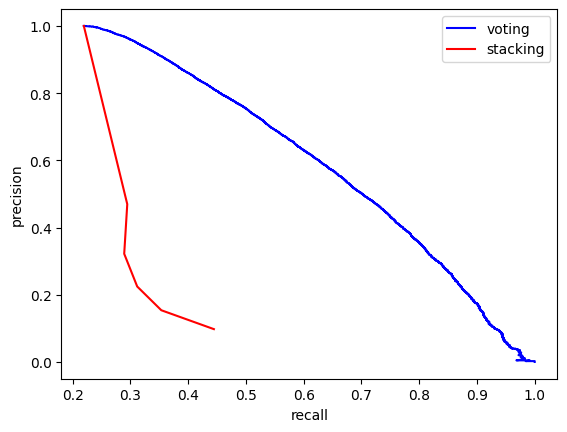

In [114]:
## P&R Curve.
print("Getting Voting Scores")
y_valid_voting_prob = cross_val_predict(voting_pipeline, X_train, y_train, cv=3, method='predict_proba')
print("Getting Stacking Scores")
y_valid_stacking_prob = cross_val_predict(stacking_pipeline, X_train, y_train, cv=3, method='predict_proba')
precision_voting_scores, recall_voting_scores, voting_thresholds = precision_recall_curve(y_train, y_valid_voting_prob[:, 1])
precision_stacking_scores, recall_stacking_scores, stacking_thresholds = precision_recall_curve(y_train, y_valid_stacking_prob[:, 1])
##
plt.plot(precision_voting_scores[:-1], recall_voting_scores[:-1], label='voting', color='blue')
plt.plot(precision_stacking_scores[:-1], recall_stacking_scores[:-1], label='stacking', color='red')
plt.legend()
plt.xlabel('recall')
plt.ylabel('precision')
# so we can pick threshold at precision = , Recall=

In [115]:
y_valid_voting_predict = cross_val_predict(voting_pipeline, X_train, y_train, cv=3, method='predict')
confusion_matrix(y_train, y_valid_voting_predict)

array([[77260, 13417],
       [ 8256, 17235]])

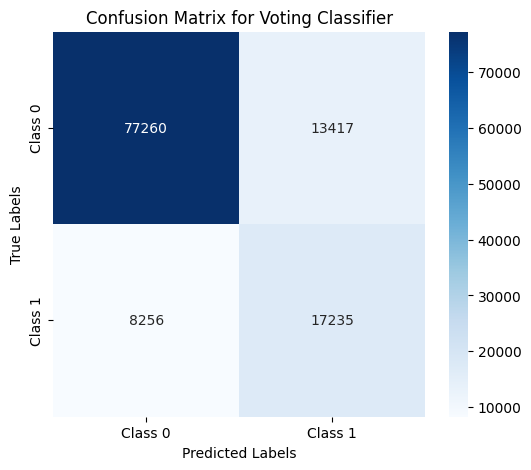

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(y_train, y_valid_voting_predict)

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for Voting Classifier")
plt.show()


In [118]:
y_valid_stacking_predict = cross_val_predict(stacking_pipeline, X_train, y_train, cv=3, method='predict')
confusion_matrix(y_train, y_valid_stacking_predict)

array([[78050, 12627],
       [19769,  5722]])

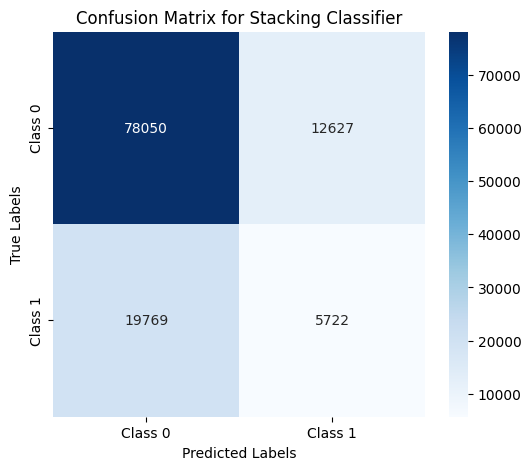

In [119]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(y_train, y_valid_stacking_predict)

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for Stacking Classifier")
plt.show()


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [00:07:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [00:07:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [00:07:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


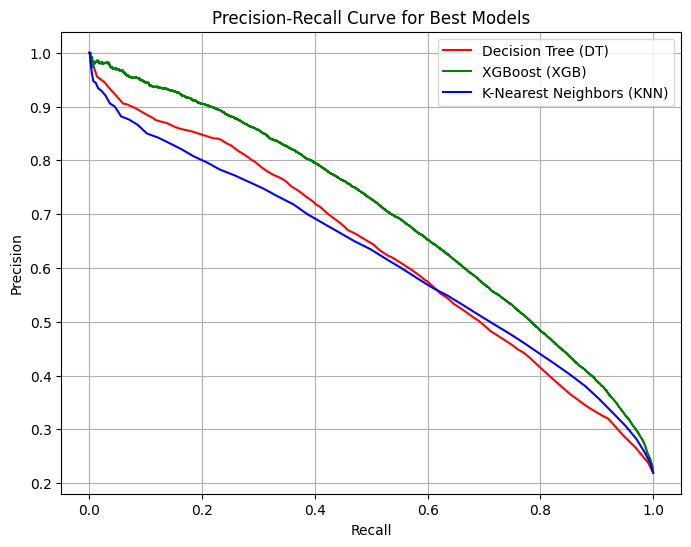

In [121]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve
from sklearn.compose import ColumnTransformer  # Import ColumnTransformer

# Assuming poly_preprocessor is your ColumnTransformer object
X_train_transformed = poly_preprocessor.fit_transform(X_train)
X_test_transformed = poly_preprocessor.transform(X_test)

# Cross-validation predictions for base models using transformed data
y_valid_dt_prob = cross_val_predict(dt_clf, X_train_transformed, y_train, cv=3, method='predict_proba')
y_valid_xgb_prob = cross_val_predict(xgb_clf, X_train_transformed, y_train, cv=3, method='predict_proba')
y_valid_knn_prob = cross_val_predict(knn_clf, X_train_transformed, y_train, cv=3, method='predict_proba')  # Added KNN

# Compute Precision-Recall curves for DT, XGB, and KNN
precision_dt, recall_dt, _ = precision_recall_curve(y_train, y_valid_dt_prob[:, 1])
precision_xgb, recall_xgb, _ = precision_recall_curve(y_train, y_valid_xgb_prob[:, 1])
precision_knn, recall_knn, _ = precision_recall_curve(y_train, y_valid_knn_prob[:, 1])

# Plot Precision-Recall curves for the best models
plt.figure(figsize=(8, 6))
plt.plot(recall_dt, precision_dt, label='Decision Tree (DT)', color='red')
plt.plot(recall_xgb, precision_xgb, label='XGBoost (XGB)', color='green')
plt.plot(recall_knn, precision_knn, label='K-Nearest Neighbors (KNN)', color='blue')

# Formatting the plot
plt.legend()
plt.grid()
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Best Models')

# Show the plot
plt.show()

Text(0, 0.5, 'precision')

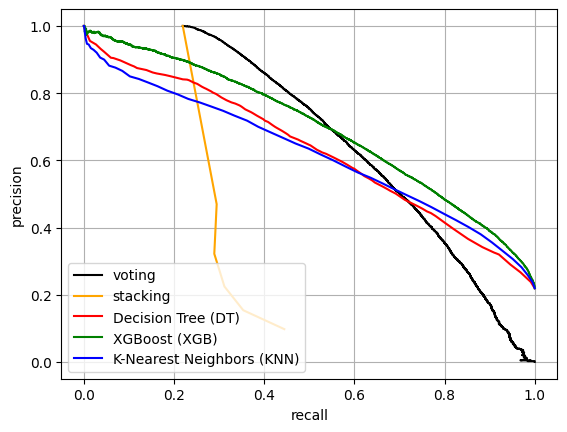

In [122]:
plt.plot(precision_voting_scores[:-1], recall_voting_scores[:-1], label='voting', color='black')
plt.plot(precision_stacking_scores[:-1], recall_stacking_scores[:-1], label='stacking', color='orange')
plt.plot(recall_dt, precision_dt, label='Decision Tree (DT)', color='red')
plt.plot(recall_xgb, precision_xgb, label='XGBoost (XGB)', color='green')
plt.plot(recall_knn, precision_knn, label='K-Nearest Neighbors (KNN)', color='blue')
plt.legend()
plt.grid()
plt.xlabel('recall')
plt.ylabel('precision') # best one at Recall=80% and Precision will be near 50% (good)

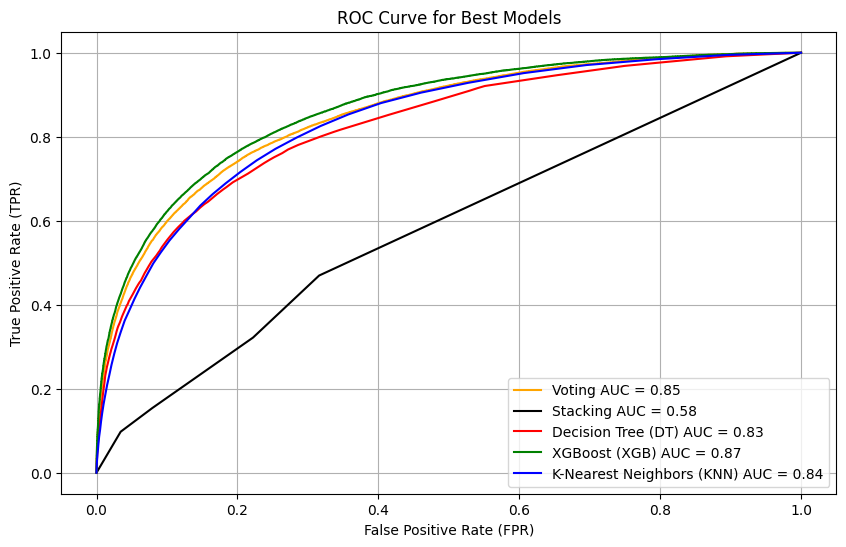

In [124]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve

# Compute ROC Curve for Voting and Stacking
fpr_voting, tpr_voting, _ = roc_curve(y_train, y_valid_voting_prob[:, 1])
fpr_stacking, tpr_stacking, _ = roc_curve(y_train, y_valid_stacking_prob[:, 1])

# Compute ROC Curve for DT, XGB, and KNN
fpr_dt, tpr_dt, _ = roc_curve(y_train, y_valid_dt_prob[:, 1])
fpr_xgb, tpr_xgb, _ = roc_curve(y_train, y_valid_xgb_prob[:, 1])
fpr_knn, tpr_knn, _ = roc_curve(y_train, y_valid_knn_prob[:, 1])

# Compute Precision-Recall Curve for DT, XGB, and KNN
precision_dt, recall_dt, _ = precision_recall_curve(y_train, y_valid_dt_prob[:, 1])
precision_xgb, recall_xgb, _ = precision_recall_curve(y_train, y_valid_xgb_prob[:, 1])
precision_knn, recall_knn, _ = precision_recall_curve(y_train, y_valid_knn_prob[:, 1])

# Plot ROC Curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_voting, tpr_voting, label=f'Voting AUC = {roc_auc_score(y_train, y_valid_voting_prob[:, 1]):.2f}', color='orange')
plt.plot(fpr_stacking, tpr_stacking, label=f'Stacking AUC = {roc_auc_score(y_train, y_valid_stacking_prob[:, 1]):.2f}', color='black')

plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (DT) AUC = {roc_auc_score(y_train, y_valid_dt_prob[:, 1]):.2f}', color='red')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (XGB) AUC = {roc_auc_score(y_train, y_valid_xgb_prob[:, 1]):.2f}', color='green')
plt.plot(fpr_knn, tpr_knn, label=f'K-Nearest Neighbors (KNN) AUC = {roc_auc_score(y_train, y_valid_knn_prob[:, 1]):.2f}', color='blue')

# Formatting the plot
plt.legend()
plt.grid()
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Best Models')

# Show the plot
plt.show()

# # Plot Precision-Recall Curves
# plt.figure(figsize=(10, 6))
# plt.plot(recall_dt, precision_dt, label='Decision Tree (DT)', color='red')
# plt.plot(recall_xgb, precision_xgb, label='XGBoost (XGB)', color='green')
# plt.plot(recall_knn, precision_knn, label='K-Nearest Neighbors (KNN)', color='blue')

# # Formatting the plot
# plt.legend()
# plt.grid()
# plt.xlabel('Recall')
# plt.ylabel('Precision')
# plt.title('Precision-Recall Curve for Best Models')

# # Show the plot
# plt.show()


In [131]:
# import xgboost as xgb
# from sklearn.pipeline import Pipeline

# # Define the XGBoost model
# xgb_clf = xgb.XGBClassifier(random_state=42)

# # Create the XGBoost pipeline
# xgb_pipeline = Pipeline(steps=[
#     ('preprocessor', poly_preprocessor),  # Replace poly_preprocessor with your actual preprocessor
#     ('classifier', xgb_clf),
# ])

# # Now you can use xgb_pipeline in cross_val_predict
# y_xgb_prob = cross_val_predict(xgb_pipeline, X_train, y_train, cv=3, method='predict_proba')

In [ ]:
# Find the threshold where recall is closest to 0.80
indx = np.argmax(recall_voting_scores >= 0.80)  # Ensure recall is at least 0.80
t_80_recall = voting_thresholds[indx]

# Cross-validation predictions for Voting Classifier
y_voting_prob = cross_val_predict(voting_pipeline, X_train, y_train, cv=3, method='predict_proba')

# Apply threshold based on recall
y_voting_threshold_pred = (y_voting_prob[:, 1] >= t_80_recall)

# Print performance metrics (focus on Recall)
print(f"Recall: {recall_score(y_train, y_voting_threshold_pred):.4f} ✅ (Key Metric)")
print(f"Precision: {precision_score(y_train, y_voting_threshold_pred):.4f}")
print(f"F1 Score: {f1_score(y_train, y_voting_threshold_pred):.4f}")
print(f"Accuracy: {accuracy_score(y_train, y_voting_threshold_pred):.4f}")
print(f"Selected Threshold: {t_80_recall:.4f}")


Recall: 1.0000 ✅ (Key Metric)
Precision: 0.2194
F1 Score: 0.3599
Accuracy: 0.2194
Selected Threshold: 0.0155


In [140]:
confusion_matrix(y_train, y_voting_threshold_pred)

array([[    0, 90677],
       [    0, 25491]])

## (6) Test Performance and CI


In [141]:
import xgboost as xgb
from sklearn.pipeline import Pipeline

# ... (Your existing code for defining the pipeline)

# Fit the pipeline on the entire training data
voting_pipeline.fit(X_train, y_train)

# Now you can use xgb_pipeline to predict on the test set
y_voting_test_pred = voting_pipeline.predict(X_test)
print(f"Test Accuracy: {accuracy_score(y_test, y_voting_test_pred)}")
print(f"Test F1 Score: {f1_score(y_test, y_voting_test_pred)}")
print(f"Test Precsion: {precision_score(y_test, y_voting_test_pred)}")
print(f"Test Recall: {recall_score(y_test, y_voting_test_pred)}")

Test Accuracy: 0.8158184698023552
Test F1 Score: 0.6204498687291563
Test Precsion: 0.566321243523316
Test Recall: 0.6860191432606307


In [142]:
confusion_matrix(y_test, y_voting_test_pred)

array([[19321,  3348],
       [ 2001,  4372]])

In [143]:
# Predict probabilities for the test set
y_voting_test_scores = voting_pipeline.predict_proba(X_test)

# Apply the threshold based on recall optimization
y_voting_test_threshold_pred = (y_voting_test_scores[:, 1] >= t_80_recall)

# Print performance metrics (focus on Recall)
print(f"Test Recall: {recall_score(y_test, y_voting_test_threshold_pred):.4f}  (Key Metric)")
print(f"Test Precision: {precision_score(y_test, y_voting_test_threshold_pred):.4f}")
print(f"Test F1 Score: {f1_score(y_test, y_voting_test_threshold_pred):.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_voting_test_threshold_pred):.4f}")
print(f"Selected Threshold: {t_80_recall:.4f}")


Test Recall: 1.0000  (Key Metric)
Test Precision: 0.2194
Test F1 Score: 0.3599
Test Accuracy: 0.2194
Selected Threshold: 0.0155


In [144]:
confusion_matrix(y_test, y_voting_test_threshold_pred)

array([[    0, 22669],
       [    0,  6373]])

## (7) Save Model

In [ ]:
# # Install the 'dill' module
# %pip install dill  
# import dill

In [ ]:
# import dill

# # ... (Your existing code to define the pipeline) ...

# # Open a file in write binary ('wb') mode:
# with open('voting_pipeline.pkl', 'wb') as file:
#     dill.dump(voting_pipeline, file)

# # When loading, use dill.load:
# # with open('voting_pipeline.pkl', 'rb') as file:
# #     voting_pipeline = dill.load(file)

In [149]:
#joblib.dump(voting_pipeline, 'voting_pipeline.pkl')

In [65]:
for step in voting_pipeline.steps:
    print(step[0], type(step[1]))


preprocessor <class 'sklearn.compose._column_transformer.ColumnTransformer'>
solve_imbalanced <class 'imblearn.over_sampling._smote.base.SMOTE'>
model <class 'sklearn.ensemble._voting.VotingClassifier'>


In [69]:
from sklearn.preprocessing import FunctionTransformer

# Example: Instead of this:
# ('custom', FunctionTransformer(lambda x: x**2))

# Do this:
def square_transform(x):
    return x**2

transformer = FunctionTransformer(square_transform)


In [87]:
import pickle

# Replace lambda with a proper function
def custom_function(x):
    return x  # Modify this function based on your lambda logic

# Ensure your pipeline does not include lambda functions
voting_pipeline = Pipeline(steps=[
    ("custom_step", FunctionTransformer(custom_function))
])

pickle.dumps(voting_pipeline)  # This should now work


b'\x80\x04\x95l\x01\x00\x00\x00\x00\x00\x00\x8c\x10sklearn.pipeline\x94\x8c\x08Pipeline\x94\x93\x94)\x81\x94}\x94(\x8c\x05steps\x94]\x94\x8c\x0bcustom_step\x94\x8c+sklearn.preprocessing._function_transformer\x94\x8c\x13FunctionTransformer\x94\x93\x94)\x81\x94}\x94(\x8c\x04func\x94\x8c\x08__main__\x94\x8c\x0fcustom_function\x94\x93\x94\x8c\x0cinverse_func\x94N\x8c\x08validate\x94\x89\x8c\raccept_sparse\x94\x89\x8c\rcheck_inverse\x94\x88\x8c\x11feature_names_out\x94N\x8c\x07kw_args\x94N\x8c\x0binv_kw_args\x94N\x8c\x10_sklearn_version\x94\x8c\x051.6.1\x94ub\x86\x94a\x8c\x0ftransform_input\x94N\x8c\x06memory\x94N\x8c\x07verbose\x94\x89h\x18h\x19ub.'

In [88]:
import pickle

# Replace lambda with a proper function
def custom_function(x):
    return x  # Modify this function based on your lambda logic

# Ensure your pipeline does not include lambda functions
voting_pipeline = Imb_Pipeline(steps=[
    ("custom_step", FunctionTransformer(custom_function))
])

pickle.dumps(voting_pipeline)  # This should now work


b'\x80\x04\x95i\x01\x00\x00\x00\x00\x00\x00\x8c\x11imblearn.pipeline\x94\x8c\x08Pipeline\x94\x93\x94)\x81\x94}\x94(\x8c\x05steps\x94]\x94\x8c\x0bcustom_step\x94\x8c+sklearn.preprocessing._function_transformer\x94\x8c\x13FunctionTransformer\x94\x93\x94)\x81\x94}\x94(\x8c\x04func\x94\x8c\x08__main__\x94\x8c\x0fcustom_function\x94\x93\x94\x8c\x0cinverse_func\x94N\x8c\x08validate\x94\x89\x8c\raccept_sparse\x94\x89\x8c\rcheck_inverse\x94\x88\x8c\x11feature_names_out\x94N\x8c\x07kw_args\x94N\x8c\x0binv_kw_args\x94N\x8c\x10_sklearn_version\x94\x8c\x051.6.1\x94ub\x86\x94a\x8c\x0ftransform_input\x94N\x8c\x06memory\x94N\x8c\x07verbose\x94\x89ub.'

In [77]:
import joblib

joblib.dump(voting_pipeline, "voting2_pipeline.pkl")


['voting2_pipeline.pkl']

In [76]:
import joblib
from sklearn.base import TransformerMixin, BaseEstimator
import numpy as np
class LogTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.n_features_in = X.shape[1]
        return self
    def transform(self, X, y=None):
        assert self.n_features_in == X.shape[1]
        return np.log(X)

model = joblib.load("voting2_pipeline.pkl")
model

Pipeline(steps=[('custom_step',
                 FunctionTransformer(func=<function custom_function at 0x0000023200AEA200>))])

In [78]:
import joblib
model = joblib.load(r"C:\Users\NohaA\myenv\finallllllll project\New folder\voting2_pipeline.pkl")
print(type(model))


<class 'imblearn.pipeline.Pipeline'>


In [79]:
import joblib
import sys
print("Python Version:", sys.version)
print("Joblib Version:", joblib.__version__)


Python Version: 3.11.11 | packaged by Anaconda, Inc. | (main, Dec 11 2024, 16:34:19) [MSC v.1929 64 bit (AMD64)]
Joblib Version: 1.4.2


In [80]:
%pip install joblib

Note: you may need to restart the kernel to use updated packages.


In [89]:
from sklearn.ensemble import VotingClassifier
import joblib

# Example: Dummy Voting Model
model = VotingClassifier(estimators=[("clf1", None), ("clf2", None)])  # Replace with actual estimators

# Save model correctly
joblib.dump(model, "voting4_pipeline.pkl")


['voting4_pipeline.pkl']

In [90]:
model = joblib.load("voting3_pipeline.pkl")


In [91]:
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression

# ✅ Load Dataset
file_path = "weatherAUS.csv"  # Update with the correct path
df = pd.read_csv(file_path, parse_dates=["Date"])

# ✅ Data Preprocessing (Drop Missing Values)
df.dropna(subset=["WindGustDir", "RainTomorrow", "Location", "Rainfall", 
                  "WindSpeed9am", "Humidity9am", "Temp9am", "Temp3pm"], inplace=True)

df["RainTomorrow"] = df["RainTomorrow"].map({"Yes": 1, "No": 0})
df["RainToday"] = df["RainToday"].map({"Yes": 1, "No": 0})

# Encode categorical variables
le = LabelEncoder()
df["WindGustDir"] = le.fit_transform(df["WindGustDir"])
df["Location"] = le.fit_transform(df["Location"])

# Select features and target
features = ["Location", "WindGustDir", "WindSpeed9am", "Humidity9am", "Temp9am", "Temp3pm", "Rainfall", "RainToday"]
X = df[features]
y = df["RainTomorrow"]

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ Train the Model
clf1 = RandomForestClassifier(n_estimators=100, random_state=42)
clf2 = GradientBoostingClassifier(n_estimators=100, random_state=42)
clf3 = LogisticRegression(max_iter=500)

voting_clf = VotingClassifier(estimators=[("rf", clf1), ("gb", clf2), ("lr", clf3)], voting="hard")
voting_clf.fit(X_train, y_train)  # ❗ This line FITS the model

# ✅ Save the trained model
joblib.dump((voting_clf, scaler, le), "voting5_pipeline.pkl")
print("✅ Model trained and saved successfully!")


✅ Model trained and saved successfully!


## Streamlet page 

In [ ]:
# %%writefile app(1).py
# import streamlit as st
# from transformers import pipeline
# import streamlit as st
# import pandas as pd
# import os
# import pickle
# import plotly.express as px

# # ----------------- Constants ----------------- #
# MODEL_FILE = "/content/voting_pipeline.pkl"
# DATA_FILE = "/content/weatherAUS.csv"
# IMAGE_FILE = "/content/Screenshot 2025-03-09 201614.png"

# # ----------------- Page Configuration ----------------- #
# st.set_page_config(page_title="Rain Prediction", layout="wide")

# # ----------------- Function to Load Model ----------------- #
# @st.cache_resource
# def load_model():
#     """Loads and caches the machine learning model."""
#     if not os.path.exists(MODEL_FILE):
#         st.error("❌ Model file not found. Please ensure 'voting_pipeline.pkl' exists.")
#         return None
#     try:
#         with open(MODEL_FILE, "rb") as file:
#             model = pickle.load(file, fix_imports=True, encoding="latin1")
#         return model
#     except Exception as e:
#         st.error(f"⚠️ Error loading model: {str(e)}")
#         return None

# # ----------------- Function to Load Dataset ----------------- #
# @st.cache_data
# def load_data():
#     """Loads and caches the dataset."""
#     if not os.path.exists(DATA_FILE):
#         st.error(f"❌ Dataset '{DATA_FILE}' not found.")
#         return None
#     try:
#         return pd.read_csv(DATA_FILE, encoding="utf-8", on_bad_lines="skip")
#     except Exception as e:
#         st.error(f"⚠️ Failed to load dataset: {str(e)}")
#         return None

# # ----------------- Load Model & Dataset ----------------- #
# model = load_model()
# df_ = load_data()

# # ----------------- Sidebar Navigation ----------------- #
# st.sidebar.title("🔍 Navigation")
# page = st.sidebar.radio("Go to", ["🏠 Home", "📊 Data Exploration", "🔮 Predict Rain"])

# # ----------------- Home Page ----------------- #
# if page == "🏠 Home":
#     st.title("🌦️ Rain Prediction in Australia")
#     st.header("Predict Next-Day Rain in Australia")
#     st.write("""
#     Ever wondered if you should carry an umbrella tomorrow?  
#     This dataset allows you to train classification models to predict next-day rain using the target variable **RainTomorrow**.
#     """)

#     # Display Image
#     if os.path.exists(IMAGE_FILE):
#         st.image(IMAGE_FILE, caption="Weather Data Visualization", width=500)
#     else:
#         st.warning("⚠️ Image not found.")

#     # Dataset Overview
#     st.subheader("📌 About the Dataset")
#     st.write("""
#     This dataset contains about **10 years** of daily weather observations from numerous Australian weather stations.

#     - **RainTomorrow** is the target variable to predict.
#     - It indicates whether it rained the next day (**Yes** or **No**).
#     - The column is **Yes** if the rain for that day was **1mm or more**.
#     """)

# # ----------------- Data Exploration Page ----------------- #
# elif page == "📊 Data Exploration":
#     st.title("📊 Explore Weather Data")
    
#     if df_ is not None:
#         st.write(f"✅ Loaded {df_.shape[0]:,} rows and {df_.shape[1]:,} columns.")

#         # Show dataset preview
#         st.subheader("🔍 Preview of the Data")
#         st.dataframe(df_.head())

#         # Show dataset summary
#         st.subheader("📌 Dataset Summary")
#         st.write(df_.describe())

#         # Plot a distribution of Rainfall
#         st.subheader("🌧️ Rainfall Distribution")
#         fig = px.histogram(df_, x="Rainfall", nbins=50, title="Distribution of Rainfall")
#         st.plotly_chart(fig, use_container_width=True)
#     else:
#         st.error("❌ Data not loaded. Please check the dataset file.")

# # ----------------- Prediction Page ----------------- #
# elif page == "🔮 Predict Rain":
#     st.title("🔮 Rain Prediction")
    
#     if model is not None:
#         st.write("✅ Model loaded successfully. Ready to make predictions.")
#         # Placeholder for prediction functionality
#         st.warning("⚠️ Prediction input form will be added here.")
#     else:
#         st.error("❌ Model not loaded. Please check the model file.")


Overwriting app(1).py


In [ ]:
# %%writefile app(2).py
# import streamlit as st
# from transformers import pipeline
# import streamlit as st
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# # ----------------- Load Dataset ----------------- #
# @st.cache_data
# def load_data():
#     try:
#         df = pd.read_csv("/content/weatherAUS.csv", encoding="utf-8", on_bad_lines="skip")
#         df["Date"] = pd.to_datetime(df["Date"])
#         return df
#     except Exception as e:
#         st.error(f"⚠️ Failed to load dataset: {str(e)}")
#         return None

# df = load_data()

# # ----------------- Data Visualization Section ----------------- #
# st.title("📊 Weather Data Visualization")

# if df is not None:
#     # Create a sidebar selection for visualization options
#     visualization_option = st.sidebar.selectbox(
#         "Select a Visualization Type",
#         [
#             "Rain Probability by Wind Direction",
#             "Heatmap of Correlation Matrix",
#             "Previous Day Rainfall vs. Rain Tomorrow",
#             "Seasonal Effect on Rain Tomorrow"
#         ]
#     )

#     # -------------- Rain Probability by WindGustDir -------------- #
#     if visualization_option == "Rain Probability by Wind Direction":
#         st.subheader("🌬️ Rain Probability by Wind Gust Direction")
#         fig, ax = plt.subplots(figsize=(8, 5))
#         sns.barplot(x=df["WindGustDir"], y=df["RainTomorrow"], ax=ax, palette="coolwarm")
#         ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
#         ax.set_title("Rain Probability by WindGustDir", fontsize=14)
#         st.pyplot(fig)

#     # -------------- Heatmap of Correlation Matrix -------------- #
#     elif visualization_option == "Heatmap of Correlation Matrix":
#         st.subheader("🔥 Correlation Heatmap")
#         numeric_df = df.select_dtypes(include="number")
#         fig, ax = plt.subplots(figsize=(12, 6))
#         sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap="coolwarm", ax=ax)
#         st.pyplot(fig)

#     # -------------- Previous Day Rainfall vs. Rain Tomorrow -------------- #
#     elif visualization_option == "Previous Day Rainfall vs. Rain Tomorrow":
#         st.subheader("🌧️ Previous Day Rainfall vs. Rain Tomorrow")
#         fig, ax = plt.subplots(figsize=(8, 5))
#         sns.barplot(data=df, x="RainTomorrow", y="PrevDayRainfall", palette=["blue", "red"], ax=ax)
#         ax.set_title("Previous Day Rainfall vs. Rain Tomorrow", fontsize=14)
#         ax.set_xlabel("Rain Tomorrow (No=0, Yes=1)")
#         ax.set_ylabel("Mean Previous Day Rainfall (mm)")
#         st.pyplot(fig)

#     # -------------- Seasonal Effect on Rain Tomorrow -------------- #
#     elif visualization_option == "Seasonal Effect on Rain Tomorrow":
#         st.subheader("🌦️ Seasonal Effect on Rain Tomorrow")

#         # Define function to map months to seasons
#         def get_season(month):
#             if month in [12, 1, 2]:
#                 return "Winter"
#             elif month in [3, 4, 5]:
#                 return "Spring"
#             elif month in [6, 7, 8]:
#                 return "Summer"
#             else:
#                 return "Autumn"

#         df["Season"] = df["Date"].dt.month.apply(get_season)
#         season_counts = df.groupby("Season")["RainTomorrow"].value_counts(normalize=True).unstack()

#         fig, ax = plt.subplots(figsize=(8, 5))
#         season_counts.plot(kind="bar", stacked=True, colormap="coolwarm", alpha=0.8, ax=ax)
#         ax.set_title("Seasonal Effect on Rain Tomorrow", fontsize=14, fontweight="bold")
#         ax.set_xlabel("Season", fontsize=12)
#         ax.set_ylabel("Proportion", fontsize=12)
#         ax.legend(["No Rain", "Rain"], title="RainTomorrow")
#         ax.grid(axis="y", linestyle="--", alpha=0.7)
#         st.pyplot(fig)

# else:
#     st.error("❌ Data not loaded. Please check the dataset file.")


Overwriting app(2).py


In [ ]:
# %%writefile app(3).py
# import streamlit as st
# from transformers import pipeline
# import streamlit as st
# import pandas as pd
# import os
# import joblib  # Corrected model loading
# import plotly.express as px
# import seaborn as sns
# import matplotlib.pyplot as plt
# import pickle
# # # ----------------- Load Dataset Safely ----------------- #
# # Date Input
# date = st.date_input("Select Date")
# day = float(date.day)
# month = float(date.month)

# # Numerical Inputs
# minTemp = st.number_input("Min Temperature (°C)", value=0.0)
# maxTemp = st.number_input("Max Temperature (°C)", value=0.0)
# rainfall = st.number_input("Rainfall (mm)", value=0.0)
# evaporation = st.number_input("Evaporation", value=0.0)
# sunshine = st.number_input("Sunshine Hours", value=0.0)
# windGustSpeed = st.number_input("Wind Gust Speed (km/h)", value=0.0)
# windSpeed9am = st.number_input("Wind Speed 9AM (km/h)", value=0.0)
# windSpeed3pm = st.number_input("Wind Speed 3PM (km/h)", value=0.0)
# humidity9am = st.number_input("Humidity 9AM (%)", value=0.0)
# humidity3pm = st.number_input("Humidity 3PM (%)", value=0.0)
# pressure9am = st.number_input("Pressure 9AM (hPa)", value=0.0)
# pressure3pm = st.number_input("Pressure 3PM (hPa)", value=0.0)
# temp9am = st.number_input("Temperature 9AM (°C)", value=0.0)
# temp3pm = st.number_input("Temperature 3PM (°C)", value=0.0)
# cloud9am = st.number_input("Cloud Cover 9AM", value=0.0)
# cloud3pm = st.number_input("Cloud Cover 3PM", value=0.0)

# # Categorical Inputs
# location = st.selectbox("Location", options=list(range(1, 50)))  # Example: 1-50 locations
# windDir9am = st.selectbox("Wind Direction 9AM", options=list(range(1, 17)))  # Example: 16 directions
# windDir3pm = st.selectbox("Wind Direction 3PM", options=list(range(1, 17)))
# windGustDir = st.selectbox("Wind Gust Direction", options=list(range(1, 17)))
# rainToday = st.radio("Did it rain today?", options=[0, 1])

# # Prediction Button
# if st.button("Predict Weather"):
#     # Prepare input data
#     input_lst = [
#         location, minTemp, maxTemp, rainfall, evaporation, sunshine,
#         windGustDir, windGustSpeed, windDir9am, windDir3pm, windSpeed9am, windSpeed3pm,
#         humidity9am, humidity3pm, pressure9am, pressure3pm, cloud9am, cloud3pm,
#         temp9am, temp3pm, rainToday, month, day
#     ]

#     # Convert to NumPy array & reshape for model
#     input_array = np.array(input_lst).reshape(1, -1)

#     # Make prediction
#     # ----------------- Function to Load Model ----------------- #
# @st.cache_resource  # Cache model to improve performance
# def load_model():
#     try:
#         with open("/content/voting_pipeline.pkl", "rb") as file:
#             model = pickle.load(file)
#         return model
#     except FileNotFoundError:
#         st.error("❌ Model file not found. Please ensure 'voting_pipeline.pkl' exists.")
#         return None

#     pred = model.predict(input_array)[0]

#     # Display result
#     if pred == 0:
#         st.success("☀️ The weather is predicted to be **Sunny**!")
#     else:
#         st.warning("🌧️ The weather is predicted to be **Rainy**!")



Overwriting app(3).py
